In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv')

In [3]:
mask=df.duplicated(keep='first')
duplicates=df[mask]

In [4]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 57.4+ MB


In [5]:
missing=df.isnull().sum()
print(missing)


ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [6]:
df['EdLevel'].isnull().sum()

np.int64(4653)

In [7]:
edlevel_most_frequent=df['EdLevel'].mode()[0]

In [8]:
df['EdLevel'].fillna(edlevel_most_frequent, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\222666011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].fillna(edlevel_most_frequent, inplace=True)


In [9]:
df['EdLevel'].isnull().sum()

np.int64(0)

In [10]:
df['ConvertedCompYearly'].isnull().sum()

np.int64(42002)

In [11]:
# Step 1: Most specific group — Country + EdLevel
df['Salary_imputed'] = df.groupby(['Country', 'EdLevel'])['ConvertedCompYearly'].transform('median')

print("NaNs after Country+EdLevel:", df['Salary_imputed'].isna().sum())

# Step 2: Fallback to Country-only median (for rows still NaN)
country_median = df.groupby('Country')['ConvertedCompYearly'].transform('median')
df['Salary_imputed'] = df['Salary_imputed'].fillna(country_median)

print("NaNs after Country fallback:", df['Salary_imputed'].isna().sum())

# Step 3: Final fallback to global median
global_median = df['ConvertedCompYearly'].median()
df['Salary_imputed'] = df['Salary_imputed'].fillna(global_median)

print("Final NaNs:", df['Salary_imputed'].isna().sum())  # should be 0

# Optional: Flag original missing values
df['Salary_missing_flag'] = df['ConvertedCompYearly'].isna().astype(int)



NaNs after Country+EdLevel: 7173
NaNs after Country fallback: 6543
Final NaNs: 0


In [12]:
len(df)

65437

In [13]:
df['Salary_imputed'].isnull().sum()

np.int64(0)

In [14]:
print(df.columns.tolist())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

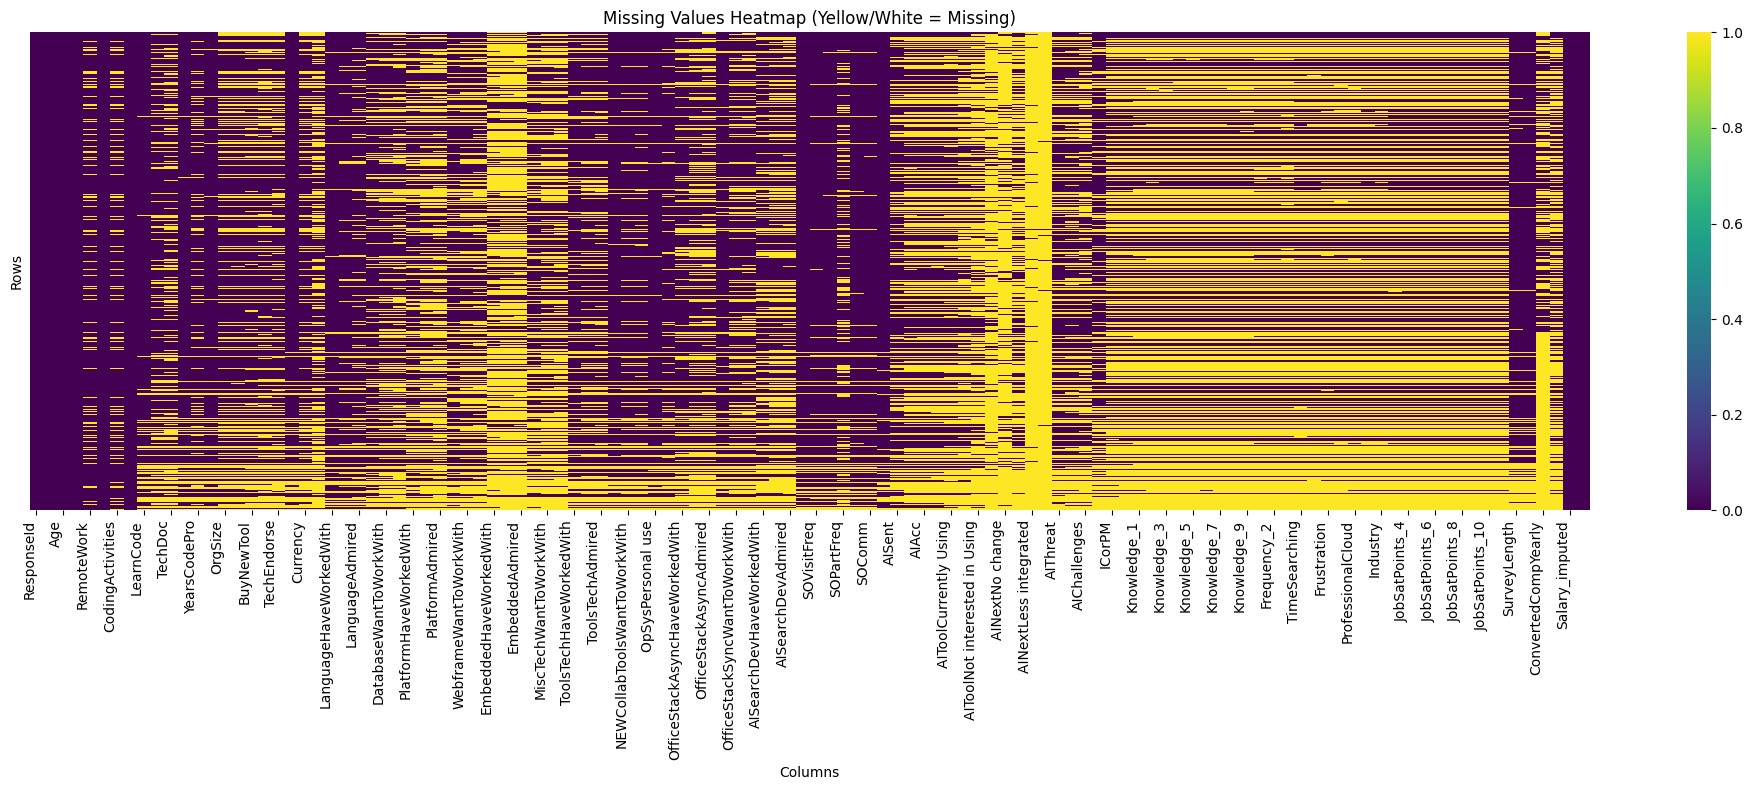

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Wide for 114 columns
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap (Yellow/White = Missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(rotation=90, ha='right')  # Rotate column labels
plt.tight_layout()
plt.show()


In [16]:
df['RemoteWork'].isna().sum()

np.int64(10631)

In [17]:
remotework_most_frequent=df['RemoteWork'].mode()

In [18]:
df['RemoteWork'].fillna(remotework_most_frequent[0], inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\2253371020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(remotework_most_frequent[0], inplace=True)


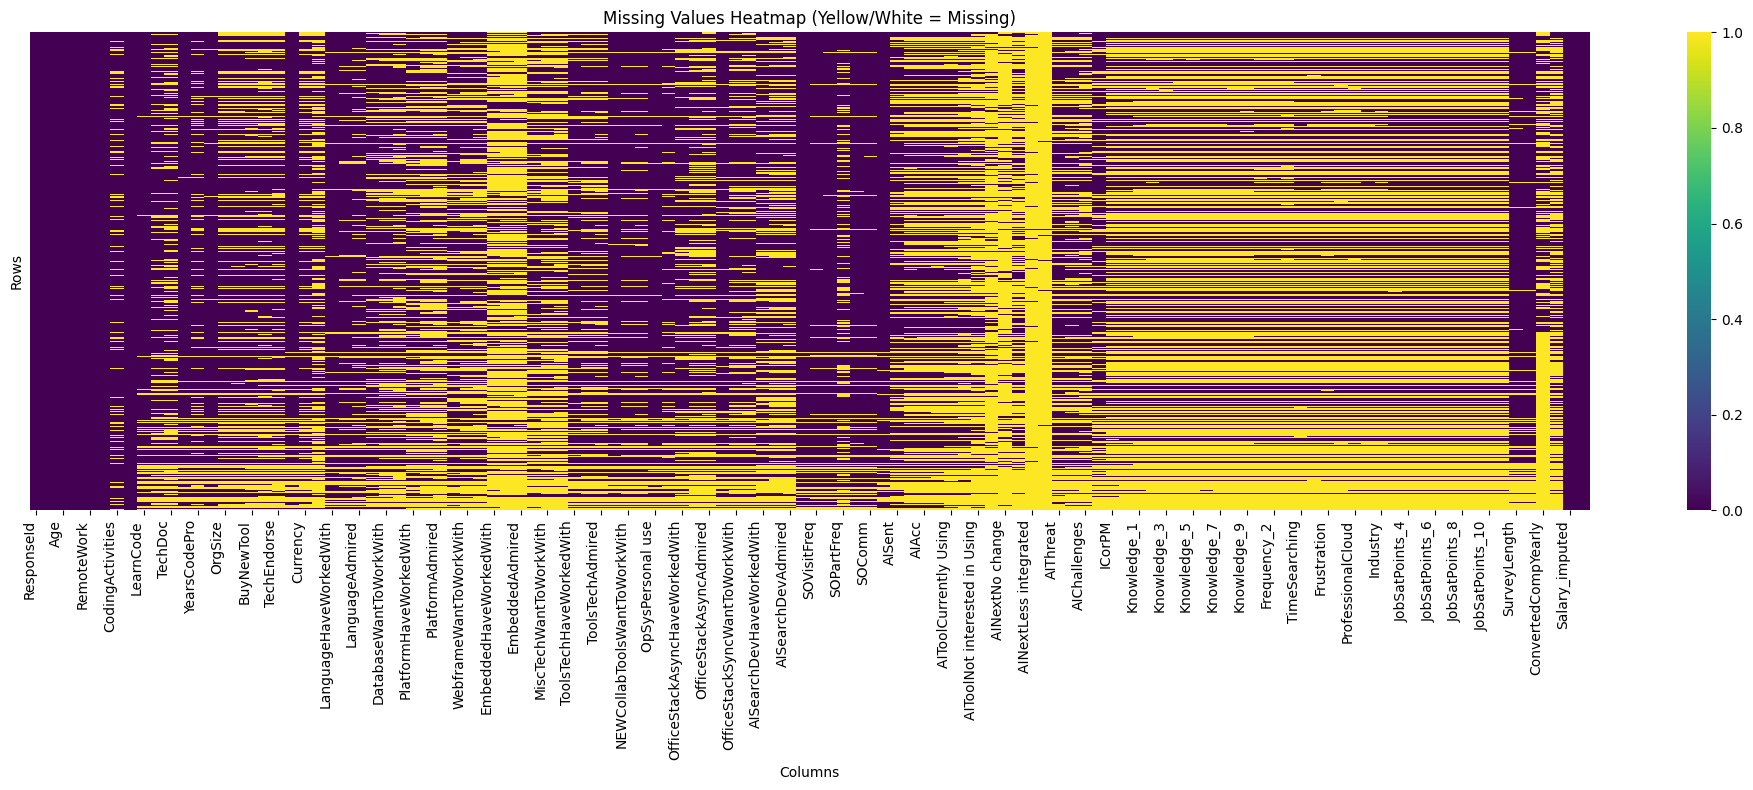

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Wide for 114 columns
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap (Yellow/White = Missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(rotation=90, ha='right')  # Rotate column labels
plt.tight_layout()
plt.show()

In [20]:
print(df['CodingActivities'].isnull().sum())

10971


In [21]:
df['CodingActivities'].ffill(inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1010674121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].ffill(inplace=True)


In [22]:
print(df['ConvertedCompYearly'].isnull().sum())

42002


In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler=MinMaxScaler()
df['Salary_imputed_MinMaxNormalized']=scaler.fit_transform(df[['Salary_imputed']]).flatten()

In [24]:
Zscore=StandardScaler()
df['Salary_imputed_Zscore']=Zscore.fit_transform(df[['Salary_imputed']]).flatten()

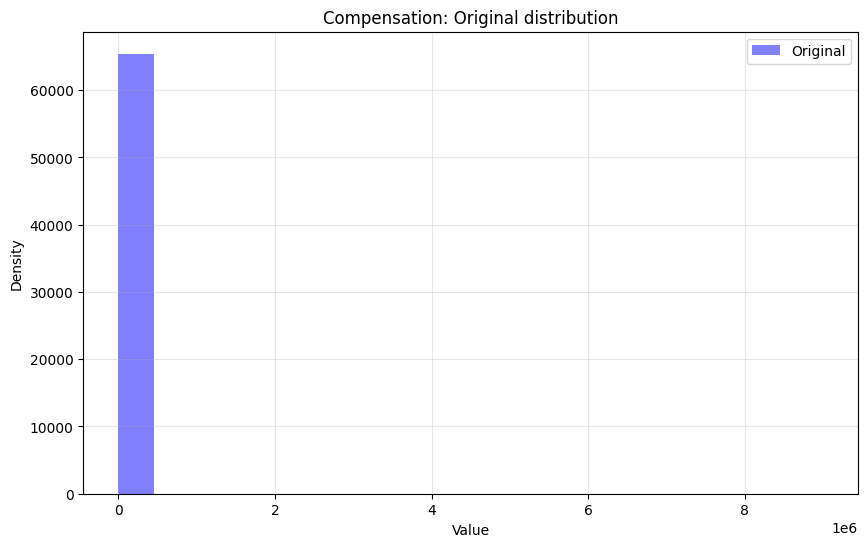

In [25]:

plt.figure(figsize=(10, 6))

plt.hist(df['Salary_imputed'], bins=20, alpha=0.5, label='Original', color='blue')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Compensation: Original distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


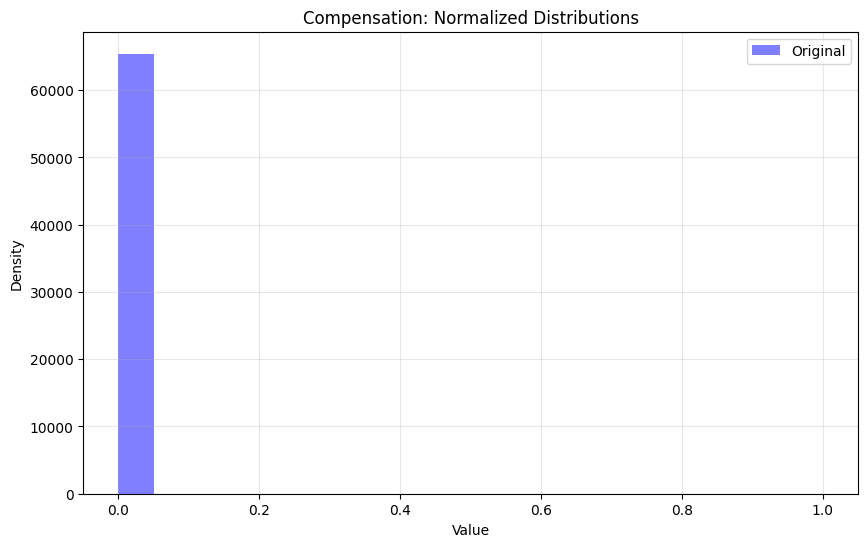

In [26]:
plt.figure(figsize=(10, 6))

# Plot all 3 on same axes
plt.hist(df['Salary_imputed_MinMaxNormalized'], bins=20, alpha=0.5, label='Original', color='blue')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Compensation: Normalized Distributions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

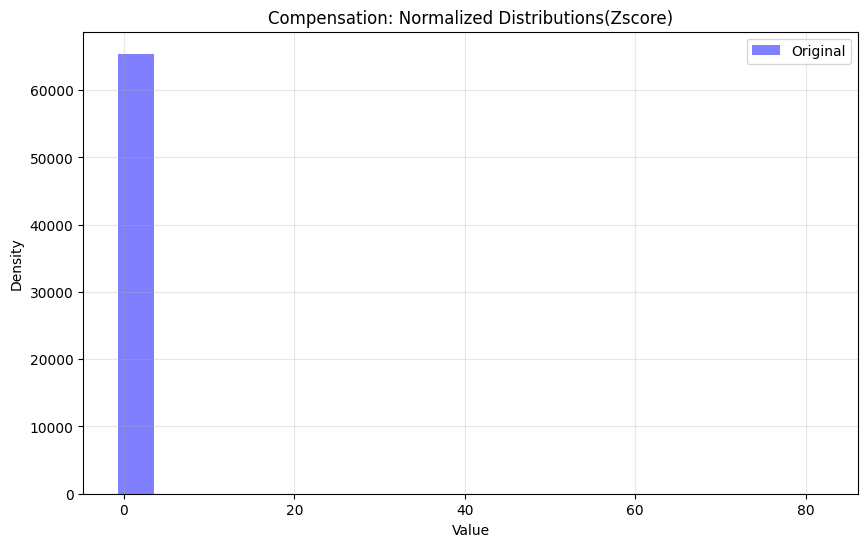

In [27]:
plt.figure(figsize=(10, 6))

# Plot all 3 on same axes
plt.hist(df['Salary_imputed_Zscore'], bins=20, alpha=0.5, label='Original', color='blue')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Compensation: Normalized Distributions(Zscore)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [28]:
country_map={'United Kingdom of Great Britain and Northern Ireland':'UK', 'United States of America': 'USA'}
df['Country']=df['Country'].replace(country_map)


In [29]:
df['Age'] = df['Age'].str.replace(r'\byears old\b', '', regex=True)
df['Age']=df['Age'].str.strip()

In [30]:
df['Country']

0            USA
1             UK
2             UK
3         Canada
4         Norway
          ...   
65432        NaN
65433        NaN
65434        NaN
65435    Germany
65436        NaN
Name: Country, Length: 65437, dtype: object

In [31]:
#Fill NaN with 'Unknown'
df['Country'] = df['Country'].fillna('Unknown')

# 4. Strip whitespace
df['Country'] = df['Country'].str.strip()

In [32]:
ed_level={'Primary/elementary school': 'Lower School', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s'}
df['EdLevel'].replace(ed_level, inplace=True)
df['EdLevel'] = df['EdLevel'].str.replace(r'Secondary school.*', 'Secondary school', regex=True, case=False)
df['EdLevel'] = df['EdLevel'].str.replace(r'Professional degree.*', 'Professional degree', regex=True, case=False)
df['EdLevel'] = df['EdLevel'].str.replace(r'Some college/.*', 'College/university study without degree', regex=True, case=False)
df['EdLevel'] = df['EdLevel'].str.replace(r'Associate degree.*', 'Associate degree', regex=True, case=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3322036289.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EdLevel'].replace(ed_level, inplace=True)


In [33]:
df_encoded = pd.get_dummies(df, columns=['Employment'], prefix='Employment', dtype=int)

In [34]:
df['YearsCodePro']

0        NaN
1         17
2         27
3        NaN
4        NaN
        ... 
65432      3
65433    NaN
65434      5
65435      2
65436    NaN
Name: YearsCodePro, Length: 65437, dtype: object

In [35]:
# Step 1: Convert to numeric (non-numeric → NaN)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Step 2: Now np.select works!
conditions = [
    (df['YearsCodePro'] <= 2),
    (df['YearsCodePro'] <= 5),
    (df['YearsCodePro'] <= 10)
]
choices = ['Junior', 'Mid-level', 'Senior']
df['ExperienceLevel'] = np.select(conditions, choices, default='Expert')


In [36]:
df['YearsCodePro'].isnull().sum()

np.int64(16733)

In [ ]:
col = 'YearsCodePro'  # Your column

df[col] = pd.to_numeric(df[col], errors='coerce')

In [38]:
df[col].fillna(df[col].median(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3800022795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [39]:
# Ensure numeric first
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

bins = [0, 5, 10, 20, np.inf]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

df['ExperienceLevel'] = pd.cut(df['YearsCodePro'], 
                              bins=bins, 
                              labels=labels, 
                              right=False)


In [40]:
df['JobSat'].isnull().sum()

np.int64(36311)

In [41]:
df['JobSat']=pd.to_numeric(df['JobSat'], errors='coerce')

In [42]:
median_jobsat=df.groupby('ExperienceLevel')['JobSat'].median()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3921620608.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat=df.groupby('ExperienceLevel')['JobSat'].median()


In [43]:
df['Median_jobsat']=df['ExperienceLevel'].map(median_jobsat)

In [44]:
df.head()

ResponseId                      MainBranch       Age           Employment  \
0           1  I am a developer by profession  Under 18  Employed, full-time   
1           2  I am a developer by profession     35-44  Employed, full-time   
2           3  I am a developer by profession     45-54  Employed, full-time   
3           4           I am learning to code     18-24   Student, full-time   
4           5  I am a developer by profession     18-24   Student, full-time   

                             RemoteWork   Check  \
0                                Remote  Apples   
1                                Remote  Apples   
2                                Remote  Apples   
3  Hybrid (some remote, some in-person)  Apples   
4  Hybrid (some remote, some in-person)  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3  Hobby;Contribute to open-source projects;Other...   
4  Hobby;Contribute to open-source projects;Other...   

                                   EdLevel  \
0                             Lower School   
1                               Bachelor’s   
2                                 Master’s   
3  College/university study without degree   
4                         Secondary school   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ...  \
0                                                NaN  ...   
1  Technical documentation;Blogs;Books;Written Tu...  ...   
2  Technical documentation;Blogs;Books;Written Tu...  ...   
3  Stack Overflow;How-to videos;Interactive tutorial  ...   
4  Technical documentation;Blogs;Written Tutorial...  ...   

            SurveyLength SurveyEase  ConvertedCompYearly JobSat  \
0                    NaN        NaN                  NaN    NaN   
1                    NaN        NaN                  NaN    NaN   
2  Appropriate in length       Easy                  NaN    NaN   
3               Too long       Easy                  NaN    NaN   
4              Too short       Easy                  NaN    NaN   

  Salary_imputed Salary_missing_flag Salary_imputed_MinMaxNormalized  \
0       150000.0                   1                        0.016667   
1        87579.5                   1                        0.009731   
2        95541.0                   1                        0.010616   
3        74874.0                   1                        0.008319   
4        65514.0                   1                        0.007279   

  Salary_imputed_Zscore ExperienceLevel Median_jobsat  
0              0.742488      5-10 years           7.0  
1              0.169313     10-20 years           7.0  
2              0.242419       >20 years           8.0  
3              0.052645      5-10 years           7.0  
4             -0.033303      5-10 years           7.0  

[5 rows x 120 columns]

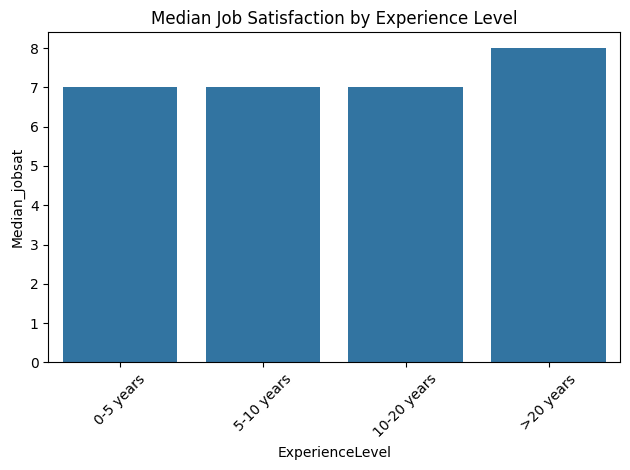

In [45]:
sns.barplot(data=df, x='ExperienceLevel', y='Median_jobsat', errorbar=None)
plt.title('Median Job Satisfaction by Experience Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


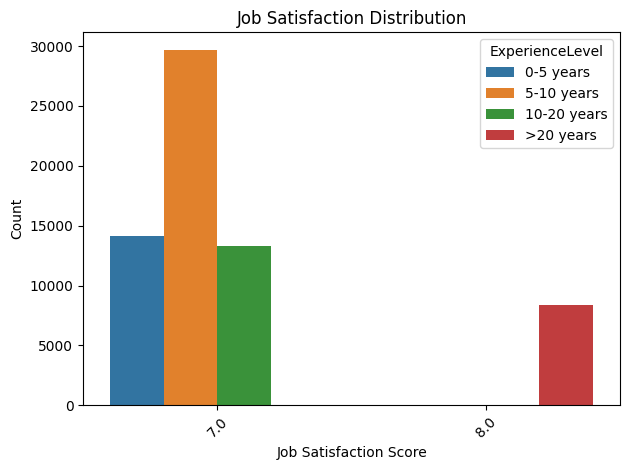

In [46]:
sns.countplot(data=df, x='Median_jobsat', order=df['Median_jobsat'].value_counts().index, hue='ExperienceLevel')
plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


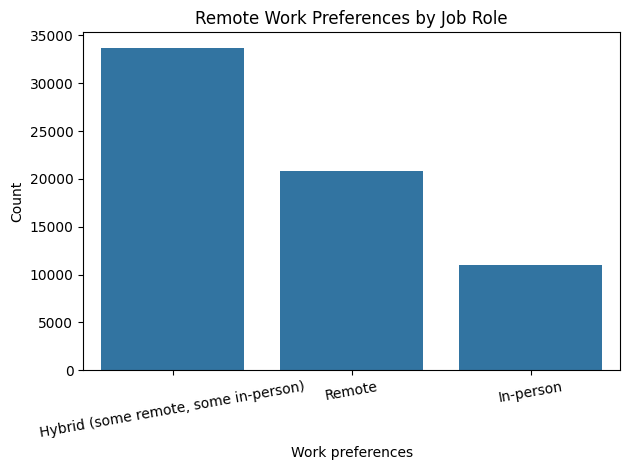

In [47]:
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Remote Work Preferences by Job Role')
plt.xlabel('Work preferences')
plt.xticks(rotation=10)
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [48]:
df['Employment'] = df['Employment'].str.replace(r'\bfull-time\b', 'FT', regex=True)
df['Employment'] = df['Employment'].str.replace(r'\bpart-time\b', 'PT', regex=True)
df['Employment'] = df['Employment'].str.replace(r'\bIndependent contractor\b', 'IC', regex=True)
df['Employment'] = df['Employment'].str.replace(r'\bself-employed\b', 'SE', regex=True)
df['Employment'] = df['Employment'].str.replace(r'\bNot employed\b', 'NE', regex=True)

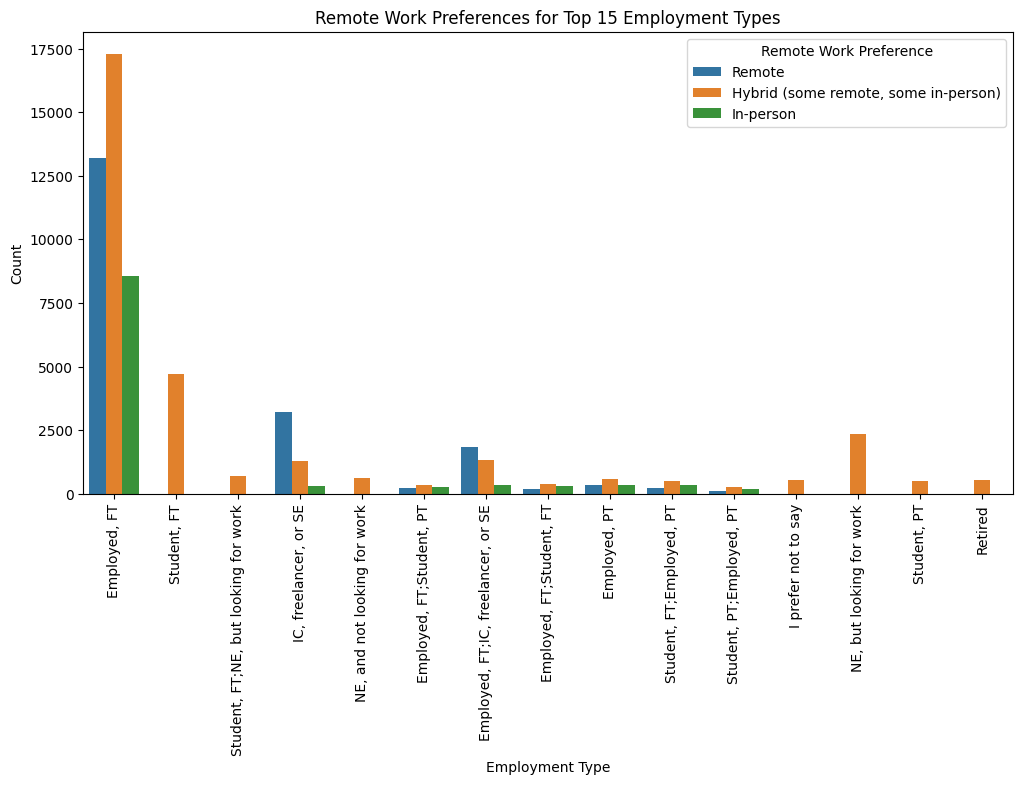

In [49]:
# Get top 10 Employment types by count
top_employment = df['Employment'].value_counts().nlargest(15).index

# Filter DataFrame to only include those top Employment types
df_top_employment = df[df['Employment'].isin(top_employment)]

# Count plot of RemoteWork by Employment (top 10)
plt.figure(figsize=(12,6))
sns.countplot(data=df_top_employment, x='Employment', hue='RemoteWork')
plt.title('Remote Work Preferences for Top 15 Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Remote Work Preference')
plt.show()

In [50]:
df['MainBranch']=df['MainBranch'].str.replace(r'\bI am a developer by profession\b', 'Developer', regex=True)
df['MainBranch']=df['MainBranch'].str.replace(r'\bI am not primarily a developer, but I write code sometimes as part of my work/studies\b', 'Not a Developer, but writes code sometimes', regex=True)
df['MainBranch']=df['MainBranch'].str.replace(r'\bI am learning to code\b', 'Learning to code', regex=True)
df['MainBranch']=df['MainBranch'].str.replace(r'\bI code primarily as a hobby\b', 'Code as hobby', regex=True)
df['MainBranch']=df['MainBranch'].str.replace(r'\bI used to be a developer by profession, but no longer am\b', 'Used to be a developer', regex=True)

In [51]:
top_jobroles=df['MainBranch'].value_counts().nlargest(10)
top_jobroles

MainBranch
Developer                                     50207
Not a Developer, but writes code sometimes     6511
Learning to code                               3875
Code as hobby                                  3334
Used to be a developer                         1510
Name: count, dtype: int64

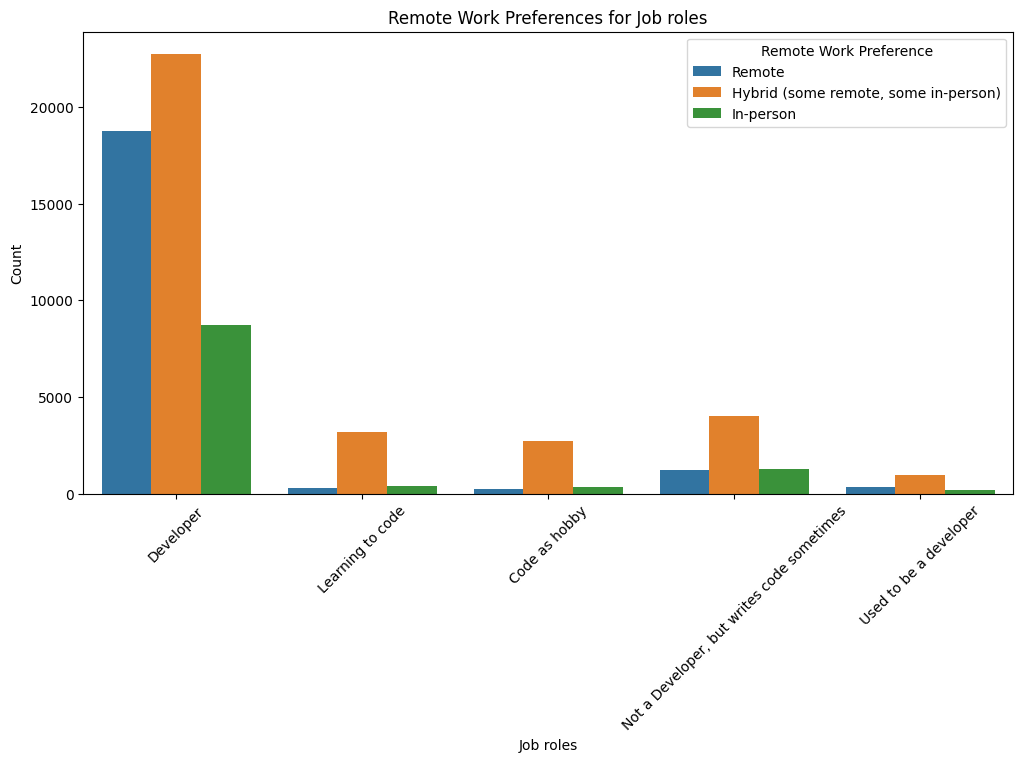

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='MainBranch', hue='RemoteWork')
plt.title('Remote Work Preferences for Job roles')
plt.xlabel('Job roles')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Work Preference')
plt.show()

In [53]:
remote_work_crosstab=pd.crosstab(index=[df['Employment'], df['MainBranch']], columns=df['RemoteWork'])

In [54]:
df['LanguageHaveWorkedWith'].isnull().sum()

np.int64(5692)

In [55]:
df['LanguageHaveWorkedWith'].fillna('', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1513852709.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LanguageHaveWorkedWith'].fillna('', inplace=True)


In [56]:
# Filling nulls and splitting languages into lists
df['HaveWorkedWith_list'] = df['LanguageHaveWorkedWith'].fillna('').apply(lambda x: x.split(';'))
df['WantToWorkWith_list'] = df['LanguageWantToWorkWith'].fillna('').apply(lambda x: x.split(';'))

#Explode to get all languages in separate rows
have_workedwith = df.explode('HaveWorkedWith_list')
want_to_workwith = df.explode('WantToWorkWith_list')

have_counts = have_workedwith[have_workedwith['HaveWorkedWith_list'].str.strip() != '']['HaveWorkedWith_list'].value_counts()
want_counts = want_to_workwith[want_to_workwith['WantToWorkWith_list'].str.strip() != '']['WantToWorkWith_list'].value_counts()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\2801689568.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_languages_by_region = language_counts_top.groupby('Country').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)


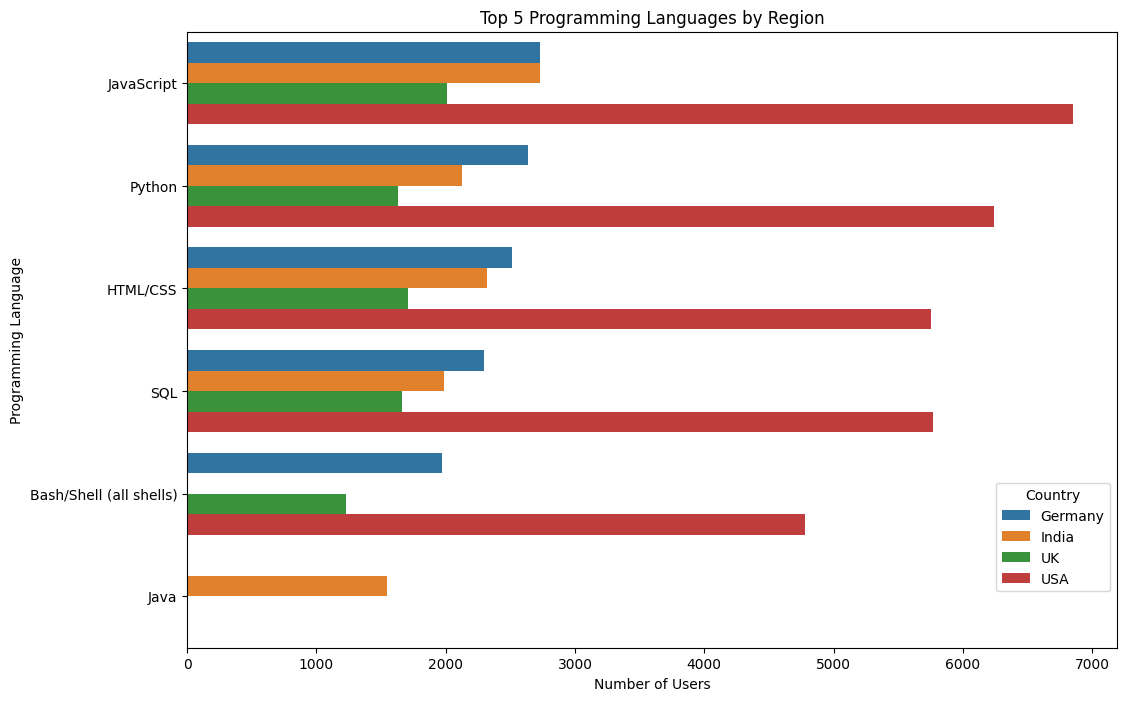

In [57]:
# drop NaNs and empties, keep only actual languages
df_clean = have_workedwith[
    have_workedwith['HaveWorkedWith_list'].notna() & 
    (have_workedwith['HaveWorkedWith_list'] != '')
]
# NEW: Exclude problematic countries early
exclude_countries = ['Unknown'] 
df_clean = df_clean[~df_clean['Country'].isin(exclude_countries)]

# 4. Count languages by region
language_counts = df_clean.groupby(['Country', 'HaveWorkedWith_list']).size().reset_index(name='Count')

# Filter top 5 regions
top_regions = df['Country'].value_counts().nlargest(5).index
language_counts_top = language_counts[language_counts['Country'].isin(top_regions)]

# For each region, get top 5 languages
top_languages_by_region = language_counts_top.groupby('Country').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# 7. Visualize with barplot
plt.figure(figsize=(12,8))
sns.barplot(data=top_languages_by_region, x='Count', y='HaveWorkedWith_list', hue='Country')
plt.title('Top 5 Programming Languages by Region')
plt.xlabel('Number of Users')
plt.ylabel('Programming Language')
plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.08), title='Country')
plt.show()

In [58]:
df['JobSat_missing'] = df['JobSat'].isna().astype(int)
df['JobSat'] = df.groupby(['Employment', 'EdLevel'])['JobSat'].transform(lambda x: x.fillna(x.median()))


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty sli

In [59]:
# Level 2: Broader groups (e.g., Employment only)
df['JobSat'] = df.groupby('Employment')['JobSat'].transform(
    lambda x: x.fillna(x.median())
)

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty sli

In [60]:
global_median = df['JobSat'].median()
df['JobSat'] = df['JobSat'].fillna(global_median)

In [61]:
df['JobSatPoints_1'].fillna("No response", inplace=True)
df['WorkExp'].fillna('No response', inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\659396370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSatPoints_1'].fillna("No response", inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\659396370.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No response' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['JobSatPoints_1'].fillna("No response", inplace

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3494376459.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


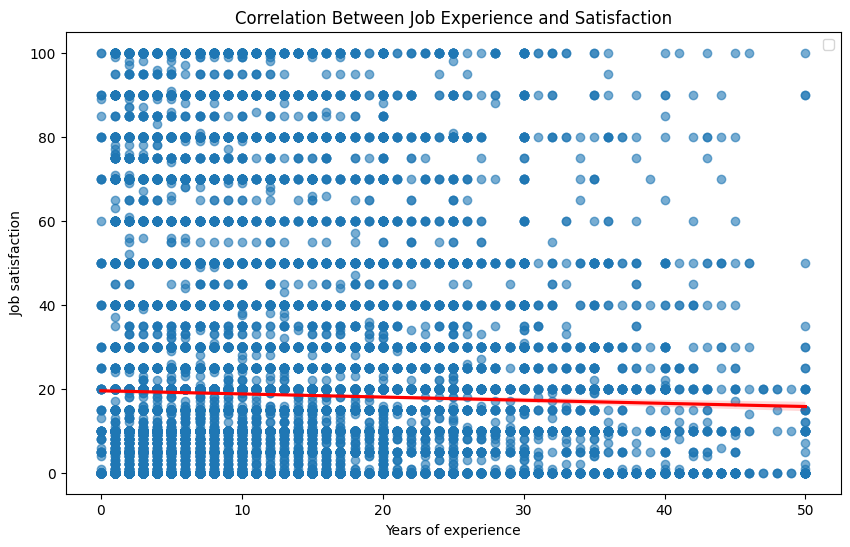

In [62]:
plt.figure(figsize=(10,6))
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')
sns.regplot(data=df, x='WorkExp', y='JobSatPoints_1', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation Between Job Experience and Satisfaction')
plt.xlabel('Years of experience')
plt.ylabel('Job satisfaction')
plt.legend()
plt.show()

In [63]:
df['EdLevel']

0                                   Lower School
1                                     Bachelor’s
2                                       Master’s
3        College/university study without degree
4                               Secondary school
                          ...                   
65432                                 Bachelor’s
65433                                 Bachelor’s
65434                                 Bachelor’s
65435                           Secondary school
65436                                 Bachelor’s
Name: EdLevel, Length: 65437, dtype: object

In [64]:
df[['JobSatPoints_6', 'JobSatPoints_7']].fillna('No response', inplace=True)
df2=df.copy()
df2['Employment']=df['Employment'].str.split(';')
empl=df2.explode('Employment')
top10_emptype=empl.groupby('Employment').size().nlargest(10)
empl

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\2095067822.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No response' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[['JobSatPoints_6', 'JobSatPoints_7']].fillna('No response', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\2095067822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['JobSatPoints_6', 'JobSatPoints_7']].fillna('No response', inplace=True)


ResponseId        MainBranch       Age    Employment  \
0               1         Developer  Under 18  Employed, FT   
1               2         Developer     35-44  Employed, FT   
2               3         Developer     45-54  Employed, FT   
3               4  Learning to code     18-24   Student, FT   
4               5         Developer     18-24   Student, FT   
...           ...               ...       ...           ...   
65432       65433         Developer     18-24  Employed, FT   
65433       65434         Developer     25-34  Employed, FT   
65434       65435         Developer     25-34  Employed, FT   
65435       65436         Developer     18-24  Employed, FT   
65436       65437     Code as hobby     18-24   Student, FT   

                                 RemoteWork   Check  \
0                                    Remote  Apples   
1                                    Remote  Apples   
2                                    Remote  Apples   
3      Hybrid (some remote, some in-person)  Apples   
4      Hybrid (some remote, some in-person)  Apples   
...                                     ...     ...   
65432                                Remote  Apples   
65433                                Remote  Apples   
65434                             In-person  Apples   
65435  Hybrid (some remote, some in-person)  Apples   
65436  Hybrid (some remote, some in-person)  Apples   

                                        CodingActivities  \
0                                                  Hobby   
1      Hobby;Contribute to open-source projects;Other...   
2      Hobby;Contribute to open-source projects;Other...   
3      Hobby;Contribute to open-source projects;Other...   
4      Hobby;Contribute to open-source projects;Other...   
...                                                  ...   
65432                      Hobby;School or academic work   
65433           Hobby;Contribute to open-source projects   
65434                                              Hobby   
65435  Hobby;Contribute to open-source projects;Profe...   
65436  Hobby;Contribute to open-source projects;Profe...   

                                       EdLevel  \
0                                 Lower School   
1                                   Bachelor’s   
2                                     Master’s   
3      College/university study without degree   
4                             Secondary school   
...                                        ...   
65432                               Bachelor’s   
65433                               Bachelor’s   
65434                               Bachelor’s   
65435                         Secondary school   
65436                               Bachelor’s   

                                               LearnCode  \
0                                 Books / Physical media   
1      Books / Physical media;Colleague;On the job tr...   
2      Books / Physical media;Colleague;On the job tr...   
3      Other online resources (e.g., videos, blogs, f...   
4      Other online resources (e.g., videos, blogs, f...   
...                                                  ...   
65432  On the job training;School (i.e., University, ...   
65433                                                NaN   
65434  Other online resources (e.g., videos, blogs, f...   
65435  On the job training;Other online resources (e....   
65436                                                NaN   

                                         LearnCodeOnline  ... JobSat  \
0                                                    NaN  ...    7.0   
1      Technical documentation;Blogs;Books;Written Tu...  ...    7.0   
2      Technical documentation;Blogs;Books;Written Tu...  ...    7.0   
3      Stack Overflow;How-to videos;Interactive tutorial  ...    7.0   
4      Technical documentation;Blogs;Written Tutorial...  ...    7.0   
...                                                  ...  ...    ...   
65432                                     

In [65]:
# 1. Cross-tabulation of EdLevel and Employment
ed_employment_crosstab = pd.crosstab(empl['EdLevel'], empl['Employment'])

ed_employment_crosstab

Employment                               Employed, FT  Employed, PT  \
EdLevel                                                               
Associate degree                                 1260           137   
Bachelor’s                                      22098          1666   
College/university study without degree          4494           669   
Lower School                                      201            79   
Master’s                                        12489           753   
Professional degree                              2312           149   
Secondary school                                 1860           623   
Something else                                    448            69   

Employment                               I prefer not to say  \
EdLevel                                                        
Associate degree                                           9   
Bachelor’s                                               178   
College/university study without degree                   51   
Lower School                                              51   
Master’s                                                  53   
Professional degree                                       29   
Secondary school                                          92   
Something else                                            83   

Employment                               IC, freelancer, or SE  \
EdLevel                                                          
Associate degree                                           323   
Bachelor’s                                                4399   
College/university study without degree                   1634   
Lower School                                               159   
Master’s                                                  2679   
Professional degree                                        485   
Secondary school                                           902   
Something else                                             145   

Employment                               NE, and not looking for work  \
EdLevel                                                                 
Associate degree                                                   22   
Bachelor’s                                                        336   
College/university study without degree                           174   
Lower School                                                      155   
Master’s                                                          110   
Professional degree                                                23   
Secondary school                                                  338   
Something else                                                     45   

Employment                               NE, but looking for work  Retired  \
EdLevel                                                                      
Associate degree                                              127       23   
Bachelor’s                                                   1842      235   
College/university study without degree                       618      107   
Lower School                                                  114       12   
Master’s                                                      555      149   
Professional degree                                            86      112   
Secondary school                                              528       24   
Something else                                                 84       19   

Employment                               Student, FT  Student, PT  
EdLevel                                                            
Associate degree                                 189           98  
Bachelor’s                                      2821         1062  
College/university study without degree         1484          522  
Lower School                                     583           90  
Master’s                                         584          345  

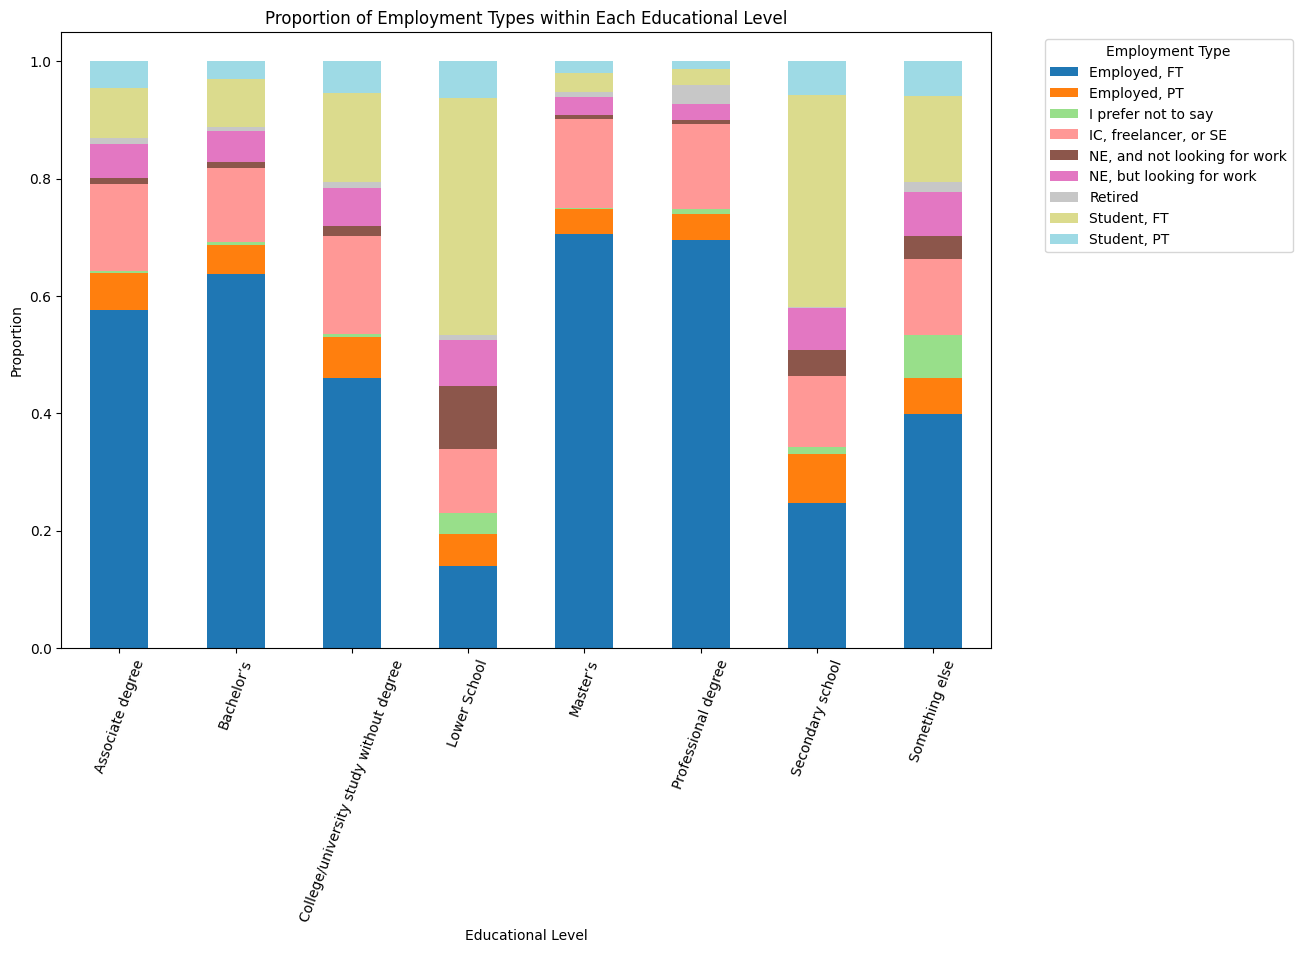

In [66]:
ed_employment_prop = ed_employment_crosstab.div(ed_employment_crosstab.sum(axis=1), axis=0)

ed_employment_prop.plot(kind='bar', stacked=True, figsize=(12,8), colormap='tab20')
plt.title('Proportion of Employment Types within Each Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Proportion')
plt.xticks(rotation=70)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [67]:
df['JobSat'].value_counts()

JobSat
7.00     34862
8.00     11791
9.00      6033
6.00      3906
10.00     2265
5.00      2230
4.00      1271
3.00      1170
2.00       796
1.00       321
0.00       318
7.50       285
6.50       176
9.50         5
8.50         4
5.50         3
6.25         1
Name: count, dtype: int64

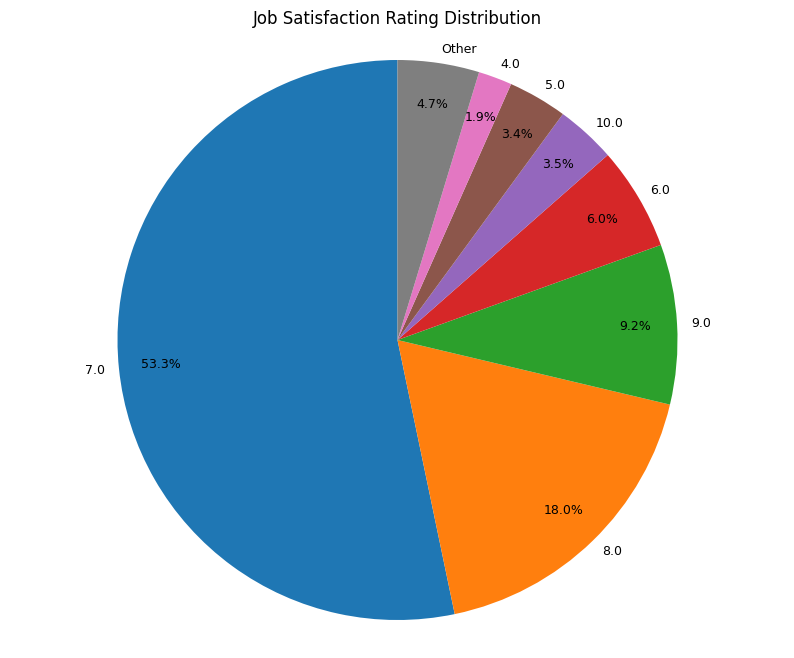

In [68]:
counts_desc = df['JobSat'].value_counts().sort_values(ascending=False)
order = counts_desc.index
sizes_full = counts_desc.values
labels_full = order.tolist()  # Keep original labels


# No Response (first, largest) + top 6 remaining ratings + Other (sum of rest)
no_response_label = labels_full[0]
no_response_size = sizes_full[0]
top6_labels = labels_full[1:7]
top6_sizes = sizes_full[1:7]
other_size = sizes_full[7:].sum()

sizes = np.append([no_response_size], np.append(top6_sizes, other_size))
labels = [no_response_label] + top6_labels + ['Other']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 9},
                                   pctdistance=0.85, labeldistance=1.05)
plt.title('Job Satisfaction Rating Distribution')
plt.axis('equal')
plt.show()

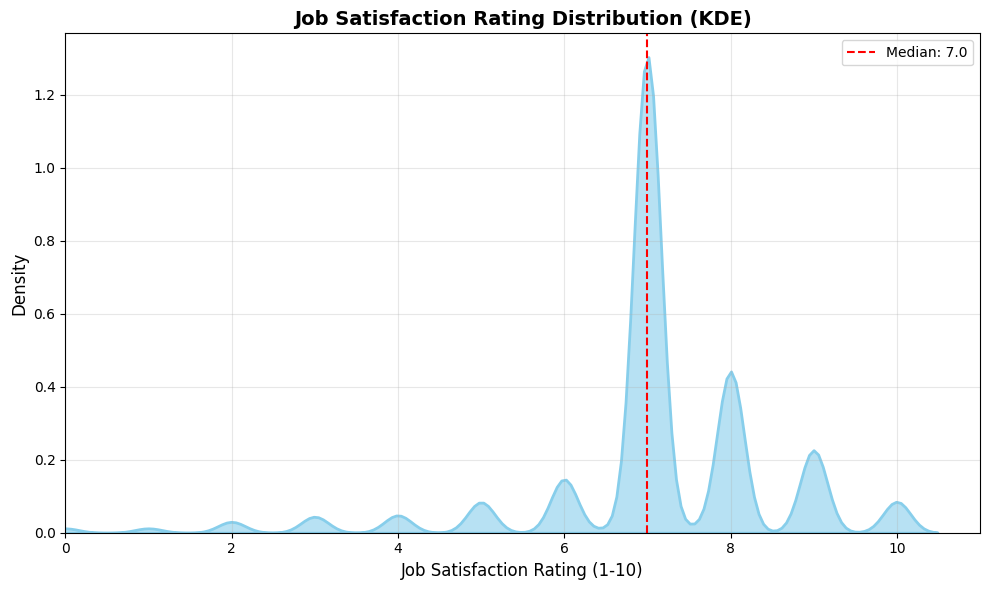

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use your newly imputed numeric column (handles original nulls properly)
data = df['JobSat'].dropna()  # Clean numeric ratings 1-10

plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, fill=True, alpha=0.6, color='skyblue', linewidth=2)
plt.axvline(x=data.median(), color='red', linestyle='--', label=f'Median: {data.median():.1f}')
plt.title('Job Satisfaction Rating Distribution (KDE)', fontsize=14, fontweight='bold')
plt.xlabel('Job Satisfaction Rating (1-10)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 11)  # 1-10 scale + padding
plt.tight_layout()
plt.show()


In [70]:
# Fill nulls and split languages into lists
df['HaveWorkedWith_list'] = df['LanguageHaveWorkedWith'].fillna('').apply(lambda x: x.split(';'))
df['WantToWorkWith_list'] = df['LanguageWantToWorkWith'].fillna('').apply(lambda x: x.split(';'))

# Explode to get all languages in separate rows
have_worked = df.explode('HaveWorkedWith_list')
want_to_work = df.explode('WantToWorkWith_list')

# Calculate value counts
have_counts = have_worked['HaveWorkedWith_list'].str.strip().value_counts()
want_counts = want_to_work['WantToWorkWith_list'].str.strip().value_counts()

have_workedwith['HaveWorkedWith_list'].replace('', 'No response', inplace=True)
want_to_workwith['WantToWorkWith_list'].replace('', 'No response', inplace=True)
# Combine into one DataFrame
compare_df = pd.DataFrame({
    'HaveWorkedWith': have_counts,
    'WantToWorkWith': want_counts
}).fillna(0)

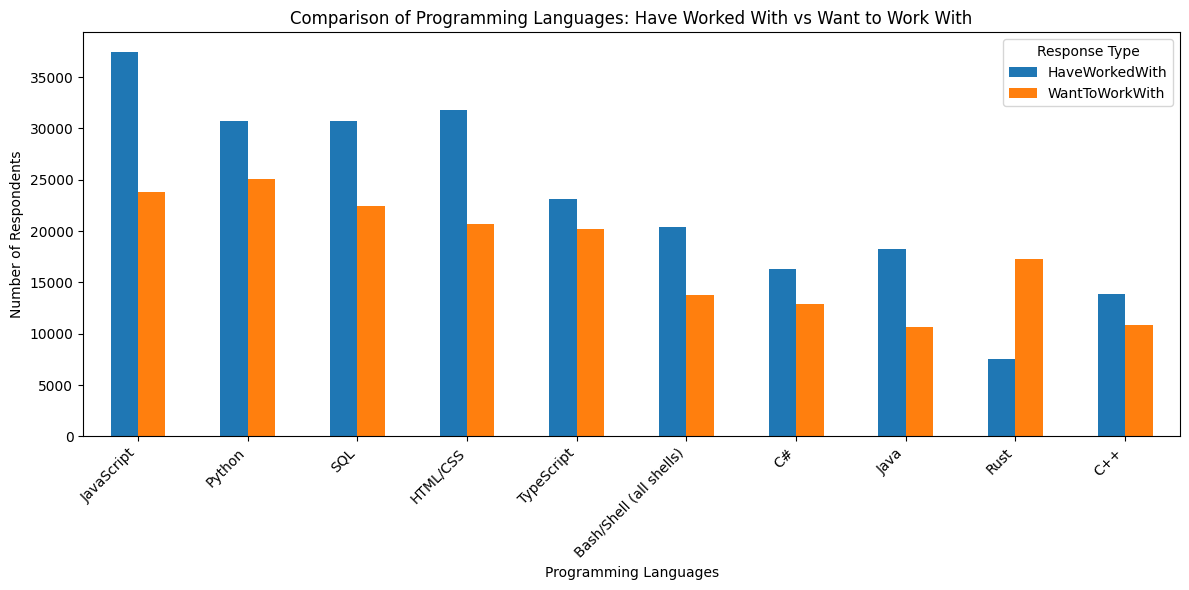

In [71]:
# Sort by total counts for better visualization
compare_df['Total'] = compare_df['HaveWorkedWith'] + compare_df['WantToWorkWith']
compare_df_sorted = compare_df.sort_values('Total', ascending=False).head(10)  # top 10 languages

# Plot grouped bar chart
compare_df_sorted[['HaveWorkedWith', 'WantToWorkWith']].plot(
    kind='bar',
    figsize=(12,6),
    color=['#1f77b4', '#ff7f0e']
)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Programming Languages')
plt.ylabel('Number of Respondents')
plt.title('Comparison of Programming Languages: Have Worked With vs Want to Work With')
plt.legend(title='Response Type')
plt.tight_layout()
plt.show()

In [72]:
import numpy as np

# Convert YearsCodePro to numeric values
def convert_years(x):
    if pd.isnull(x):
        return np.nan
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    else:
        try:
            return float(x)
        except:
            return np.nan

df['YearsCodePro_num'] = df['YearsCodePro'].apply(convert_years)
df_corr = df[['JobSat', 'YearsCodePro_num']]
# Calculate Pearson correlation
pearson_corr = df_corr['JobSat'].corr(df_corr['YearsCodePro_num'], method='pearson')

# Calculate Spearman correlation
spearman_corr = df_corr['JobSat'].corr(df_corr['YearsCodePro_num'], method='spearman')

print(f"Pearson correlation: {pearson_corr:.3f}")
print(f"Spearman correlation: {spearman_corr:.3f}")

Pearson correlation: 0.080
Spearman correlation: 0.102


In [73]:
age_map = {
    'Under 18': 17,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 years or older': 70
}

# 2. Convert and clean
df['Age_num'] = df['Age'].map(age_map)
df_clean = df.dropna(subset=['Age_num', 'CompTotal', 'YearsCodePro'])

# 3. Spearman correlation (best for ordinal + skewed data)
corr_comp = df_clean[['Age_num', 'CompTotal']].corr(method='spearman').iloc[0,1]
corr_years = df_clean[['Age_num', 'YearsCodePro']].corr(method='spearman').iloc[0,1]
pearcorr_comp = df_clean[['Age_num', 'CompTotal']].corr(method='pearson').iloc[0,1]
pearcorr_years = df_clean[['Age_num', 'YearsCodePro']].corr(method='pearson').iloc[0,1]

print(f'Age vs CompTotal (Spearman correlation): {corr_comp:.3f}')
print(f'Age vs YearsCodePro (Spearman correlation): {corr_years:.3f}')
print(f'Age vs CompTotal (Pearson correlation): {pearcorr_comp:.3f}')
print(f'Age vs YearsCodePro (Pearson correlation): {pearcorr_years:.3f}')

Age vs CompTotal (Spearman correlation): 0.144
Age vs YearsCodePro (Spearman correlation): 0.763
Age vs CompTotal (Pearson correlation): -0.003
Age vs YearsCodePro (Pearson correlation): 0.812


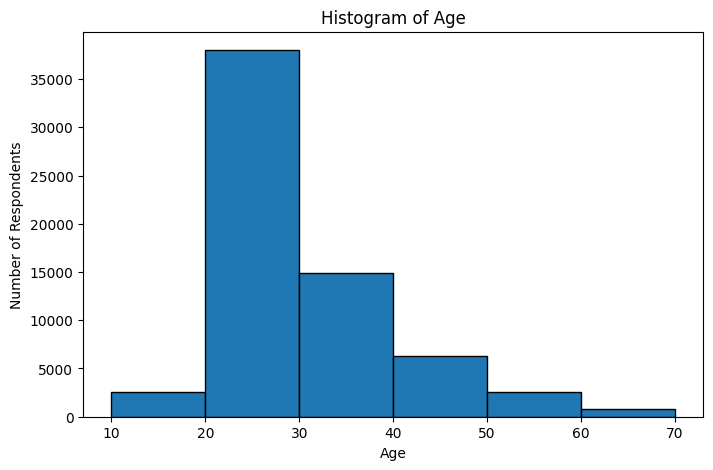

In [74]:
plt.figure(figsize=(8,5))
plt.hist(df['Age_num'].dropna(), bins=range(10, 80, 10), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Age')
plt.xticks(range(10, 80, 10))
plt.show()

In [75]:
#Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Salary_imputed'].quantile(0.25)
Q3 = df['Salary_imputed'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

Q1: 35545.0
Q3: 87579.5
IQR: 52034.5
Lower bound for outliers: -42506.75
Upper bound for outliers: 165631.25


In [76]:
df['Salary_imputed']

0        150000.0
1         87579.5
2         95541.0
3         74874.0
4         65514.0
           ...   
65432     65000.0
65433     65000.0
65434     65000.0
65435     49407.0
65436     65000.0
Name: Salary_imputed, Length: 65437, dtype: float64

In [77]:
df['Salary_imputed'].isnull().sum()

np.int64(0)

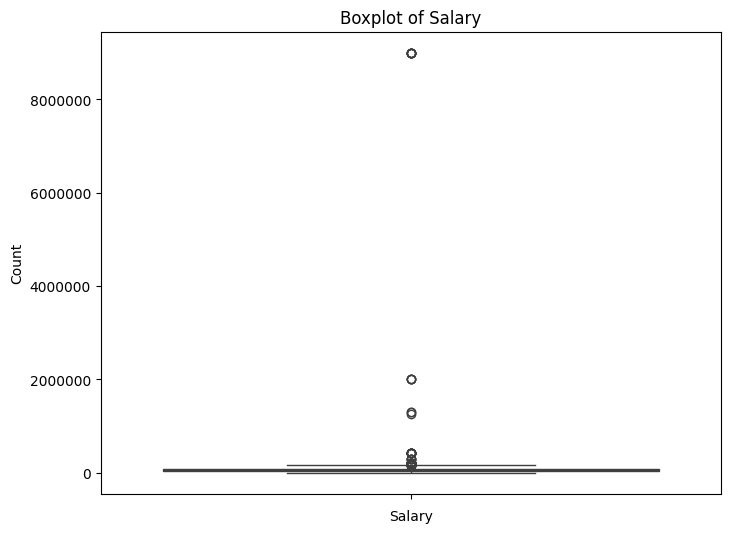

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Salary_imputed'])
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

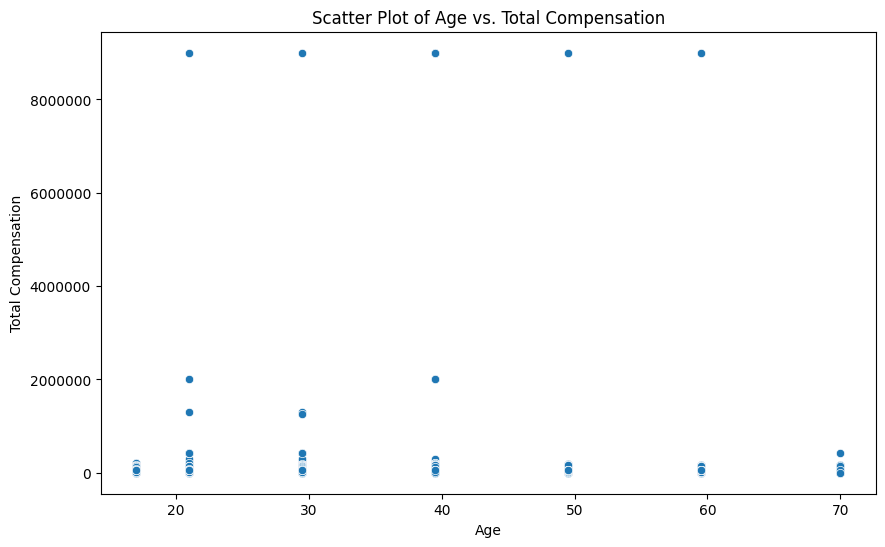

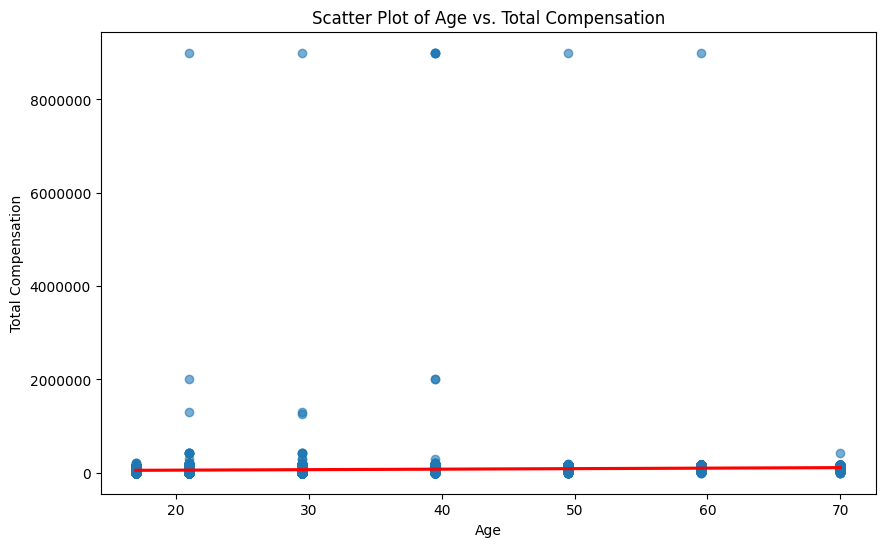

In [79]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age_num', y='Salary_imputed', data=df)

plt.xlabel('Age')
plt.ylabel('Total Compensation')
plt.title('Scatter Plot of Age vs. Total Compensation')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(x='Age_num', y='Salary_imputed', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.xlabel('Age')
plt.ylabel('Total Compensation')
plt.title('Scatter Plot of Age vs. Total Compensation')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [80]:
salary_threshold = 3 * df['Salary_imputed'].mean()
high_values = (df.loc[df['Salary_imputed'] > salary_threshold, 'Salary_imputed']).values
high_values

array([ 425272. ,  210645. ,  425272. , 9000000. , 2000000. , 9000000. ,
        425272. ,  215098. ,  425272. ,  425272. ,  425272. ,  214355. ,
       2000000. ,  214355. ,  425272. , 9000000. ,  425272. ,  215098. ,
        210645. , 1292956.5, 9000000. , 9000000. , 1292956.5,  214355. ,
       1250348. , 2000000. , 2000000. ,  214355. , 9000000. ,  214355. ,
        210645. , 9000000. ,  304044. ,  214355. ,  214355. ,  214355. ,
        214355. ,  304044. ,  215098. ,  304044. ,  304044. ,  214355. ,
       9000000. ,  425272. ,  214355. ,  425272. ,  425272. ,  214355. ,
        425272. ])

In [81]:
df_no_outliers=df[df['Salary_imputed']<800000]
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65422 entries, 0 to 65436
Columns: 125 entries, ResponseId to Age_num
dtypes: category(1), float64(20), int64(3), object(101)
memory usage: 62.5+ MB


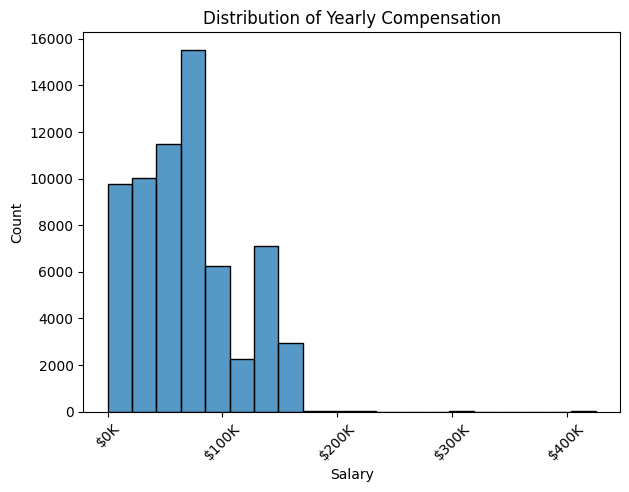

In [82]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns 

# Your histogram (adjust bins as needed)
# plt.hist(df['YearlyCompensation'])  # OR
sns.histplot(data=df_no_outliers, x='Salary_imputed', bins=20, kde=False)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${int(x/1e3):,}K'))

plt.tight_layout()
plt.xlabel('Salary')
plt.title('Distribution of Yearly Compensation')
plt.show()


In [83]:
ft_employed = df_no_outliers[df_no_outliers['Employment'] == 'Employed, FT']
ft_median_salary=ft_employed['Salary_imputed'].median()
print(ft_median_salary)

65000.0


                Salary_imputed   WorkExp  JobSatPoints_1
Salary_imputed        1.000000  0.270287       -0.108761
WorkExp               0.270287  1.000000       -0.026577
JobSatPoints_1       -0.108761 -0.026577        1.000000


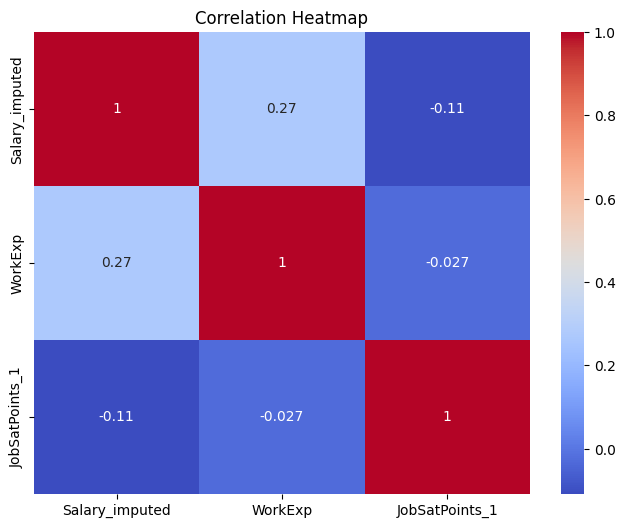

In [84]:
# Select the relevant columns
cols2 = ['Salary_imputed', 'WorkExp', 'JobSatPoints_1']
data_subset = df_no_outliers[cols2]

# Calculate the correlation matrix
corr_matrix = data_subset.corr()

# Display the correlation matrix
print(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

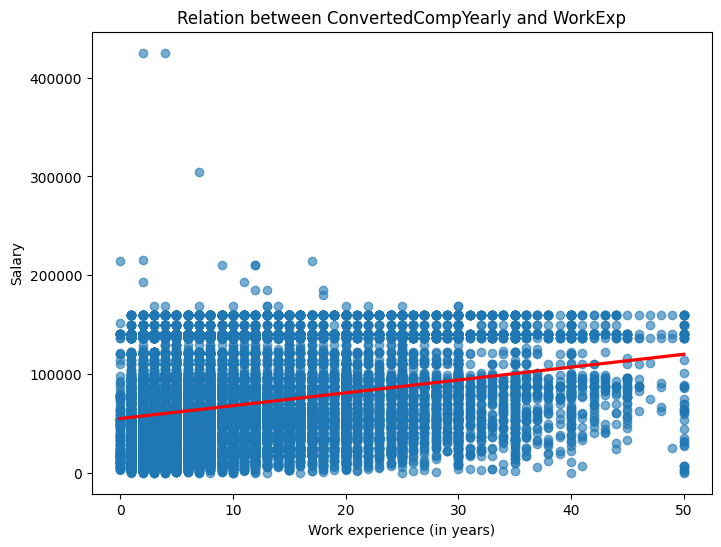

In [85]:
plt.figure(figsize=(8,6))
sns.regplot(data=data_subset, x='WorkExp', y='Salary_imputed', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relation between ConvertedCompYearly and WorkExp')
plt.xlabel('Work experience (in years)')
plt.ylabel('Salary')
plt.show()

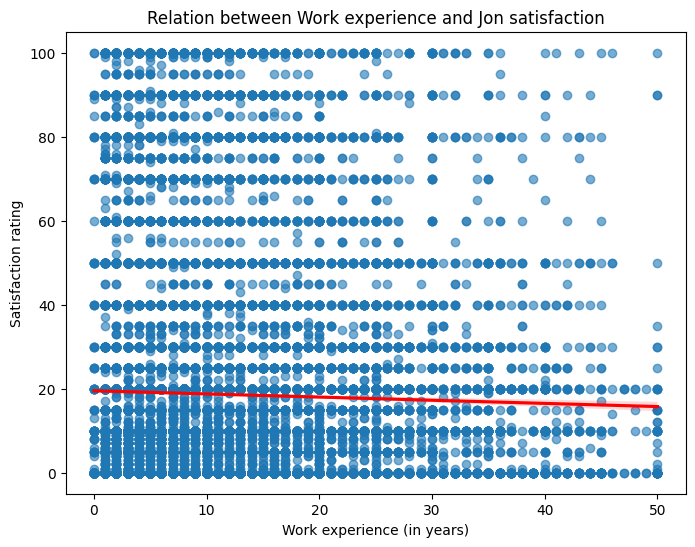

In [86]:
plt.figure(figsize=(8,6))
sns.regplot(data=data_subset, x='WorkExp', y='JobSatPoints_1', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relation between Work experience and Jon satisfaction')
plt.ylabel('Satisfaction rating')
plt.xlabel('Work experience (in years)')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\2210020104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['DatabaseWantToWorkWith'] = df_no_outliers['DatabaseWantToWorkWith'].fillna('No Response')


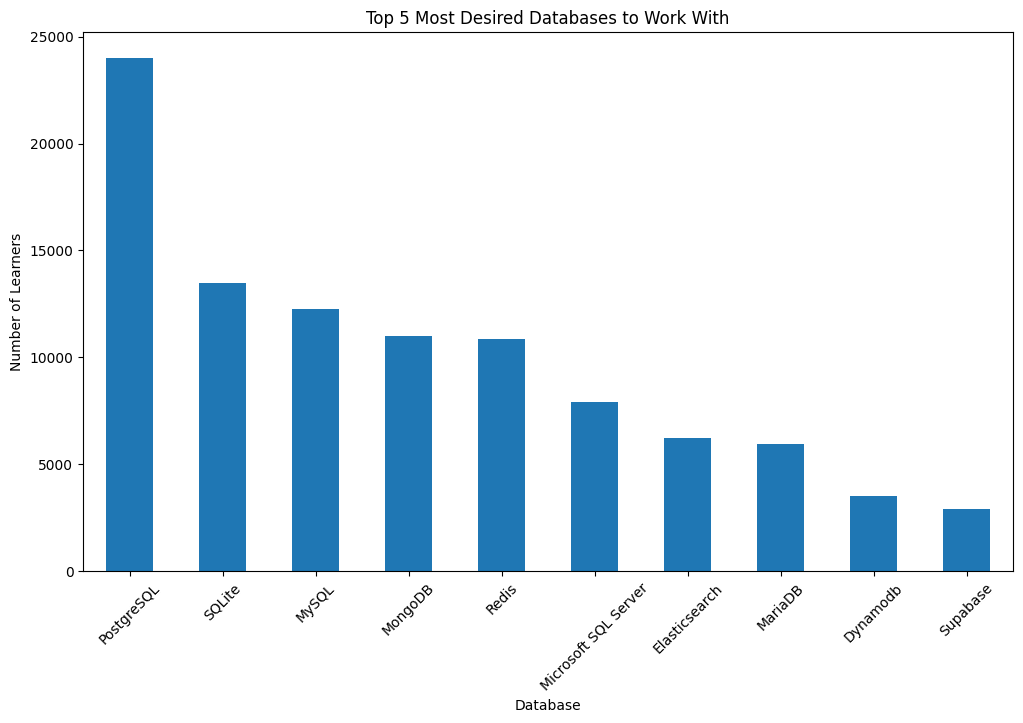

In [87]:
# Fill nulls with 'No Response' to keep track of missing answers if needed
df_no_outliers['DatabaseWantToWorkWith'] = df_no_outliers['DatabaseWantToWorkWith'].fillna('No Response')

# Step 3: Create a Series excluding 'No Response' for analysis
db_databasechoices = df_no_outliers.loc[df_no_outliers['DatabaseWantToWorkWith'] != 'No Response', 'DatabaseWantToWorkWith']

# Step 4: Split combined answers by ';' and explode into separate rows
db_databasechoices = db_databasechoices.str.split(';').explode()

# Step 5: Strip whitespace to clean entries
db_cleaned = db_databasechoices.str.strip()

# Step 6: Count occurrences of each database
db_counts = db_cleaned.value_counts()

# Step 7: Select top 5 most desired databases
top10_dbs = db_counts.head(10)

# Step 8: Plot histogram (bar chart)
plt.figure(figsize=(12,7))
top10_dbs.plot(kind='bar')
plt.title('Top 5 Most Desired Databases to Work With')
plt.xlabel('Database')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45)
plt.show()

In [88]:
df_no_outliers['DevType']=df_no_outliers['DevType'].fillna(df_no_outliers['DevType'].mode())

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1713158781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['DevType']=df_no_outliers['DevType'].fillna(df_no_outliers['DevType'].mode())


In [89]:
df_no_outliers['JobSatPoints_6'].isna().sum()

np.int64(35978)

In [90]:
df_no_outliers.shape

(65422, 125)

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty sli

Employment                MainBranch                                  Age              
Employed, FT              Code as hobby                               18-24                61
                                                                      25-34                88
                                                                      35-44                78
                                                                      45-54                62
                                                                      55-64                37
                                                                                           ..
Student, PT;Employed, PT  Used to be a developer                      25-34                 2
Student, PT;Retired       Code as hobby                               65 years or older     1
                          Learning to code                            55-64                 1
                          Not a Developer, but writes code sometim

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3691890854.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['JobSatPoints_6_imputed'] = df_no_outliers.groupby(group_cols)['JobSatPoints_6'].transform(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3691890854.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['JobSatPoints_6_imputed'] = df_no_outliers['JobSatPoints_6_imputed'].fillna(country_median)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\

Final NaNs: 0


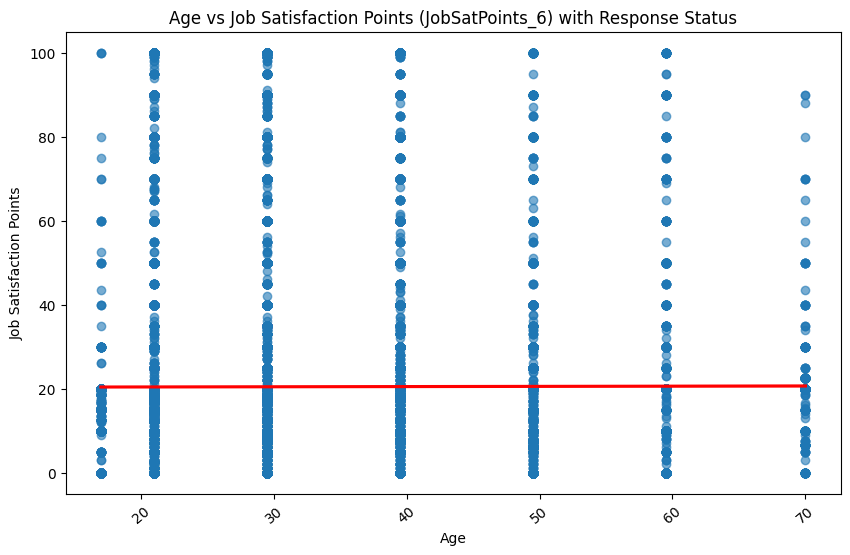

In [91]:
group_cols = ['Employment', 'MainBranch', 'Age']
group_sizes = df.groupby(group_cols).size()
print(group_sizes)

# Perform group-based median imputation for JobSatPoints_6
df_no_outliers['JobSatPoints_6_imputed'] = df_no_outliers.groupby(group_cols)['JobSatPoints_6'].transform(
    lambda x: x.fillna(x.median())
)
country_median = df_no_outliers.groupby('Country')['JobSatPoints_6'].transform('median')
df_no_outliers['JobSatPoints_6_imputed'] = df_no_outliers['JobSatPoints_6_imputed'].fillna(country_median)

# Step 3: Final fallback to global median
global_median = df_no_outliers['JobSatPoints_6_imputed'].median()
df_no_outliers['JobSatPoints_6_imputed'] = df_no_outliers['JobSatPoints_6_imputed'].fillna(global_median)

print("Final NaNs:", df_no_outliers['JobSatPoints_6_imputed'].isna().sum()) 

plt.figure(figsize=(10,6))
sns.regplot(
    data=df_no_outliers,
    x='Age_num',
    y='JobSatPoints_6_imputed',
    scatter_kws={'alpha':0.6}, line_kws={'color':'red'}
)

plt.title('Age vs Job Satisfaction Points (JobSatPoints_6) with Response Status')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=40)
plt.show()


In [92]:
# # Step 1: Most specific group — Country + EdLevel
#df['Jobsatpoints_6_imputed'] = df.groupby(['Country', 'Age'])['JobSatPoints_6'].transform('median')

#print("NaNs after Country+EdLevel:", df['Jobsatpoints_6_imputed'].isna().sum())

# Step 2: Fallback to Country-only median (for rows still NaN)
#country_median = df.groupby('Country')['Jobsatpoints_6'].transform('median')
#df['Jobsatpoints_6_imputed'] = df['Jobsatpoints_6_imputed'].fillna(country_median)

#print("NaNs after Country fallback:", df['Jobsatpoints_6_imputed'].isna().sum())

# Step 3: Final fallback to global median
#global_median = df['Jobsatpoints_6'].median()
##df['Jobsatpoints_6_imputed'] = df['Jobsatpoints_6_imputed'].fillna(global_median)

#print("Final NaNs:", df['Jobsatpoints_6_imputed'].isna().sum())  # should be 0

# Optional: Flag original missing values
#df['Jobsatpoints_6_missing_flag'] = df['Jobsatpoints_6'].isna().astype(int)

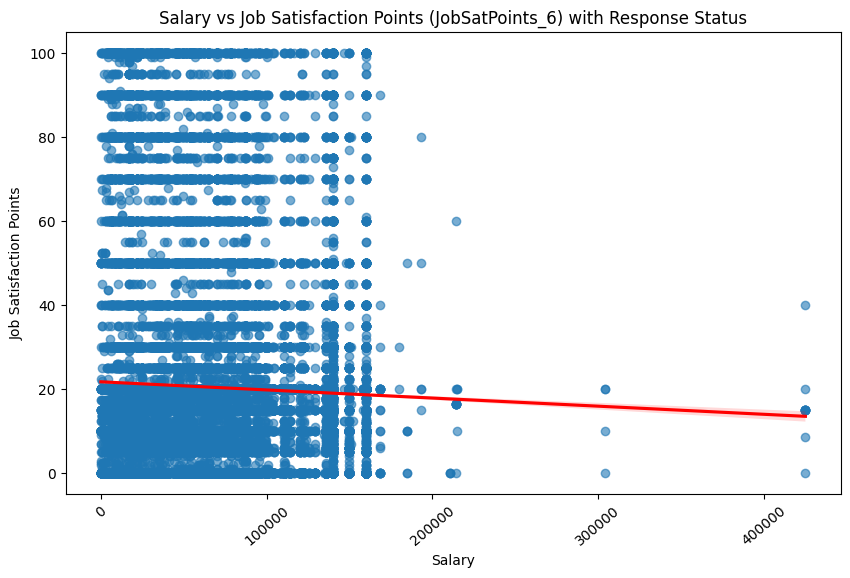

In [93]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=df_no_outliers,
    x='Salary_imputed',
    y='JobSatPoints_6_imputed',
scatter_kws={'alpha':0.6}, line_kws={'color':'red'}
)

plt.title('Salary vs Job Satisfaction Points (JobSatPoints_6) with Response Status')
plt.xlabel('Salary')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=40)
plt.show()

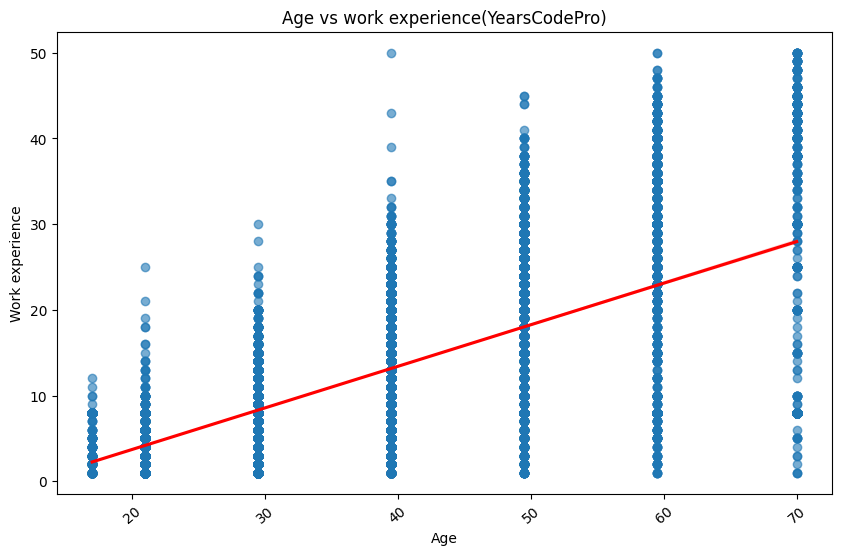

In [94]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=df_no_outliers,
    x='Age_num',
    y='YearsCodePro',
    scatter_kws={'alpha':0.6}, line_kws={'color':'red'}
)

plt.title('Age vs work experience(YearsCodePro)')
plt.xlabel('Age')
plt.ylabel('Work experience')
plt.xticks(rotation=40)
plt.show()

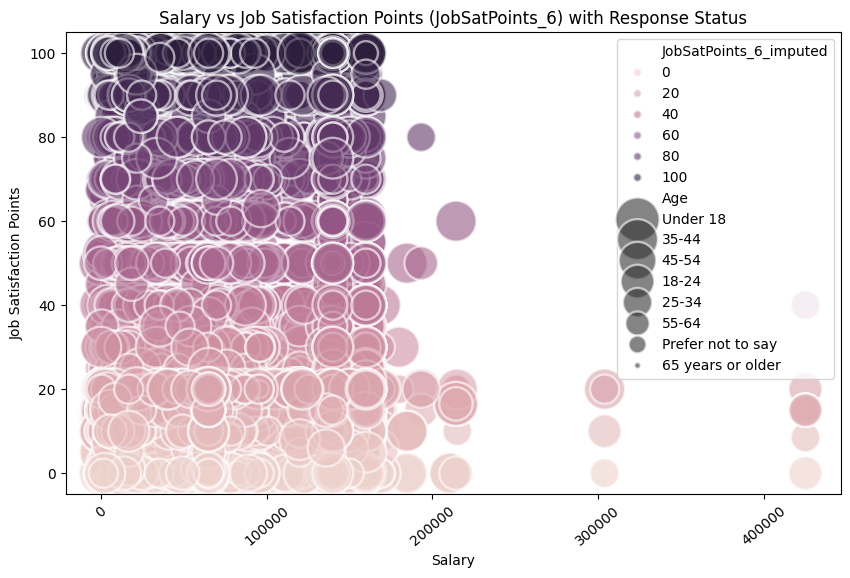

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_no_outliers,
    x='Salary_imputed',
    y='JobSatPoints_6_imputed',
    size='Age',               # Bubble size mapped to Age
    sizes=(20, 1000),
    hue='JobSatPoints_6_imputed',      # Adjust min and max bubble sizes
    alpha=0.6
)

plt.title('Salary vs Job Satisfaction Points (JobSatPoints_6) with Response Status')
plt.xlabel('Salary')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=40)
plt.show()

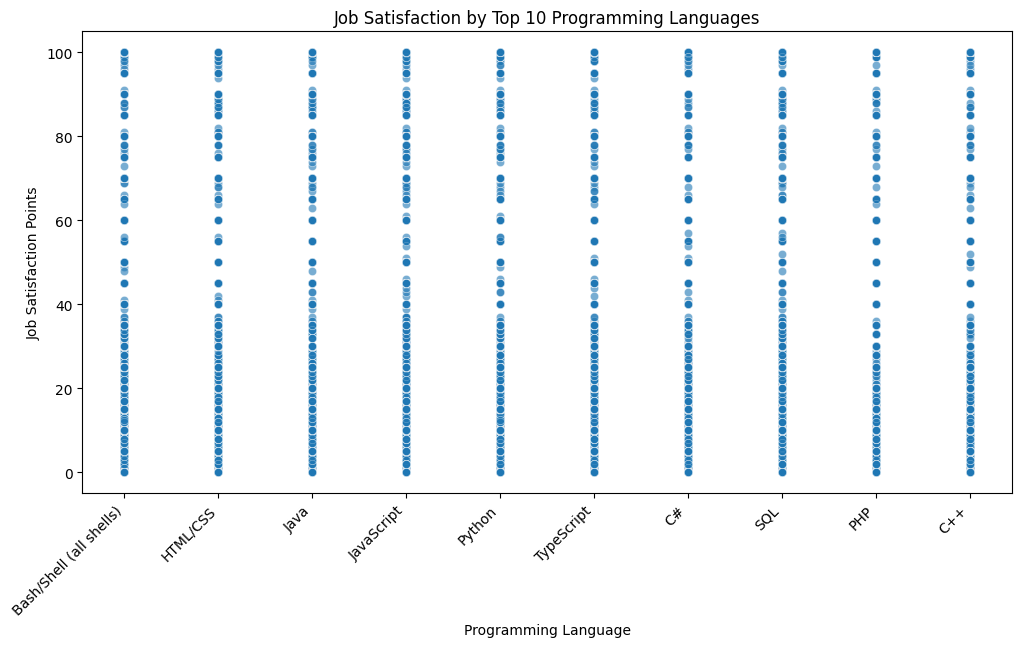

In [96]:

# Split the 'LanguageHaveWorkedWith' column into lists
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')

# Explode so each language has its own row
df_exploded = df.explode('Languages')

# Strip whitespace
df_exploded['Languages'] = df_exploded['Languages'].str.strip()

# Drop rows with missing JobSatPoints_6
df_exploded = df_exploded.dropna(subset=['JobSatPoints_6'])

# Find top 10 most common languages
top_10_langs = df_exploded['Languages'].value_counts().nlargest(10).index

# Filter dataframe to only include top 10 languages
df_top10 = df_exploded[df_exploded['Languages'].isin(top_10_langs)]

# Plot
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_top10,
    x='Languages',
    y='JobSatPoints_6',
    alpha=0.6
)

plt.title('Job Satisfaction by Top 10 Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=45, ha='right')
plt.show()

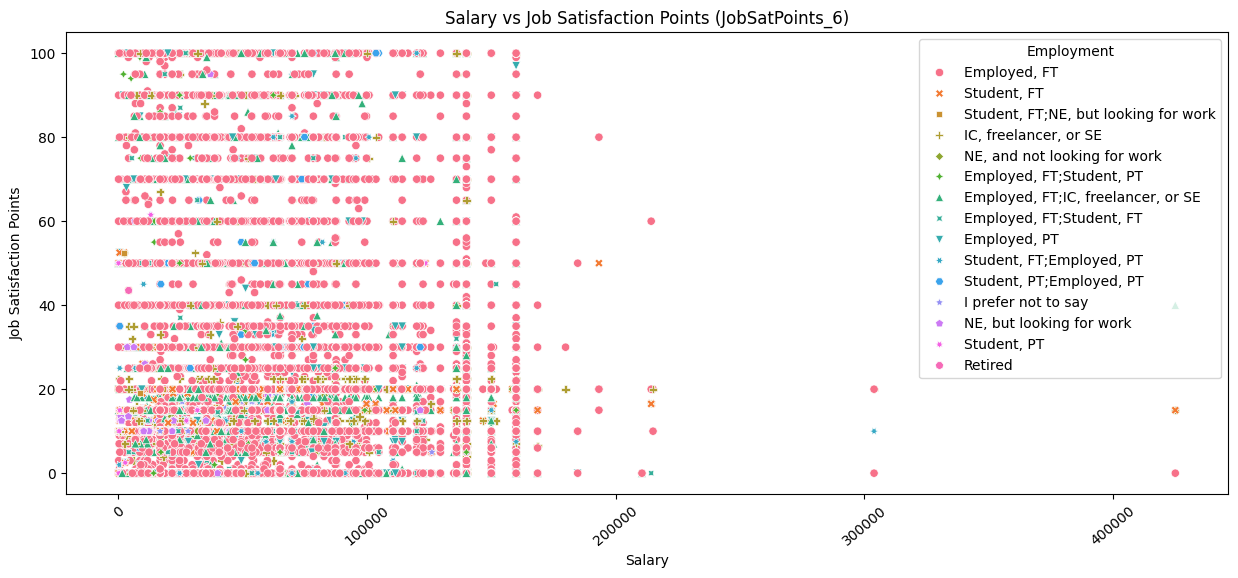

In [97]:
top_15_employment = df_no_outliers['Employment'].value_counts().nlargest(15).index

# Filter data to only include top 15 employment types
df_top15 = df_no_outliers[df_no_outliers['Employment'].isin(top_15_employment)]
plt.figure(figsize=(15,6))
sns.scatterplot(
    data=df_top15,
    x='Salary_imputed',
    y='JobSatPoints_6_imputed',
    hue='Employment',
    style='Employment',
)

plt.title('Salary vs Job Satisfaction Points (JobSatPoints_6)')
plt.xlabel('Salary')
plt.ylabel('Job Satisfaction Points')
plt.xticks(rotation=40)
plt.show()

In [98]:
age_order = [
    'Under 18',
    '18-24',
    '25-34',
    '35-44',
    '45-54',
    '55-64',
    '65 years or older',
    'Prefer not to say'
]
df_no_outliers['Age_cat'] = pd.Categorical(
    df_no_outliers['Age'], categories=age_order, ordered=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\2074838354.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Age_cat'] = pd.Categorical(


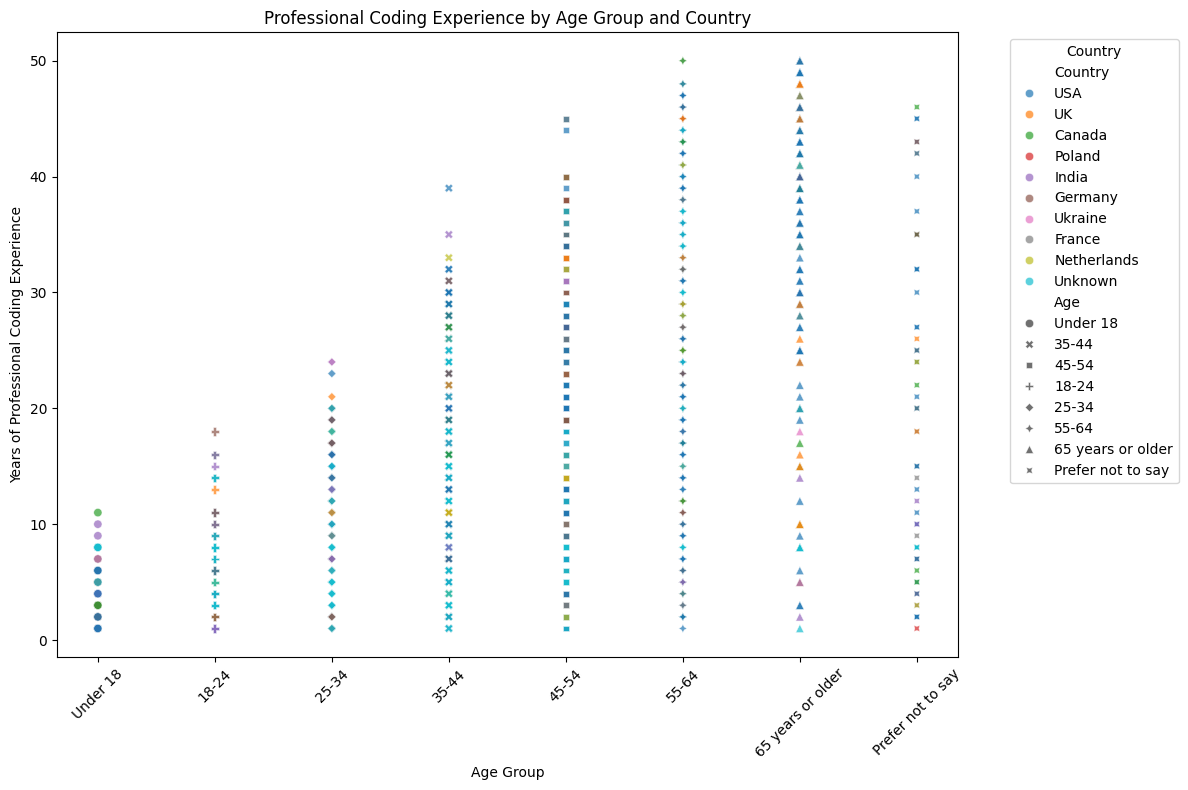

In [99]:
topcountries= df_no_outliers['Country'].value_counts().nlargest(10).index
df_topcountries=df_no_outliers[df_no_outliers['Country'].isin(topcountries)]
plt.figure(figsize=(12,8))
sns.scatterplot(
    data=df_topcountries,
    x='Age_cat',
    y='YearsCodePro',
    hue='Country',
    style='Age',  # marker style by age group
    alpha=0.7,
    palette='tab10'    # or another palette suitable for multiple countries
)

plt.title('Professional Coding Experience by Age Group and Country')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [100]:
df_no_outliers.to_csv('cleaned_survey_data.csv', index=False)
db_cleaned.to_csv('database_Exploded.csv', index=False)

In [101]:
df_no_outliers['JobSat'].value_counts().nunique

<bound method IndexOpsMixin.nunique of JobSat
7.00     34856
8.00     11788
9.00      6032
6.00      3906
10.00     2263
5.00      2230
4.00      1270
3.00      1169
2.00       796
1.00       321
0.00       318
7.50       284
6.50       176
9.50         5
8.50         4
5.50         3
6.25         1
Name: count, dtype: int64>

In [102]:
df_no_outliers['Age']=df_no_outliers['Age'].str.strip()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\4213036823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Age']=df_no_outliers['Age'].str.strip()


In [103]:
print(df_no_outliers['Age'].dropna().unique().tolist())


['Under 18', '35-44', '45-54', '18-24', '25-34', '55-64', 'Prefer not to say', '65 years or older']


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\148621124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['SOPartFreq'] = df_no_outliers['SOPartFreq'].fillna('Unknown')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\148621124.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['SOPartFreq'] = pd.Categorical(


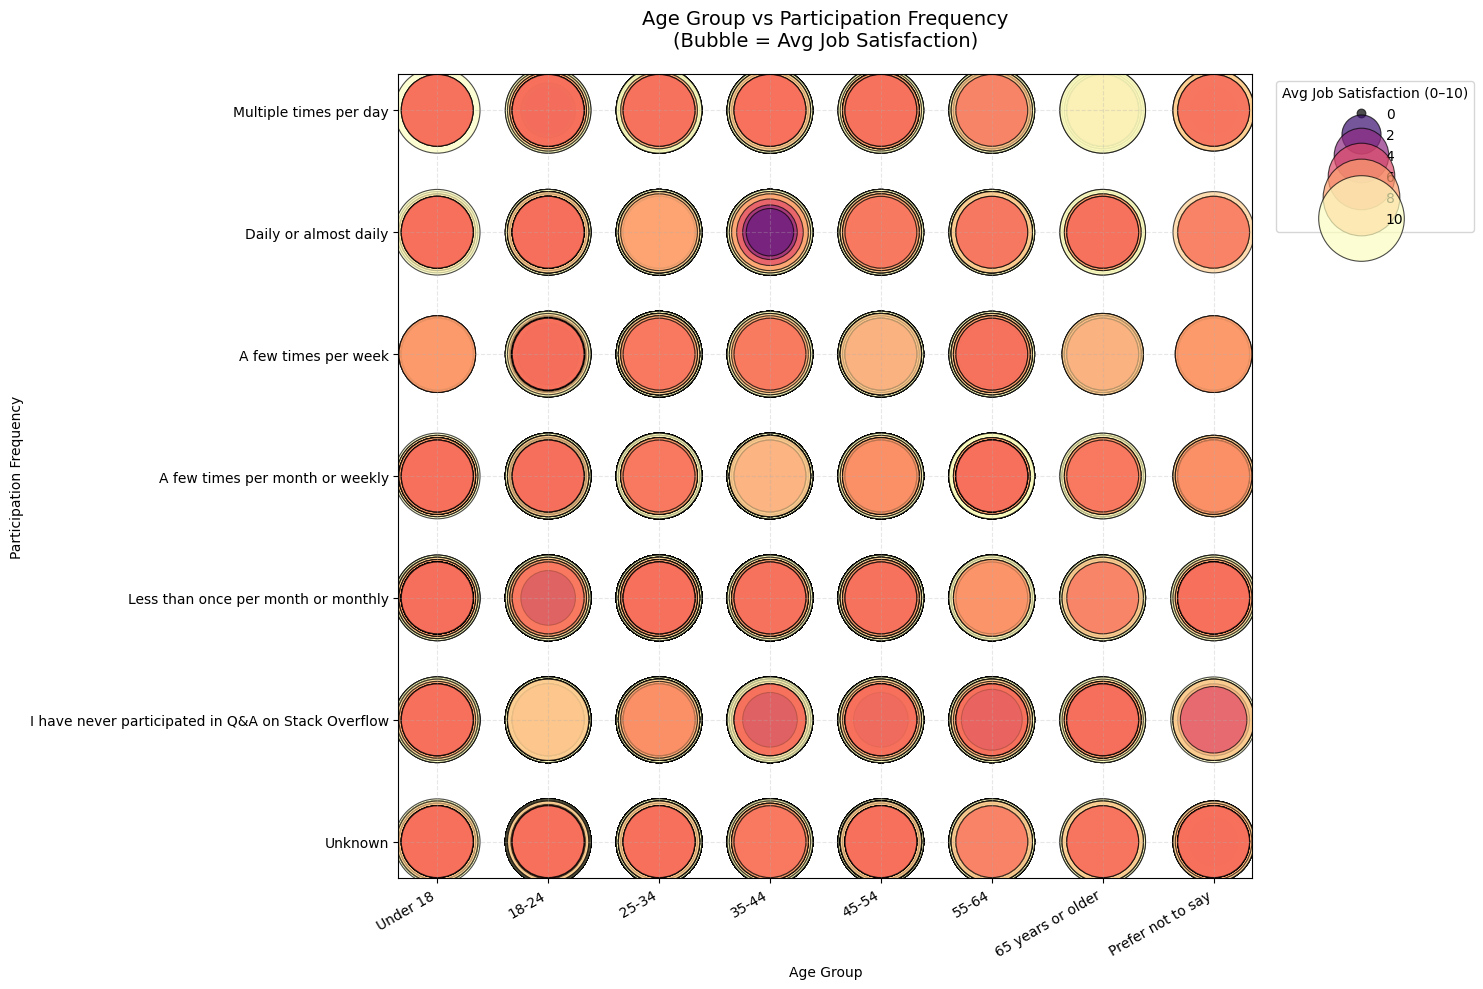

In [104]:

# Make sure missing values are handled
df_no_outliers['SOPartFreq'] = df_no_outliers['SOPartFreq'].fillna('Unknown')

# Define ordered categories
freq_order = [
    'Multiple times per day',
    'Daily or almost daily',
    'A few times per week',
    'A few times per month or weekly',
    'Less than once per month or monthly',
    'I have never participated in Q&A on Stack Overflow',
    'Unknown'
]

# Apply categorical ordering
df_no_outliers['SOPartFreq'] = pd.Categorical(
    df_no_outliers['SOPartFreq'], categories=freq_order, ordered=True
)

plt.figure(figsize=(15,10))
sns.scatterplot(
    data=df_no_outliers,
    x='Age_cat',
    y='SOPartFreq',
    size='JobSat',
    hue='JobSat',
    palette='magma',           
    sizes=(40, 3800), 
    alpha=0.7,
    edgecolor='black',
    linewidth=0.8
)

plt.title("Age Group vs Participation Frequency\n(Bubble = Avg Job Satisfaction)",
          fontsize=14, pad=20)
plt.xlabel("Age Group")
plt.ylabel("Participation Frequency")

plt.legend(
    title="Avg Job Satisfaction (0–10)",
    bbox_to_anchor=(1.02, 1), loc='upper left'
)
plt.xticks(rotation=30, ha='right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

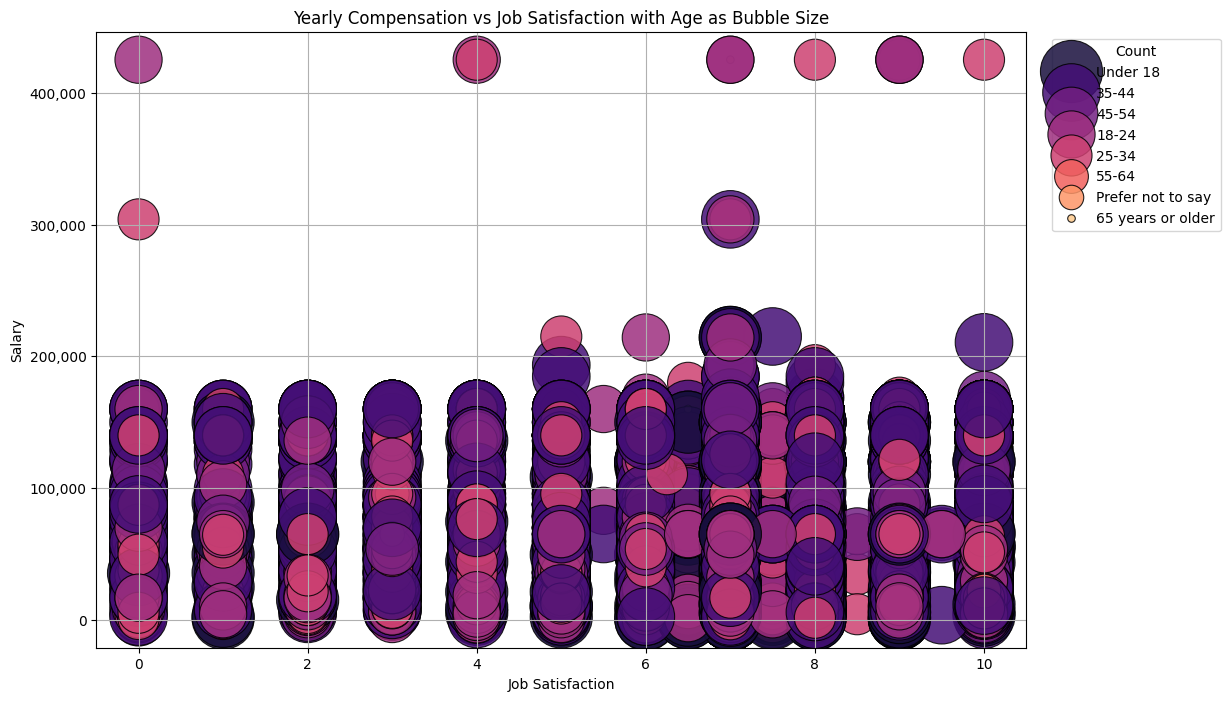

In [105]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))

# Seaborn scatterplot with size representing Age
sns.scatterplot(
    data=df_no_outliers,
    x='JobSat',
    y='Salary_imputed',
    hue='Age',
    size='Age',
    palette='magma',           # ← much better contrast than viridis for 0-10
    sizes=(30, 2000),         # now the range actually matters because n varies a lot
    alpha=0.85,
    edgecolor='black',
    linewidth=0.8
)

plt.title('Yearly Compensation vs Job Satisfaction with Age as Bubble Size')
plt.xlabel('Job Satisfaction')
plt.ylabel('Salary')
plt.ticklabel_format(axis='y', style='plain')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    title='Count'
)
plt.grid(True)
plt.show()

In [106]:
have_workedwith['HaveWorkedWith_list'].value_counts().nlargest(10)

HaveWorkedWith_list
JavaScript                 37492
HTML/CSS                   31816
Python                     30719
SQL                        30682
TypeScript                 23150
Bash/Shell (all shells)    20412
Java                       18239
C#                         16318
C++                        13827
C                          12184
Name: count, dtype: int64

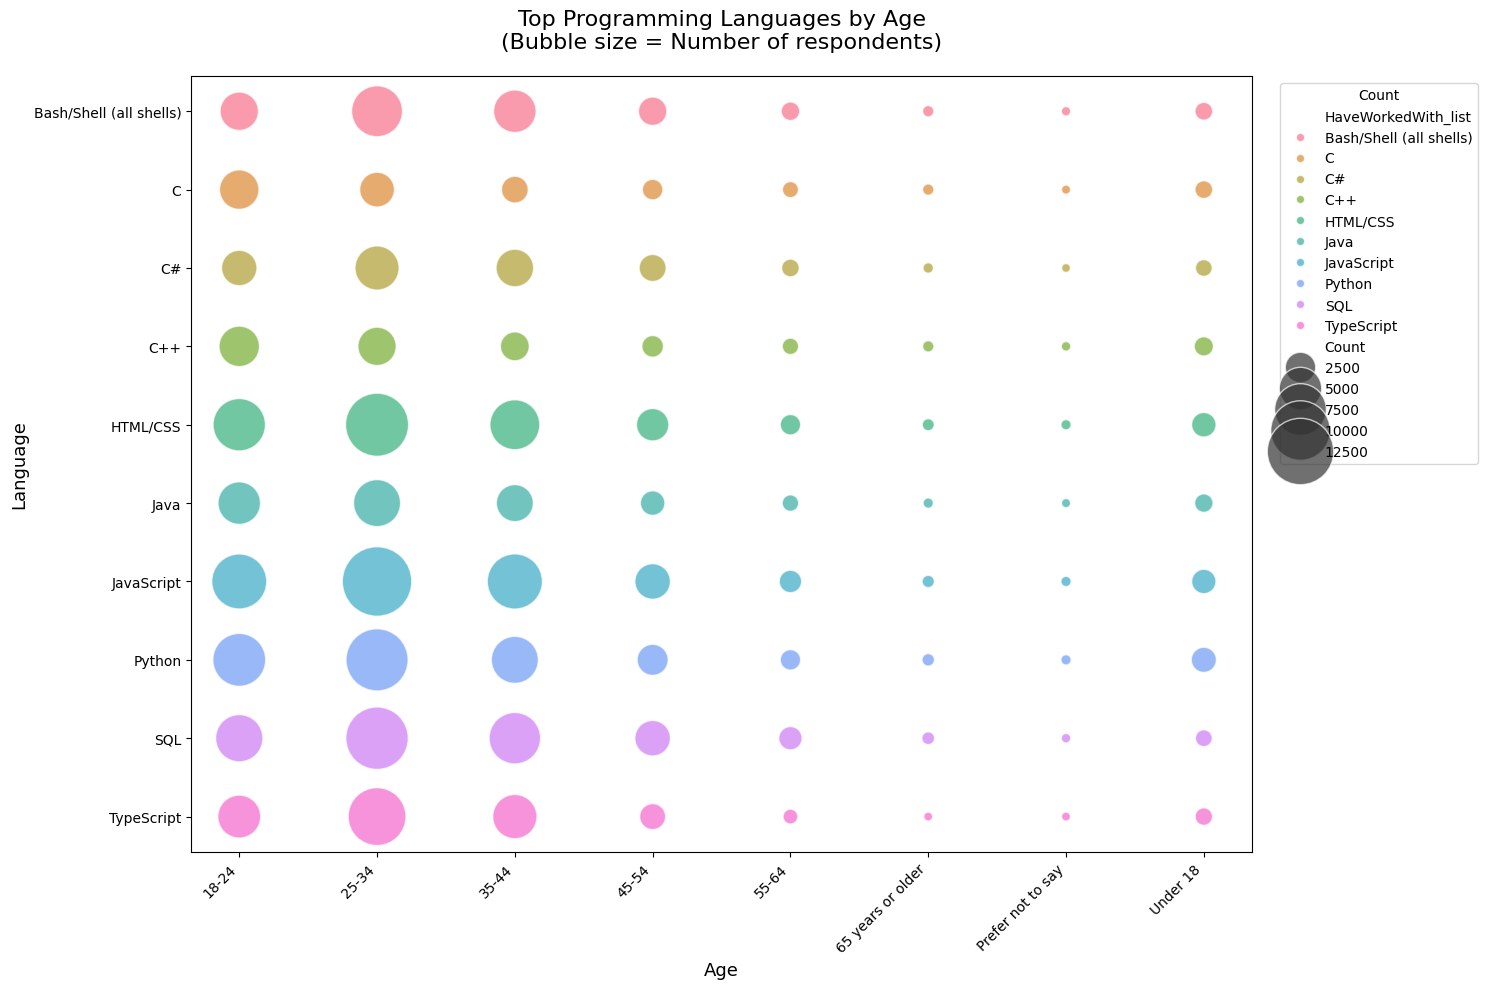

In [107]:
counts = have_workedwith.groupby(['Age', 'HaveWorkedWith_list']).size().reset_index(name='Count')

# Optional: only keep the most popular languages overall (e.g. top 10)
top_langs = counts.groupby('HaveWorkedWith_list')['Count'].sum().nlargest(10).index
counts = counts[counts['HaveWorkedWith_list'].isin(top_langs)]

plt.figure(figsize=(15,10))
sns.scatterplot(data=counts, x='Age', y='HaveWorkedWith_list', size='Count', 
                     hue='HaveWorkedWith_list', palette='husl',  # Better colors
                     sizes=(40, 2500), alpha=0.7, edgecolor='white', linewidth=1)
plt.title("Top Programming Languages by Age\n(Bubble size = Number of respondents)", fontsize=16, pad=20)
plt.xlabel("Age", fontsize=13)
plt.ylabel("Language", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    title='Count'
)
plt.tight_layout()
plt.show()



In [108]:
df_no_outliers['DatabaseWantToWorkWith']=df_no_outliers['DatabaseWantToWorkWith'].str.split(';')
db_exploded=df_no_outliers.explode('DatabaseWantToWorkWith')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1305342982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['DatabaseWantToWorkWith']=df_no_outliers['DatabaseWantToWorkWith'].str.split(';')


In [109]:
count2=db_exploded.groupby(['JobSat','DatabaseWantToWorkWith']).size().reset_index(name='Total')
count2

JobSat DatabaseWantToWorkWith  Total
0       0.0               BigQuery     17
1       0.0              Cassandra     25
2       0.0             Clickhouse      9
3       0.0        Cloud Firestore      8
4       0.0            Cockroachdb      9
..      ...                    ...    ...
471    10.0                 SQLite    550
472    10.0              Snowflake     84
473    10.0                   Solr     27
474    10.0               Supabase    106
475    10.0                   TiDB      9

[476 rows x 3 columns]

In [110]:
top_db=count2.groupby('DatabaseWantToWorkWith')['Total'].sum().nlargest(10)
top_db

DatabaseWantToWorkWith
PostgreSQL              24001
No Response             22870
SQLite                  13487
MySQL                   12266
MongoDB                 10979
Redis                   10846
Microsoft SQL Server     7903
Elasticsearch            6245
MariaDB                  5946
Dynamodb                 3502
Name: Total, dtype: int64

In [111]:
count2=count2[count2['DatabaseWantToWorkWith'].isin(top_db.index)]

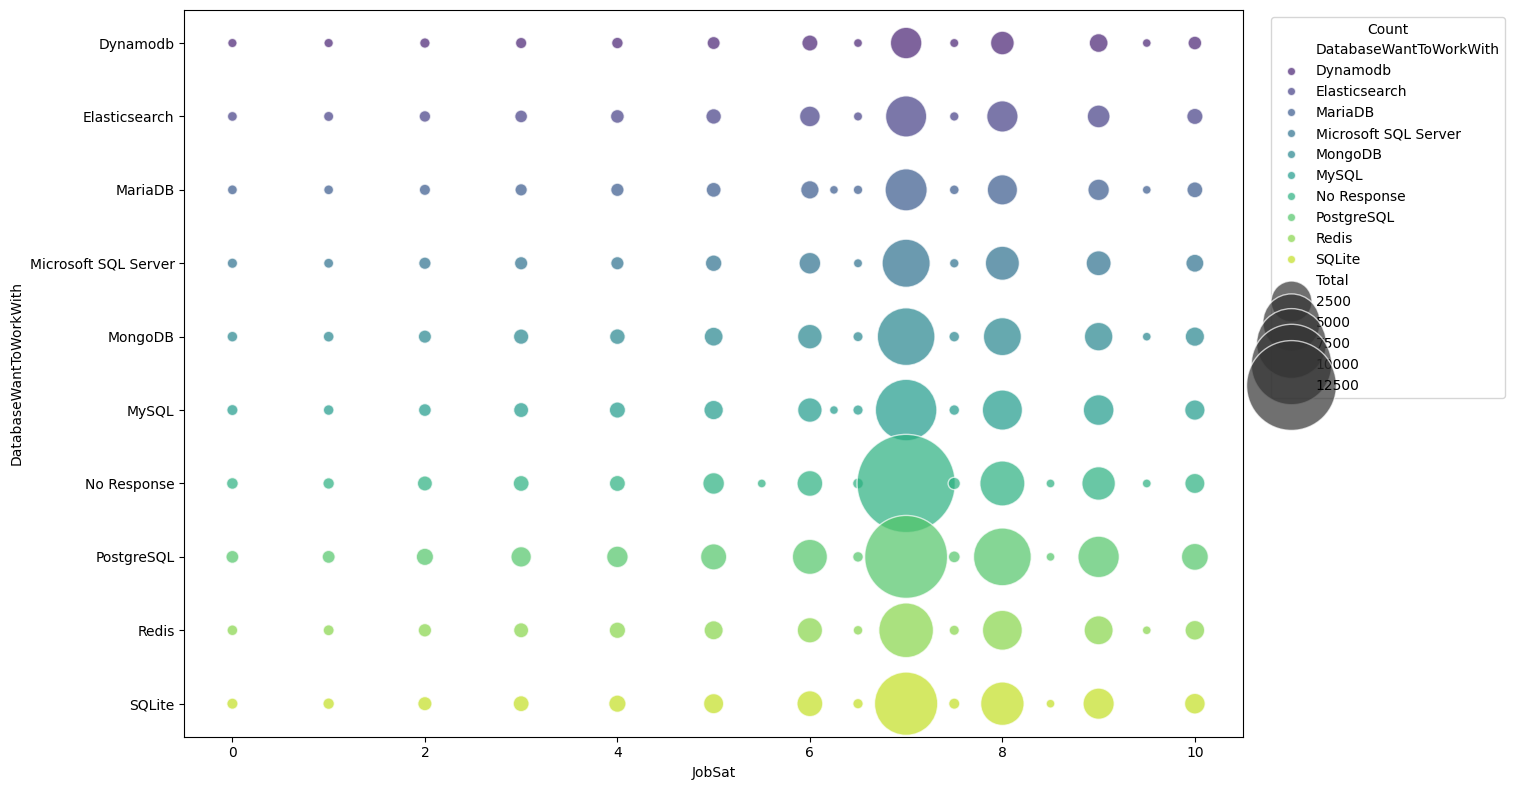

In [112]:
plt.figure(figsize=(16,8))
sns.scatterplot(
    data=count2,
    x='JobSat',
    y='DatabaseWantToWorkWith',
    size='Total',
    sizes=(40,5000),
    hue='DatabaseWantToWorkWith',
    palette='viridis',
    linewidth=1,
    alpha=0.7, 
    edgecolor='white'
)
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    title='Count'
)

plt.tight_layout()
plt.subplots_adjust(right=0.78)   # or 0.75 / 0.72

plt.show()

In [113]:
topdev=df_no_outliers.groupby('DevType').size().nlargest(10)
print(topdev)
df_topdev=df_no_outliers[df_no_outliers['DevType'].isin(topdev.index)]

DevType
Developer, full-stack                            18257
Developer, back-end                               9926
Student                                           5101
Developer, front-end                              3349
Developer, desktop or enterprise applications     2492
Other (please specify):                           2457
Developer, mobile                                 2021
Developer, embedded applications or devices       1623
Engineering manager                               1275
Academic researcher                               1238
dtype: int64


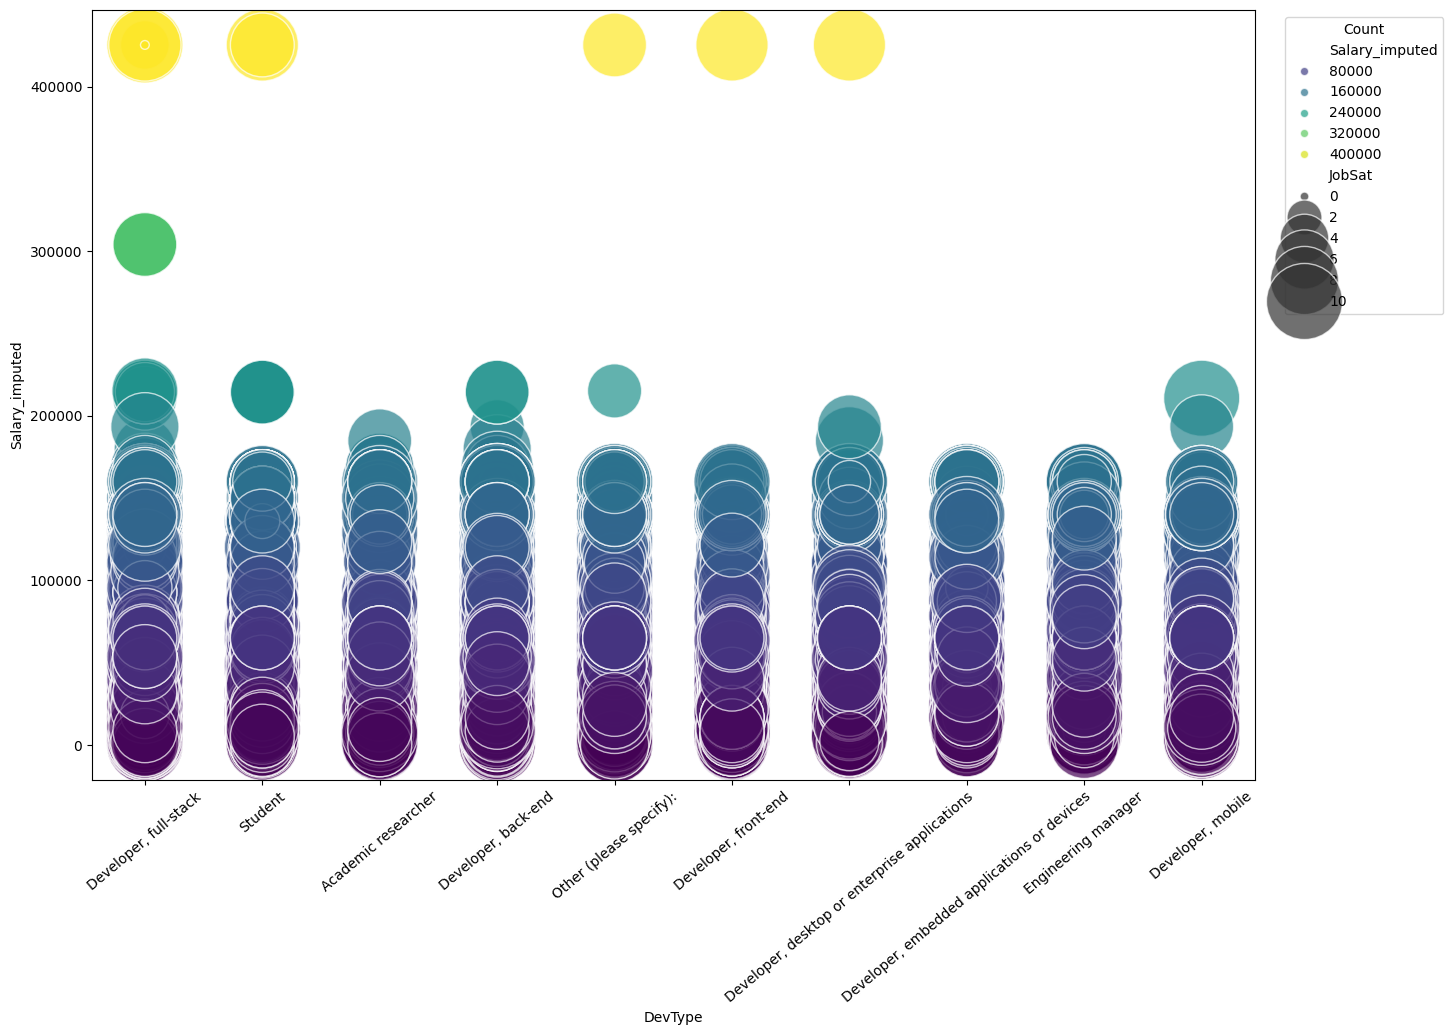

In [114]:
plt.figure(figsize=(15,10))
sns.scatterplot(
    data=df_topdev,
    x='DevType',
    y='Salary_imputed',
    size='JobSat',
    palette='viridis',
    sizes=(40,3000),
    hue='Salary_imputed',
    linewidth=1,
    alpha=0.7, 
    edgecolor='white'
)
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    title='Count'
)
plt.xticks(rotation=40)
plt.show()

In [115]:
df_no_outliers['NEWCollabToolsHaveWorkedWith'].fillna('No response', inplace=True)
df_no_outliers['NEWCollabToolsHaveWorkedWith'] = df_no_outliers['NEWCollabToolsHaveWorkedWith'].str.split(';')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\678761856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_no_outliers['NEWCollabToolsHaveWorkedWith'].fillna('No response', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\678761856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['NEWColla

In [116]:
df_newtools=df_no_outliers.explode('NEWCollabToolsHaveWorkedWith')
df_newtools['NEWCollabToolsHaveWorkedWith'] = df_newtools['NEWCollabToolsHaveWorkedWith'].str.strip()
df_newtools['NEWCollabToolsHaveWorkedWith'].nunique()

36

In [117]:
tools_count=df_newtools.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Count')
top_tools=tools_count.groupby('NEWCollabToolsHaveWorkedWith')['Count'].sum().nlargest(10)
tools_count=tools_count[tools_count['NEWCollabToolsHaveWorkedWith'].isin(top_tools.index)]
tools_count

Age NEWCollabToolsHaveWorkedWith  Count
0       18-24               Android Studio   2662
12      18-24                IntelliJ IDEA   3931
13      18-24  Jupyter Notebook/JupyterLab   2121
16      18-24                       Neovim   2288
18      18-24                  No response   2250
..        ...                          ...    ...
270  Under 18                    Notepad++    412
272  Under 18                      PyCharm    473
282  Under 18                          Vim    438
283  Under 18                Visual Studio    780
284  Under 18           Visual Studio Code   1808

[80 rows x 3 columns]

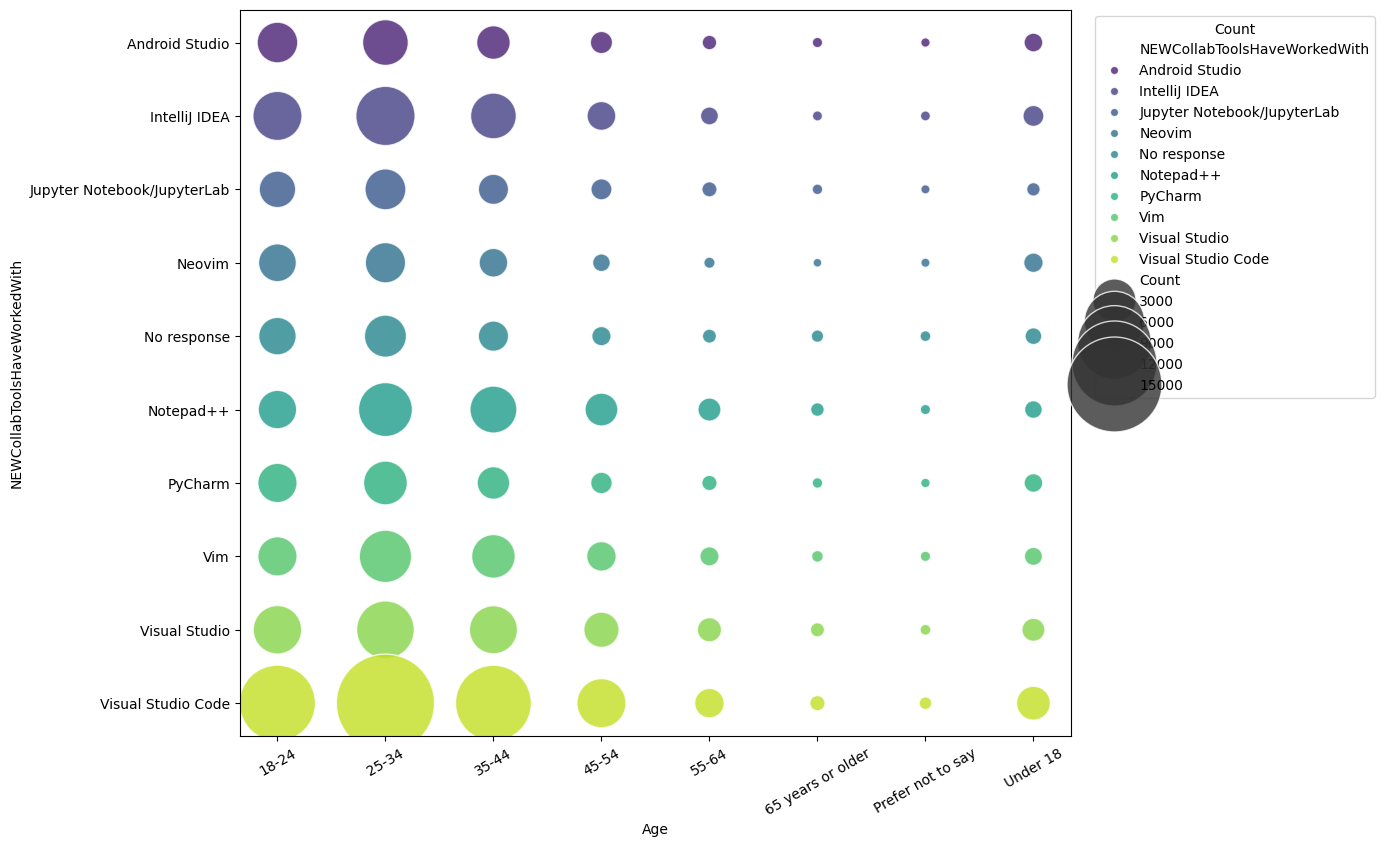

In [118]:
plt.figure(figsize=(14,8))
sns.scatterplot(
    data=tools_count,
    x='Age',
    y='NEWCollabToolsHaveWorkedWith',
    size='Count',
    sizes=(40,5000),
    palette='viridis',
    linewidth=1,
    alpha=0.8,
    hue='NEWCollabToolsHaveWorkedWith'
)
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    title='Count'
)
plt.tight_layout()
plt.xticks(rotation=30)
plt.show()

In [119]:
df_no_outliers['WebframeWantToWorkWith'].fillna('No response')

0                                 No response
1            Express;Htmx;Node.js;React;Remix
2                                ASP.NET CORE
3                jQuery;Next.js;Node.js;React
4                                 No response
                         ...                 
65432                             No response
65433                             No response
65434                             No response
65435                             No response
65436    Django;Express;Next.js;Node.js;React
Name: WebframeWantToWorkWith, Length: 65422, dtype: object

In [120]:
df_no_outliers['WebframeWantToWorkWith']=df_no_outliers['WebframeWantToWorkWith'].str.split(';')
webframe_want=df_no_outliers.explode('WebframeWantToWorkWith')
webframe_want['WebframeWantToWorkWith']=webframe_want['WebframeWantToWorkWith'].str.strip()
webframe_want


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3235674625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['WebframeWantToWorkWith']=df_no_outliers['WebframeWantToWorkWith'].str.split(';')


ResponseId     MainBranch       Age    Employment  \
0               1      Developer  Under 18  Employed, FT   
1               2      Developer     35-44  Employed, FT   
1               2      Developer     35-44  Employed, FT   
1               2      Developer     35-44  Employed, FT   
1               2      Developer     35-44  Employed, FT   
...           ...            ...       ...           ...   
65436       65437  Code as hobby     18-24   Student, FT   
65436       65437  Code as hobby     18-24   Student, FT   
65436       65437  Code as hobby     18-24   Student, FT   
65436       65437  Code as hobby     18-24   Student, FT   
65436       65437  Code as hobby     18-24   Student, FT   

                                 RemoteWork   Check  \
0                                    Remote  Apples   
1                                    Remote  Apples   
1                                    Remote  Apples   
1                                    Remote  Apples   
1                                    Remote  Apples   
...                                     ...     ...   
65436  Hybrid (some remote, some in-person)  Apples   
65436  Hybrid (some remote, some in-person)  Apples   
65436  Hybrid (some remote, some in-person)  Apples   
65436  Hybrid (some remote, some in-person)  Apples   
65436  Hybrid (some remote, some in-person)  Apples   

                                        CodingActivities       EdLevel  \
0                                                  Hobby  Lower School   
1      Hobby;Contribute to open-source projects;Other...    Bachelor’s   
1      Hobby;Contribute to open-source projects;Other...    Bachelor’s   
1      Hobby;Contribute to open-source projects;Other...    Bachelor’s   
1      Hobby;Contribute to open-source projects;Other...    Bachelor’s   
...                                                  ...           ...   
65436  Hobby;Contribute to open-source projects;Profe...    Bachelor’s   
65436  Hobby;Contribute to open-source projects;Profe...    Bachelor’s   
65436  Hobby;Contribute to open-source projects;Profe...    Bachelor’s   
65436  Hobby;Contribute to open-source projects;Profe...    Bachelor’s   
65436  Hobby;Contribute to open-source projects;Profe...    Bachelor’s   

                                               LearnCode  \
0                                 Books / Physical media   
1      Books / Physical media;Colleague;On the job tr...   
1      Books / Physical media;Colleague;On the job tr...   
1      Books / Physical media;Colleague;On the job tr...   
1      Books / Physical media;Colleague;On the job tr...   
...                                                  ...   
65436                                                NaN   
65436                                                NaN   
65436                                                NaN   
65436                                                NaN   
65436                                                NaN   

                                         LearnCodeOnline  ...  \
0                                                    NaN  ...   
1      Technical documentation;Blogs;Books;Written Tu...  ...   
1      Technical documentation;Blogs;Books;Written Tu...  ...   
1      Technical documentation;Blogs;Books;Written Tu...  ...   
1      Technical documentation;Blogs;Books;Written Tu...  ...   
...                                                  ...  ...   
65436                                                NaN  ...   
65436                                                NaN  ...   
65436                                                NaN  ...   
65436                                                NaN  ...   
65436                                                NaN  ...   

      Salary_imputed_Zscore ExperienceLevel  Median_jobsat  \
0                  0.742488      5-10 years            7.0   
1                  0.169313     10-20 years            7.0   
1                  0.169313     10-20 years     

In [121]:
count3=webframe_want.groupby(['JobSat', 'WebframeWantToWorkWith']).size().reset_index(name='Count')
top_webframe=count3.groupby('WebframeWantToWorkWith')['Count'].sum().nlargest(10).index
count3=count3[count3['WebframeWantToWorkWith'].isin(top_webframe)]
count3

JobSat WebframeWantToWorkWith  Count
1       0.0           ASP.NET CORE     39
2       0.0                Angular     25
8       0.0                 Django     40
11      0.0                Express     39
19      0.0                Next.js     51
..      ...                    ...    ...
471    10.0                Node.js    647
475    10.0                  React    649
479    10.0            Spring Boot    195
481    10.0                 Svelte    184
483    10.0                 Vue.js    304

[138 rows x 3 columns]

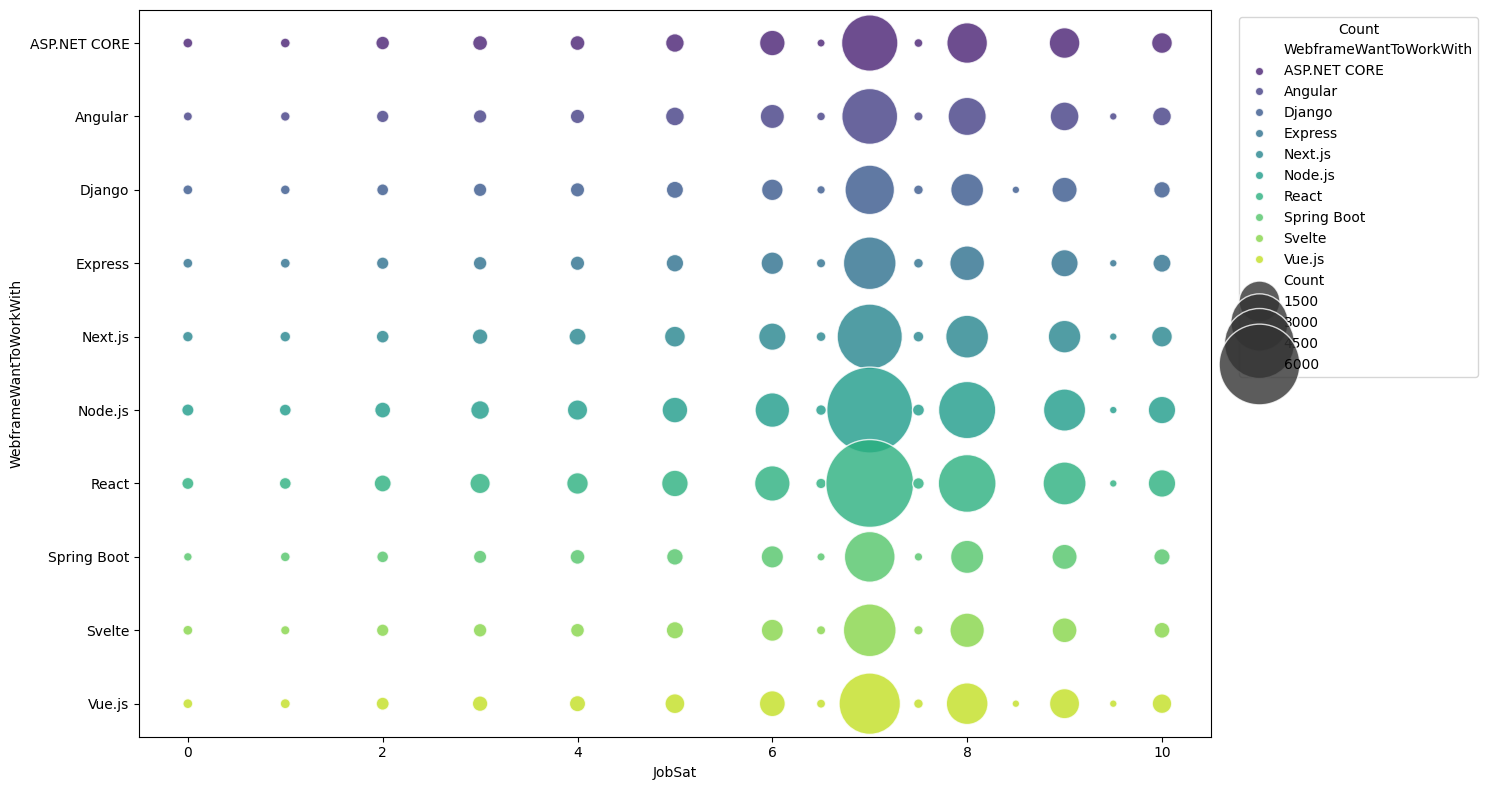

In [122]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data=count3,
    x='JobSat',
    y='WebframeWantToWorkWith',
    size='Count',
    palette='viridis',
    hue='WebframeWantToWorkWith',
    sizes=(30,4000),
    linewidth=1,
    alpha=0.8
)
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    title='Count'
)
plt.tight_layout()
plt.show()

In [123]:
df_no_outliers['LanguageAdmired'].fillna('No response', inplace=True)
df_no_outliers['LanguageAdmired']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3333076741.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_no_outliers['LanguageAdmired'].fillna('No response', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3333076741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['LanguageAdmired'].f

0                                              No response
1        Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...
2                                                       C#
3        HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...
4                       C++;HTML/CSS;JavaScript;Lua;Python
                               ...                        
65432                                          No response
65433                                          No response
65434                                          No response
65435                                             Rust;SQL
65436                         JavaScript;Python;TypeScript
Name: LanguageAdmired, Length: 65422, dtype: object

In [124]:
df_no_outliers['LanguageAdmired']=df_no_outliers['LanguageAdmired'].str.split(';')
lang_admired=df_no_outliers.explode('LanguageAdmired')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1726371222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['LanguageAdmired']=df_no_outliers['LanguageAdmired'].str.split(';')


In [125]:
top_regions = df['Country'].value_counts().nlargest(5).index
language_counts_top = language_counts[language_counts['Country'].isin(top_regions)]

# For each region, get top 5 languages
top_languages_by_region = language_counts_top.groupby('Country').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3062722505.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_languages_by_region = language_counts_top.groupby('Country').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)


In [126]:
count4=lang_admired.groupby(['Country', 'LanguageAdmired']).size().reset_index(name='Count')
topcountries_langadmired=df['Country'].value_counts().nlargest(6).index
count4=count4[(count4['Country'] != 'Unknown') & (count4['Country'].isin(topcountries_langadmired))]
count4
toplang_admired=count4.groupby('LanguageAdmired')['Count'].sum().nlargest(8).index
toplang_admired
df_final=count4[count4['LanguageAdmired'].isin(toplang_admired)]

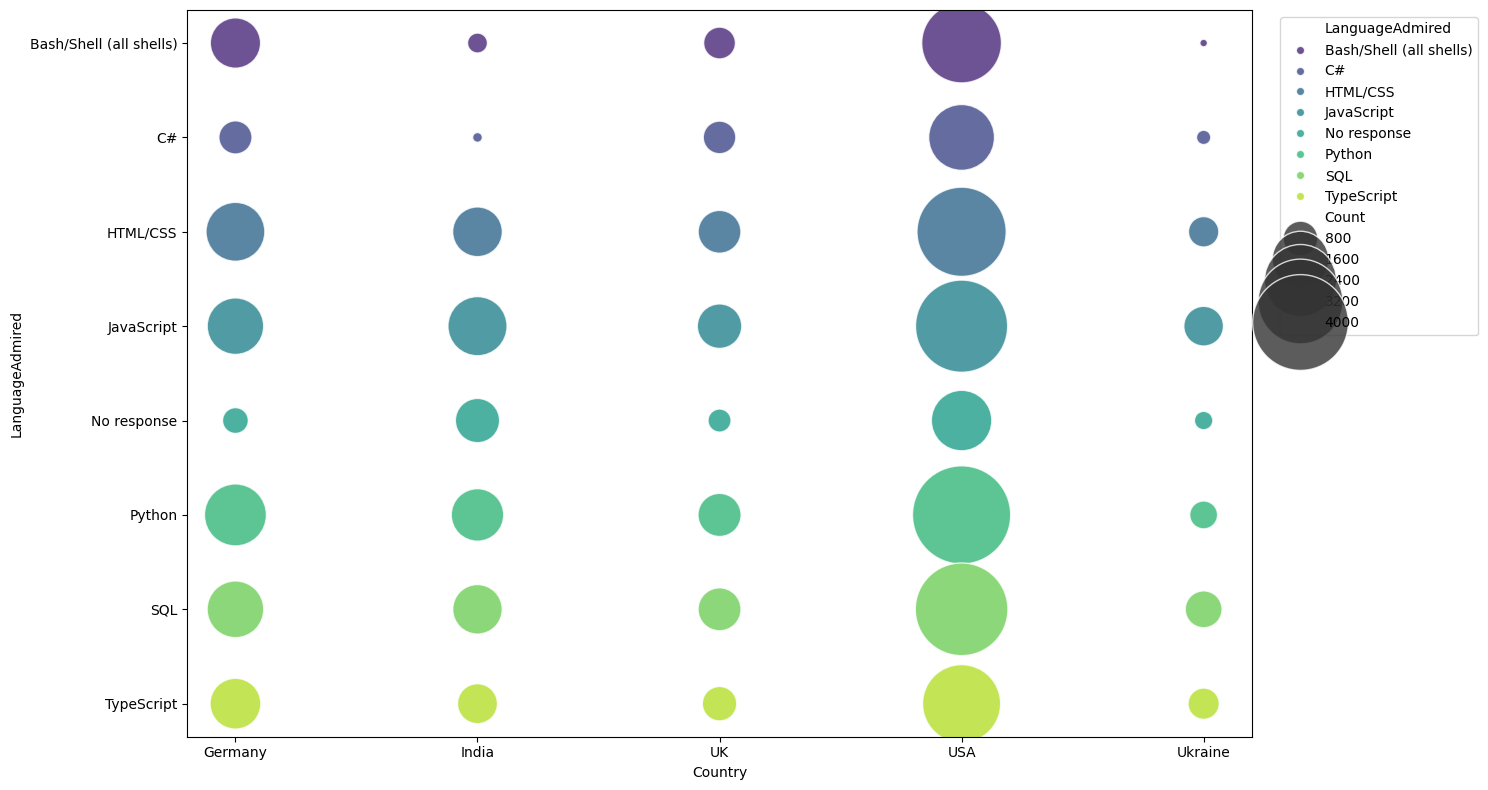

In [127]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    data=df_final,
    x='Country',
    y='LanguageAdmired',
    size='Count',
    sizes=(30,5000),
    palette='viridis',
    hue='LanguageAdmired',
    linewidth=1,
    alpha=0.8
)
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1.02, 1)
)
plt.tight_layout()
plt.show()

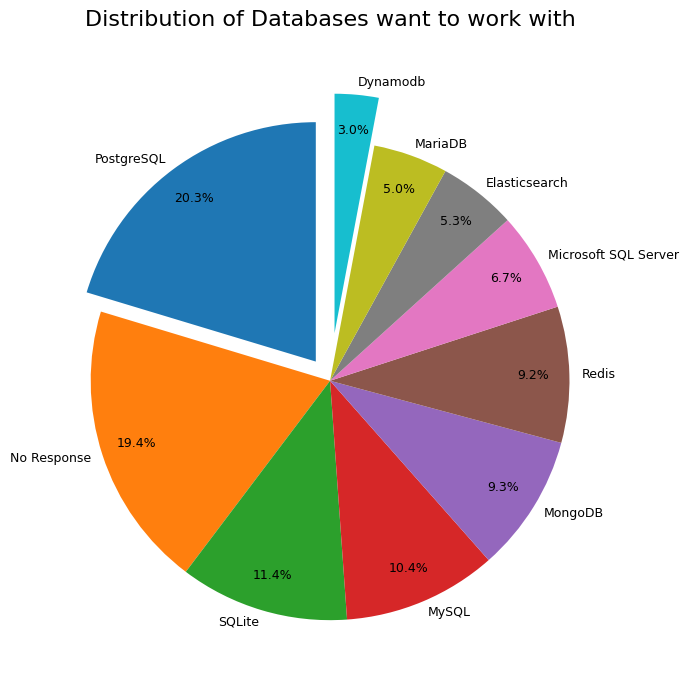

In [128]:
db_pie=top_db.reset_index(name='Total')
plt.figure(figsize=(10,7))
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0.2]
plt.pie(data=db_pie, x='Total', labels='DatabaseWantToWorkWith', autopct='%1.1f%%', startangle=90, textprops={'fontsize': 9},
                                   pctdistance=0.85, labeldistance=1.05, explode=explode)
plt.title('Distribution of Databases want to work with', fontsize=16, pad=40)
plt.tight_layout()
plt.show()

In [177]:
top5dev=topdev.head(5)

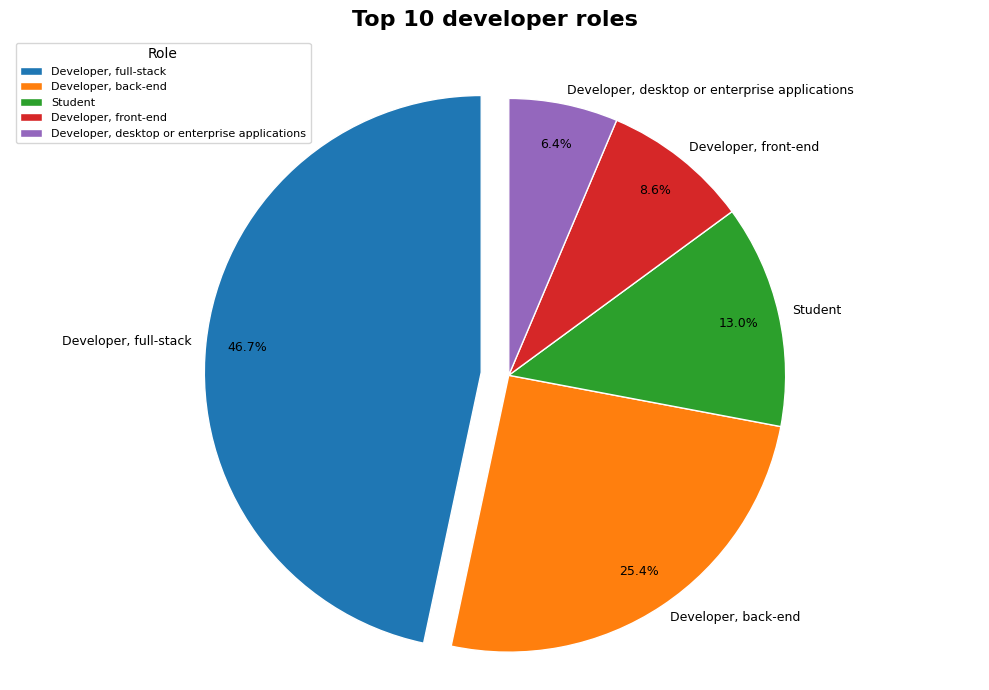

In [180]:
df_topd=top5dev.reset_index(name='Total')
plt.figure(figsize=(10,7))
explode = [0.1, 0, 0, 0, 0]
plt.pie(
    data=df_topd,
    x='Total',
    labels='DevType',
    autopct='%1.1f%%',
    pctdistance=0.85,
    explode=explode, 
    startangle=90,
    labeldistance=1.05, 
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={"fontsize": 9},
    )
plt.legend(
    title="Role",
    loc="upper left",
    bbox_to_anchor=(0, 1.05),
    fontsize=8,
)
plt.title('Top 10 developer roles', fontsize=16, pad=30, fontweight='bold')
plt.tight_layout()
plt.axis('equal')
plt.show()


In [130]:
df_no_outliers.rename(columns={'OpSysProfessional use': 'OpSysProfessionaluse'}, inplace=True)
df_no_outliers['OpSysProfessionaluse'].fillna('No response', inplace=True)
df_no_outliers['OpSysProfessionaluse']=df_no_outliers['OpSysProfessionaluse'].str.split(';')
df_topopsys=df_no_outliers.explode('OpSysProfessionaluse')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\2994841385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.rename(columns={'OpSysProfessional use': 'OpSysProfessionaluse'}, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\2994841385.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_no_outl

In [131]:
topsys=df_topopsys.groupby('OpSysProfessionaluse').size().nlargest(5).reset_index(name='Total')
topsys['OpSysProfessionaluse'].replace('Other (please specify):', 'Other', inplace=True)
topsys

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1660030274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  topsys['OpSysProfessionaluse'].replace('Other (please specify):', 'Other', inplace=True)


OpSysProfessionaluse  Total
0                            Windows  27912
1                              MacOS  18621
2                             Ubuntu  16233
3                        No response  12461
4  Windows Subsystem for Linux (WSL)   9856

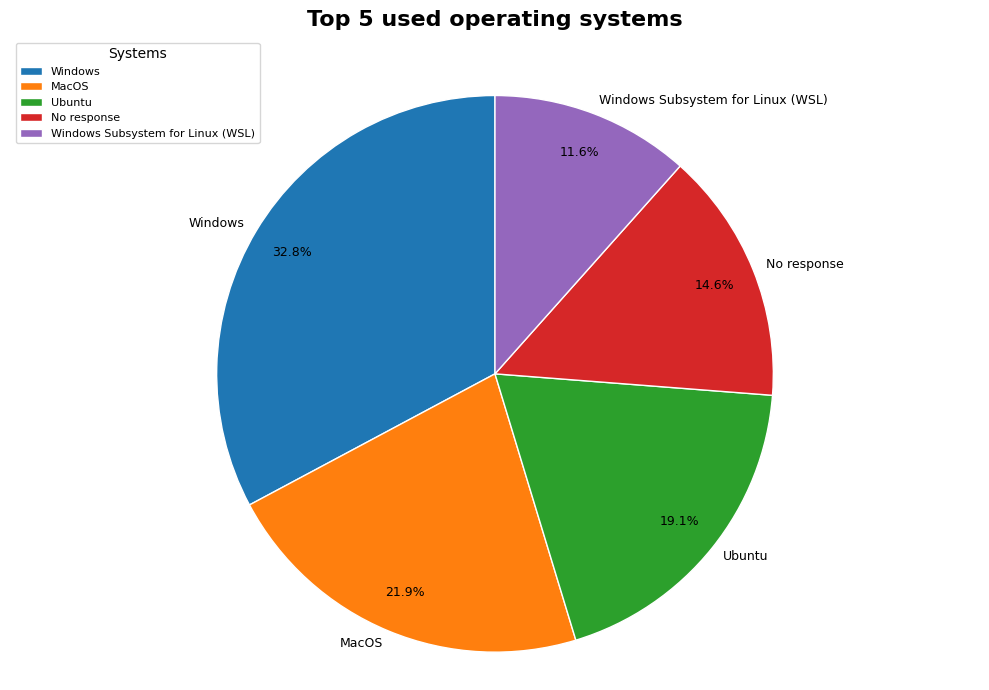

In [132]:
plt.figure(figsize=(10,7))
plt.pie(
    data=topsys,
    x='Total',
    labels='OpSysProfessionaluse',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    labeldistance=1.05, 
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={"fontsize": 9},
    )
plt.legend(
    title="Systems",
    loc="upper left",
    bbox_to_anchor=(0, 1.05),
    fontsize=8,
)
plt.title('Top 5 used operating systems', fontsize=16, pad=30, fontweight='bold')
plt.tight_layout()
plt.axis('equal')
plt.show()

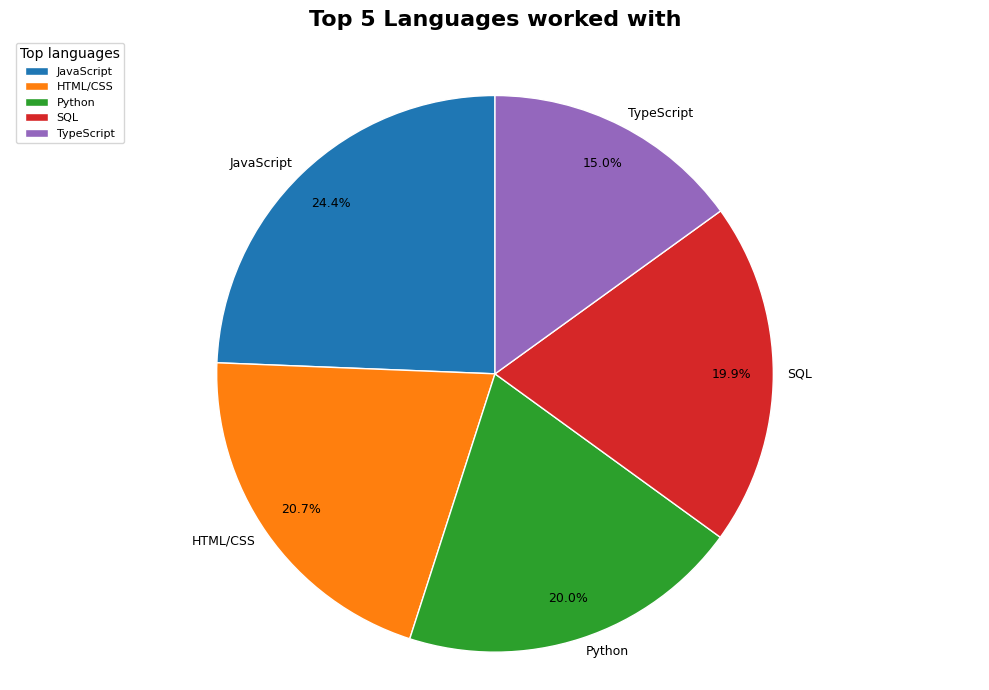

In [133]:
top_lang=have_worked.groupby('HaveWorkedWith_list').size().nlargest(5).reset_index(name='Count')

plt.figure(figsize=(10,7))
plt.pie(
    data=top_lang,
    x='Count',
    labels='HaveWorkedWith_list',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    labeldistance=1.05, 
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={"fontsize": 9},
    )
plt.legend(
    title="Top languages",
    loc="upper left",
    bbox_to_anchor=(0, 1.05),
    fontsize=8,
)
plt.title('Top 5 Languages worked with', fontsize=16, pad=30, fontweight='bold')
plt.tight_layout()
plt.axis('equal')
plt.show()


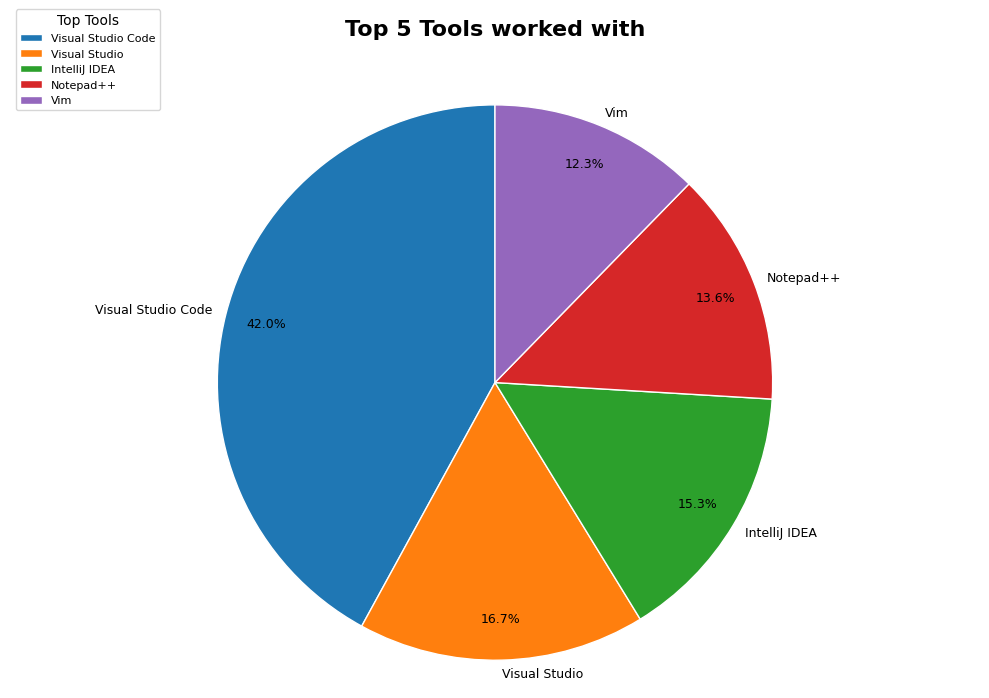

In [134]:
tools_top=df_newtools.groupby('NEWCollabToolsHaveWorkedWith').size().nlargest(5).reset_index(name='Count')

plt.figure(figsize=(10,7))
plt.pie(
    data=tools_top,
    x='Count',
    labels='NEWCollabToolsHaveWorkedWith',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    labeldistance=1.05, 
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={"fontsize": 9},
    )
plt.legend(
    title="Top Tools",
    loc="upper left",
    bbox_to_anchor=(0, 1.12),
    fontsize=8,
)
plt.title('Top 5 Tools worked with', fontsize=16, pad=30, fontweight='bold')
plt.tight_layout()
plt.axis('equal')
plt.show()



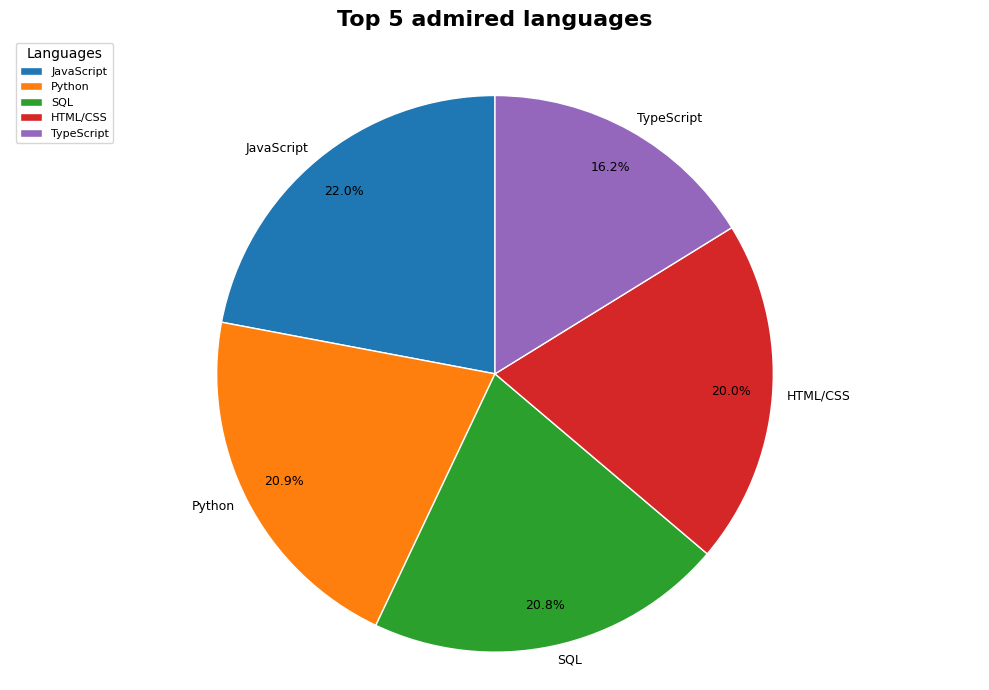

In [135]:
top_admiredlangs=lang_admired.groupby('LanguageAdmired').size().nlargest(5).reset_index(name='Count')

plt.figure(figsize=(10,7))
plt.pie(
    data=top_admiredlangs,
    x='Count',
    labels='LanguageAdmired',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    labeldistance=1.05, 
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={"fontsize": 9},
    )
plt.legend(
    title="Languages",
    loc="upper left",
    bbox_to_anchor=(0, 1.05),
    fontsize=8,
)
plt.title('Top 5 admired languages', fontsize=16, pad=30, fontweight='bold')
plt.tight_layout()
plt.axis('equal')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\972356250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['AISearchDevHaveWorkedWith']=df_no_outliers['AISearchDevHaveWorkedWith'].str.split(';')


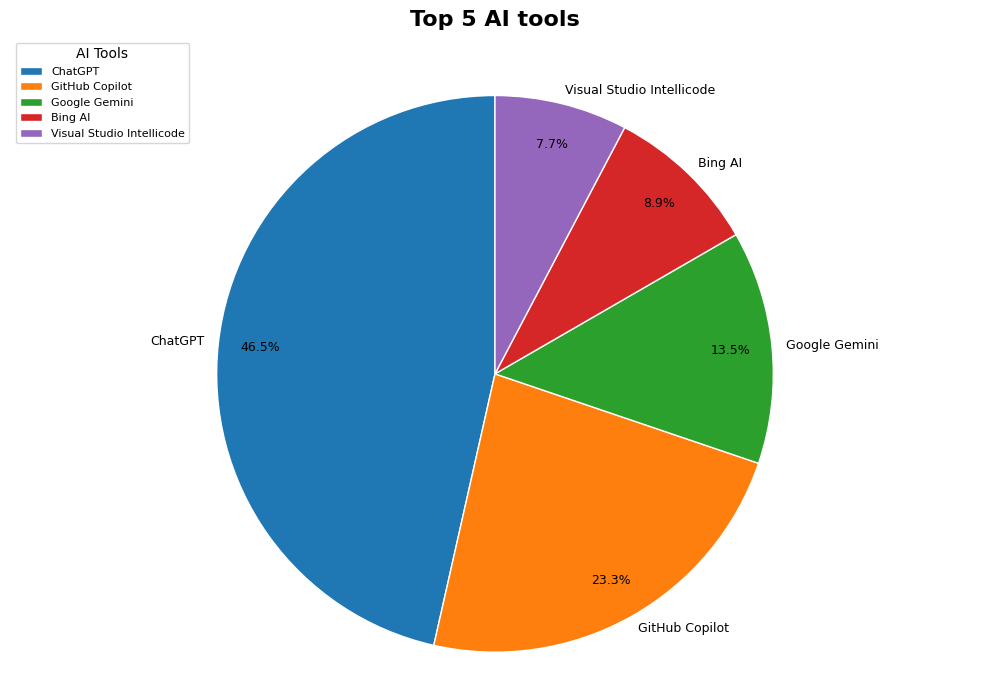

In [136]:
df_no_outliers['AISearchDevHaveWorkedWith']=df_no_outliers['AISearchDevHaveWorkedWith'].str.split(';')
df_aitools=df_no_outliers.explode('AISearchDevHaveWorkedWith')
top_aitools=df_aitools.groupby('AISearchDevHaveWorkedWith').size().nlargest(5).reset_index(name='Count')

plt.figure(figsize=(10,7))
plt.pie(
    data=top_aitools,
    x='Count',
    labels='AISearchDevHaveWorkedWith',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    labeldistance=1.05, 
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={"fontsize": 9},
    )
plt.legend(
    title="AI Tools",
    loc="upper left",
    bbox_to_anchor=(0, 1.05),
    fontsize=8,
)
plt.title('Top 5 AI tools', fontsize=16, pad=30, fontweight='bold')
plt.tight_layout()
plt.axis('equal')
plt.show()

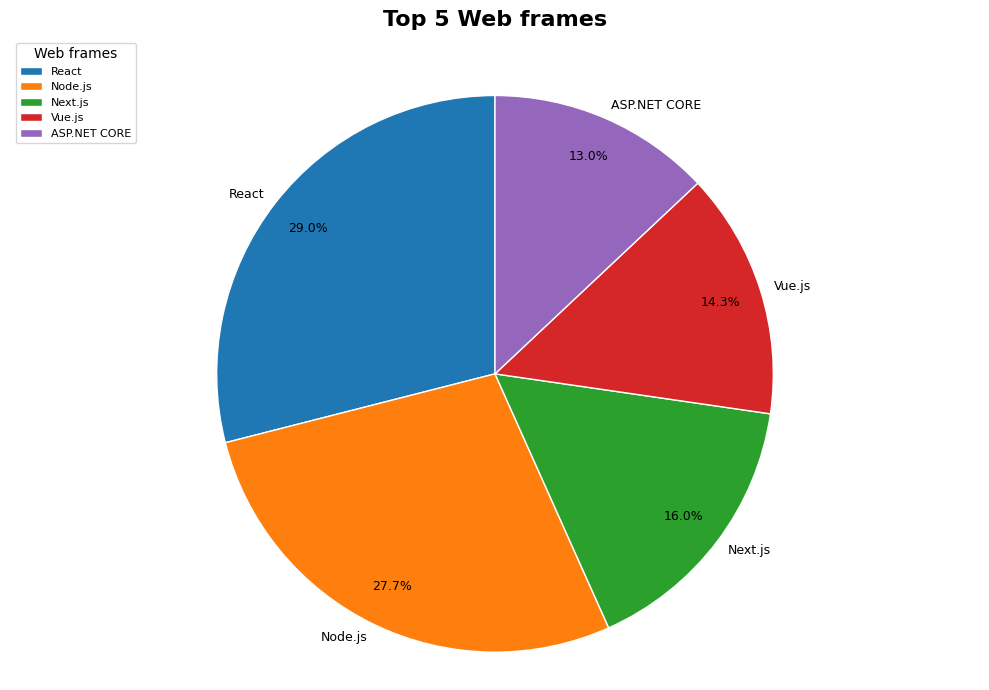

In [137]:
top_frame=webframe_want.groupby('WebframeWantToWorkWith').size().nlargest(5).reset_index(name='Count')

plt.figure(figsize=(10,7))
plt.pie(
    data=top_frame,
    x='Count',
    labels='WebframeWantToWorkWith',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    labeldistance=1.05, 
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={"fontsize": 9},
    )
plt.legend(
    title="Web frames",
    loc="upper left",
    bbox_to_anchor=(0, 1.05),
    fontsize=8,
)
plt.title('Top 5 Web frames', fontsize=16, pad=30, fontweight='bold')
plt.tight_layout()
plt.axis('equal')
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1598544863.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_no_outliers['EmbeddedWantToWorkWith'].fillna('No response', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1598544863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['EmbeddedWant

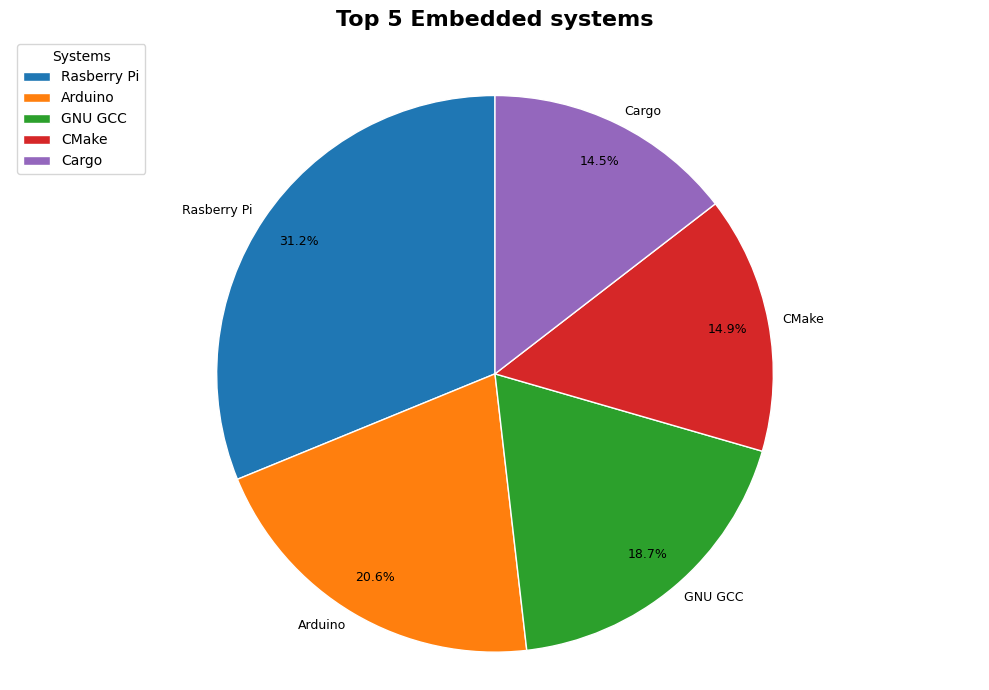

In [138]:
df_no_outliers['EmbeddedWantToWorkWith'].fillna('No response', inplace=True)
df_no_outliers['EmbeddedWantToWorkWith']=df_no_outliers['EmbeddedWantToWorkWith'].str.split(';')
embeddedSystems_want=df_no_outliers.explode('EmbeddedWantToWorkWith')
top_embsys=embeddedSystems_want.groupby('EmbeddedWantToWorkWith').size().nlargest(6).reset_index(name='Count')
top_embsys=top_embsys[top_embsys['EmbeddedWantToWorkWith']!='No response']


plt.figure(figsize=(10,7))
plt.pie(
    data=top_embsys,
    x='Count',
    labels='EmbeddedWantToWorkWith',
    autopct='%1.1f%%',
    pctdistance=0.85,
    startangle=90,
    labeldistance=1.05, 
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    textprops={"fontsize": 9},
    )
plt.legend(
    title="Systems",
    loc="upper left",
    bbox_to_anchor=(0, 1.05),
    fontsize=10,
)
plt.title('Top 5 Embedded systems', fontsize=16, pad=30, fontweight='bold')
plt.tight_layout()
plt.axis('equal')
plt.show()


In [139]:
df_no_outliers.to_csv('cleaned_survey_data.csv', index=False)

In [140]:
age_sat_median=df_no_outliers.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()
age_sat_median

JobSatPoints_6  JobSatPoints_7
Age                                              
18-24                        15.0            20.0
25-34                        20.0            15.0
35-44                        20.0            15.0
45-54                        20.0            15.0
55-64                        20.0            20.0
65 years or older            20.0            15.0
Prefer not to say            10.0             7.0
Under 18                      1.5             5.0

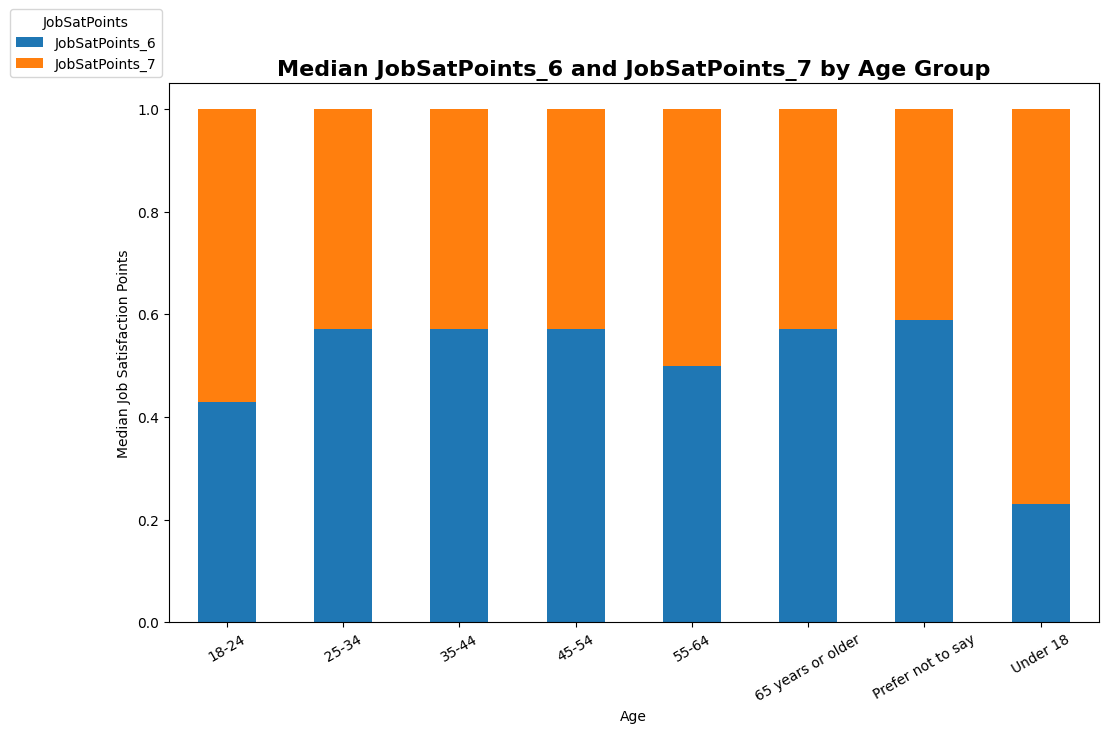

In [141]:
age_sat_median_prop=age_sat_median.div(age_sat_median.sum(axis=1), axis=0)
age_sat_median_prop.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Median JobSatPoints_6 and JobSatPoints_7 by Age Group', fontweight='bold', fontsize=16)
plt.xlabel('Age')
plt.xticks(rotation=30)
plt.ylabel('Median Job Satisfaction Points')
plt.legend(
    title="JobSatPoints",
    loc="upper right",
    bbox_to_anchor=(0, 1.15),
    fontsize=10,
)
plt.show()

In [142]:
emptype=empl.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()
emptype=emptype.drop('I prefer not to say')

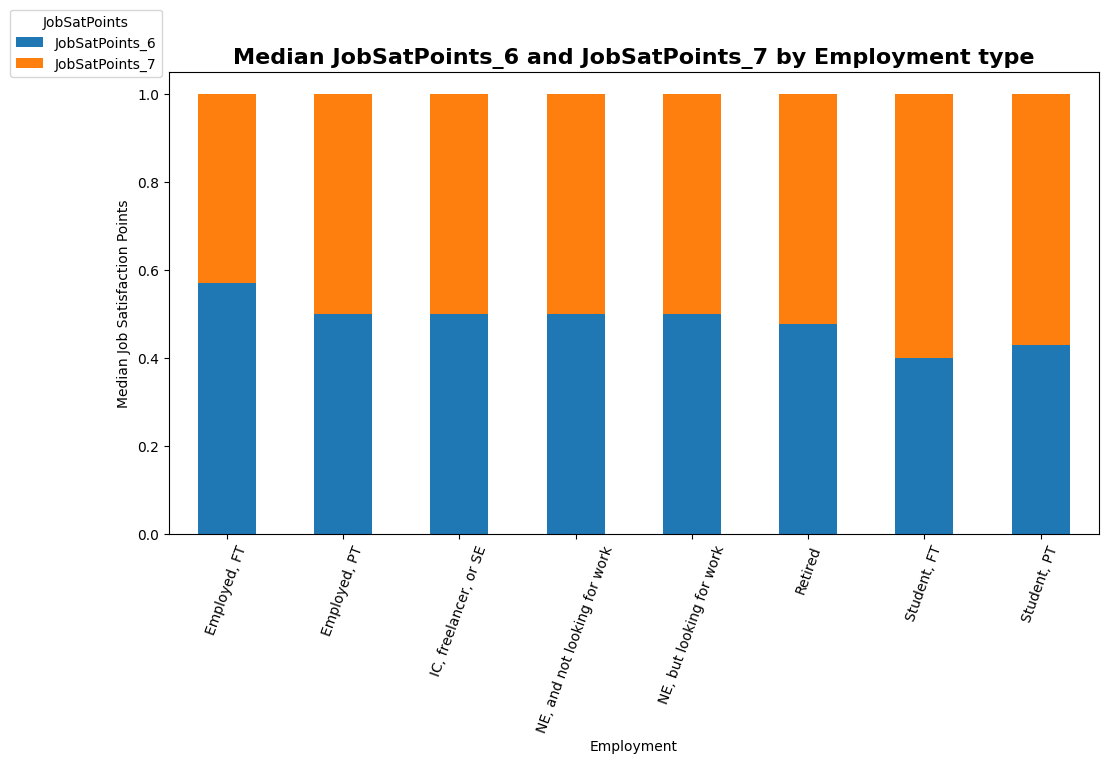

In [143]:
emptype_jobsat_median_prop=emptype.div(emptype.sum(axis=1), axis=0)
emptype_jobsat_median_prop.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Median JobSatPoints_6 and JobSatPoints_7 by Employment type', fontweight='bold', fontsize=16)
plt.xlabel('Employment')
plt.xticks(rotation=70)
plt.ylabel('Median Job Satisfaction Points')
plt.legend(
    title="JobSatPoints",
    loc="upper right",
    bbox_to_anchor=(0, 1.15),
    fontsize=10,
)
plt.show()


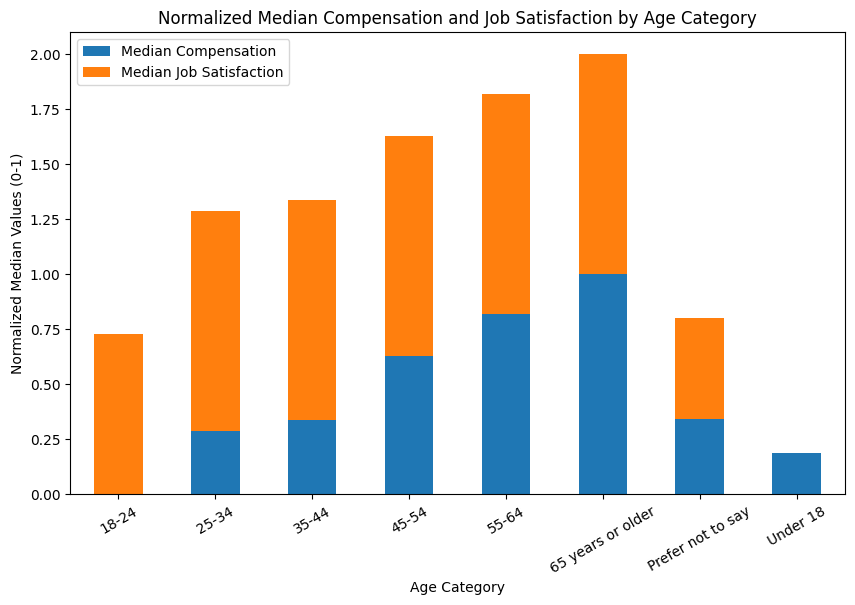

In [144]:
# Group by AgeCategory and calculate median
median_values = df_no_outliers.groupby('Age')[['Salary_imputed', 'JobSatPoints_6']].median()

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
median_values_scaled = pd.DataFrame(scaler.fit_transform(median_values),
                                    columns=median_values.columns,
                                    index=median_values.index)

# Plot stacked bar chart of normalized values
median_values_scaled.plot(kind='bar', stacked=True, figsize=(10,6), color=['#1f77b4', '#ff7f0e'])

plt.title('Normalized Median Compensation and Job Satisfaction by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Normalized Median Values (0-1)')
plt.xticks(rotation=30)
plt.legend(['Median Compensation', 'Median Job Satisfaction'])
plt.show()


In [145]:
age_medsalary=median_values_scaled.iloc[1][0]
age_medjobsat=median_values_scaled.iloc[1][1]
medvalue_30to35=pd.DataFrame({'Salary_Imputed': [age_medsalary],
                             'JobSatPoint_6': [age_medjobsat]}, index=['25-34'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1664986388.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_medsalary=median_values_scaled.iloc[1][0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1664986388.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_medjobsat=median_values_scaled.iloc[1][1]


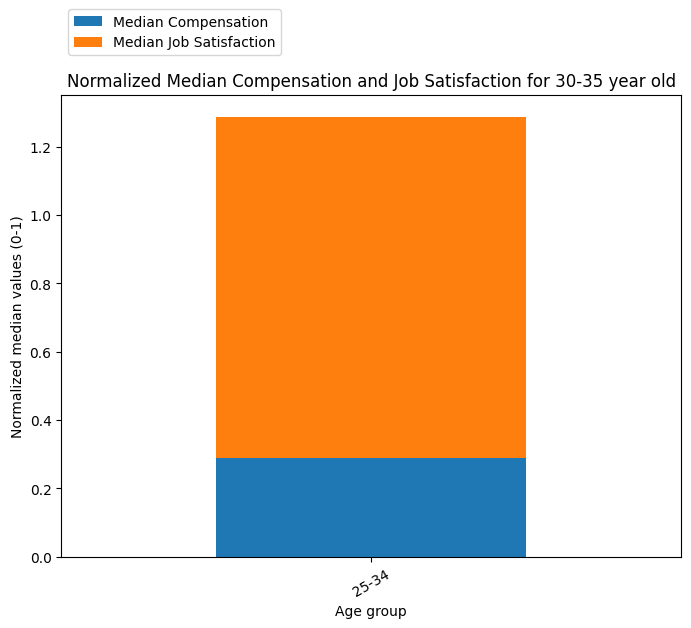

In [146]:
medvalue_30to35.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Age group')
plt.ylabel('Normalized median values (0-1)')
plt.title('Normalized Median Compensation and Job Satisfaction for 30-35 year old')
plt.xticks(rotation=30)
plt.legend(['Median Compensation', 'Median Job Satisfaction'], loc='upper left', bbox_to_anchor=(0, 1.2),
    fontsize=10,)
plt.show()

In [147]:
db_by_age_crosstab=pd.crosstab(db_exploded['Age'], db_exploded['DatabaseWantToWorkWith'])
db_by_age_crosstab_subset=db_by_age_crosstab[['PostgreSQL', 'SQLite', 'MySQL', 'MongoDB', 'Redis']]


In [148]:
db_by_age_crosstab_subset_prob=db_by_age_crosstab_subset.div(db_by_age_crosstab_subset.sum(axis=1), axis=0)

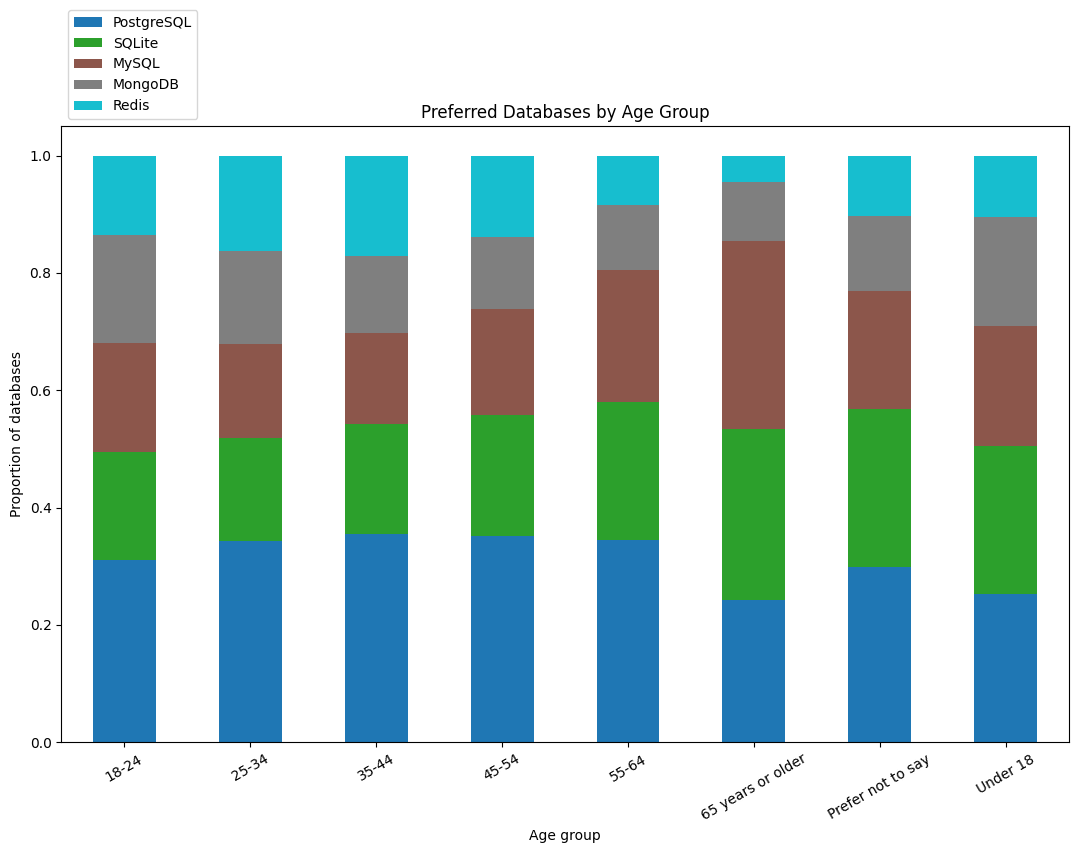

In [149]:
db_by_age_crosstab_subset_prob.plot(kind='bar', stacked=True, figsize=(13,8), colormap='tab10')
plt.xlabel('Age group')
plt.ylabel('Proportion of databases')
plt.title('Preferred Databases by Age Group')
plt.xticks(rotation=30)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2),
    fontsize=10,)
plt.show()


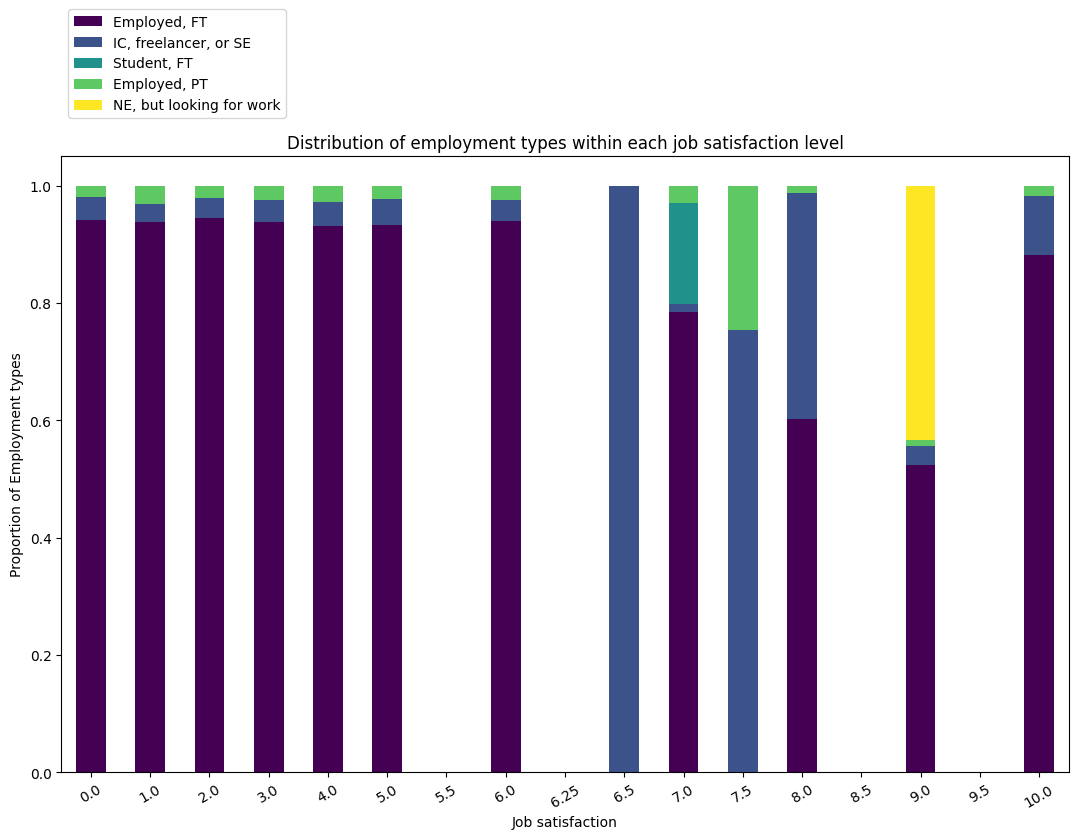

In [150]:
jobsat_emp_crosstab=pd.crosstab(df_no_outliers['JobSat'], df_no_outliers['Employment'])
top5_employment=empl.groupby('Employment').size().nlargest(5)
jobsat_emp_crosstab_subset=jobsat_emp_crosstab[['Employed, FT', 'IC, freelancer, or SE', 'Student, FT', 'Employed, PT', 'NE, but looking for work']]
jobsat_emp_crosstab_subset_prop=jobsat_emp_crosstab_subset.div(jobsat_emp_crosstab_subset.sum(axis=1), axis=0)

jobsat_emp_crosstab_subset_prop.plot(kind='bar', stacked=True, figsize=(13,8), colormap='viridis')
plt.xlabel('Job satisfaction')
plt.ylabel('Proportion of Employment types')
plt.title('Distribution of employment types within each job satisfaction level')
plt.xticks(rotation=30)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.25),
    fontsize=10)
plt.show()

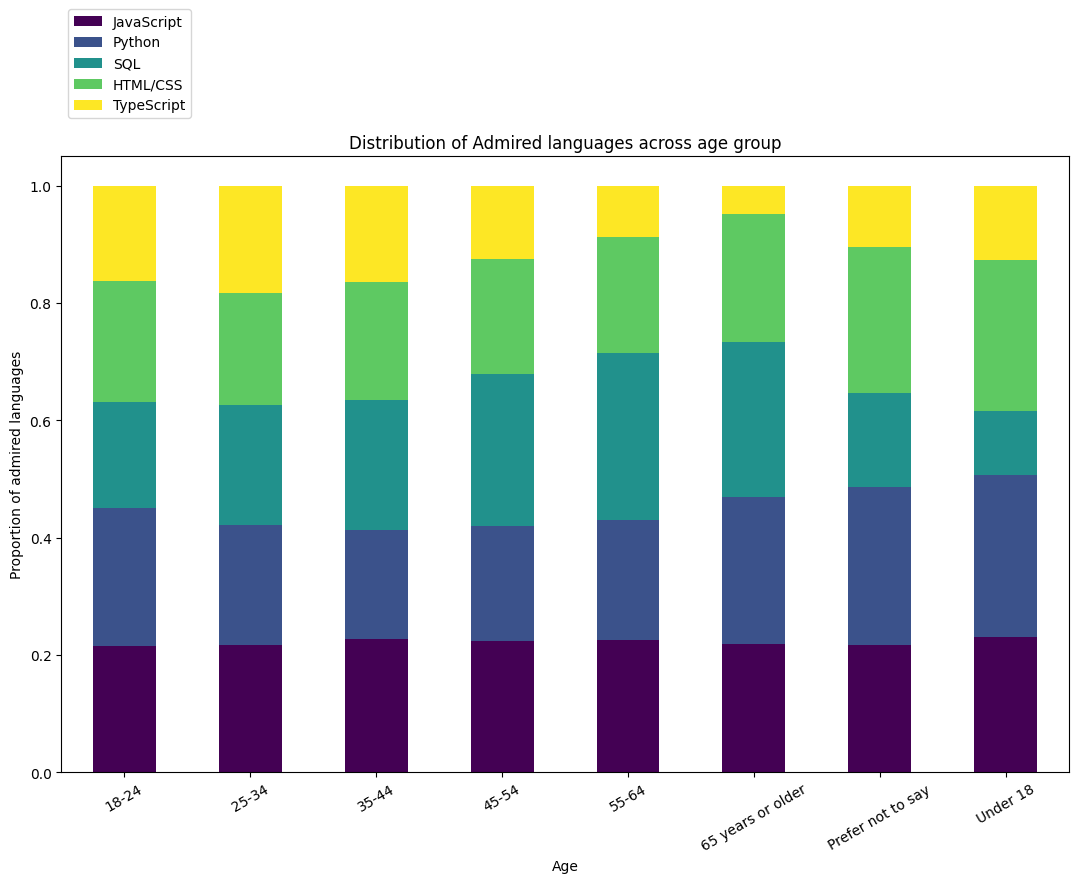

In [151]:
lang_age_crosstab=pd.crosstab(lang_admired['Age'], lang_admired['LanguageAdmired'])
lang_age_crosstab_subset=lang_age_crosstab[['JavaScript', 'Python','SQL', 'HTML/CSS', 'TypeScript']]
lang_age_crosstab_subset_prop=lang_age_crosstab_subset.div(lang_age_crosstab_subset.sum(axis=1), axis=0)

lang_age_crosstab_subset_prop.plot(kind='bar', stacked=True, figsize=(13,8), colormap='viridis')
plt.xlabel('Age')
plt.ylabel('Proportion of admired languages')
plt.title('Distribution of Admired languages across age group')
plt.xticks(rotation=30)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.25),
    fontsize=10)
plt.show()

In [152]:
empl['PlatformAdmired']=empl['PlatformAdmired'].fillna('No response').str.split(';')
platadm_empl_exploded=empl.explode('PlatformAdmired')
platadm_empl_exploded['PlatformAdmired']


0                      No response
1        Amazon Web Services (AWS)
1                           Heroku
1                          Netlify
2                     Google Cloud
                   ...            
65435                  No response
65436                   Cloudflare
65436                 Google Cloud
65436                      Netlify
65436                       Vercel
Name: PlatformAdmired, Length: 111595, dtype: object

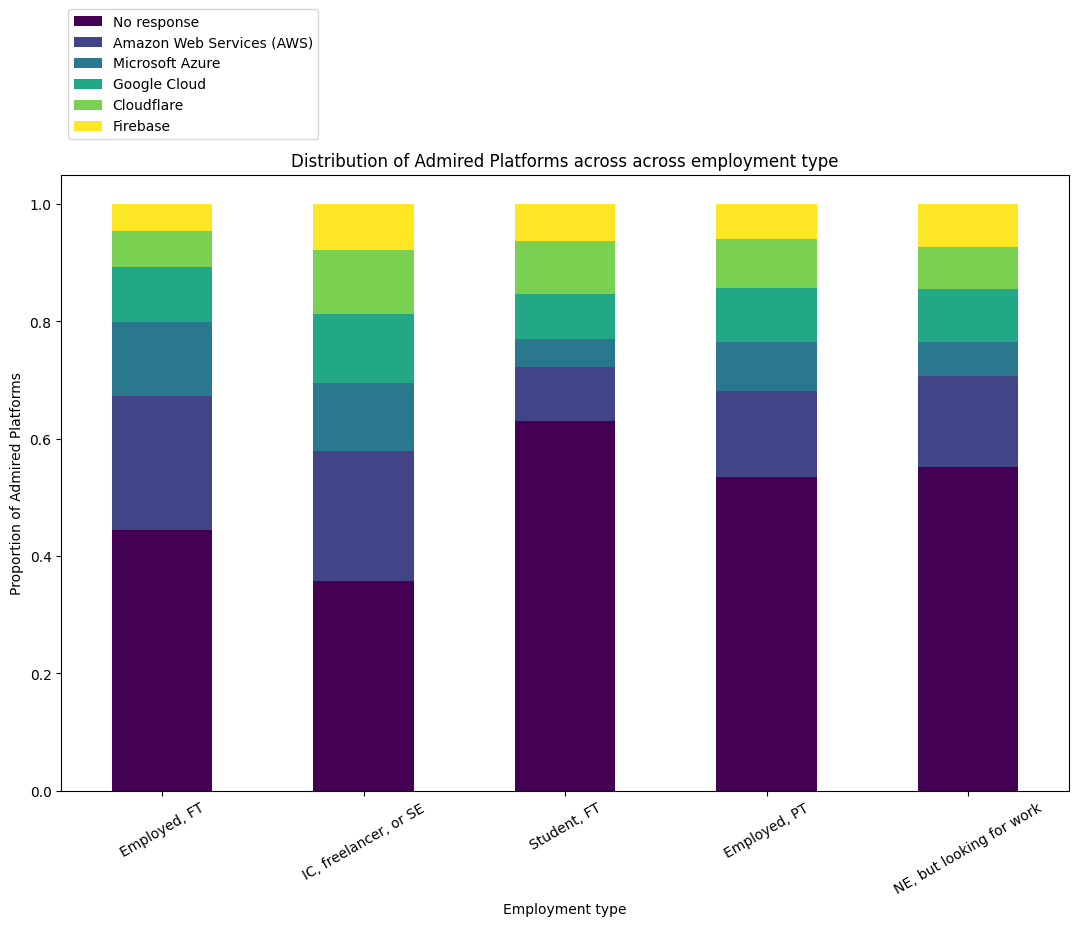

In [153]:
top_platform=platadm_empl_exploded.groupby('PlatformAdmired').size().nlargest(6)
platadm_empl_crosstab=pd.crosstab(platadm_empl_exploded['Employment'], platadm_empl_exploded['PlatformAdmired'])
platadm_empl_crosstab_subset=platadm_empl_crosstab[top_platform.index]
platadm_empl_crosstab_subset=platadm_empl_crosstab_subset.loc[top5_employment.index]
platadm_empl_crosstab_subset_prop=platadm_empl_crosstab_subset.div(platadm_empl_crosstab_subset.sum(axis=1), axis=0)

platadm_empl_crosstab_subset_prop.plot(kind='bar', stacked=True, figsize=(13,8), colormap='viridis')
plt.xlabel('Employment type')
plt.ylabel('Proportion of Admired Platforms')
plt.title('Distribution of Admired Platforms across across employment type')
plt.xticks(rotation=30)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.28),
    fontsize=10)
plt.show()

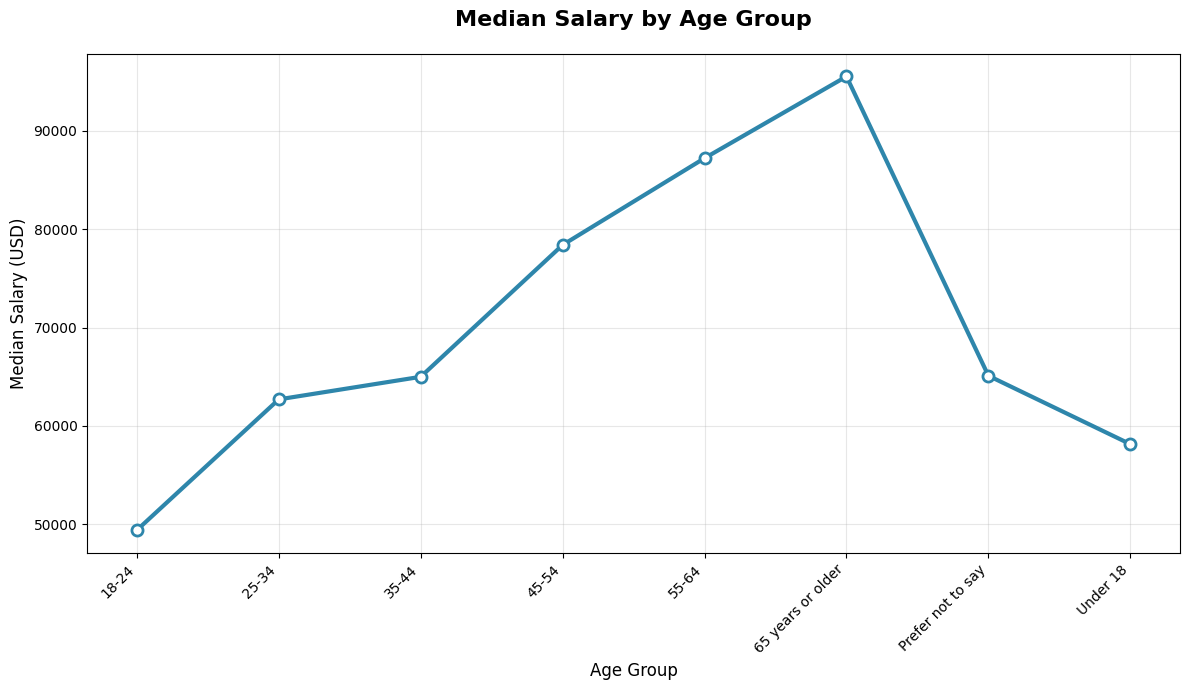

In [154]:
medsalary_by_age=df_no_outliers.groupby('Age')['Salary_imputed'].median()

# Plot with styling
plt.figure(figsize=(12,7))
sns.lineplot(
    data=medsalary_by_age, 
    linewidth=3,           # Thicker line
    marker='o',            # Circle markers
    markersize=8,          # Larger markers
    color='#2E86AB',       # Professional blue
    markerfacecolor='white',  # White marker fill
    markeredgecolor='#2E86AB',
    markeredgewidth=2
)

plt.title('Median Salary by Age Group', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Salary (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Better rotation

# Grid + formatting
plt.grid(True, alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


In [155]:
medsalary_by_age2=medsalary_by_age.loc[['25-34', '35-44']]
medsalary_by_age2

Age
25-34    62706.0
35-44    65000.0
Name: Salary_imputed, dtype: float64

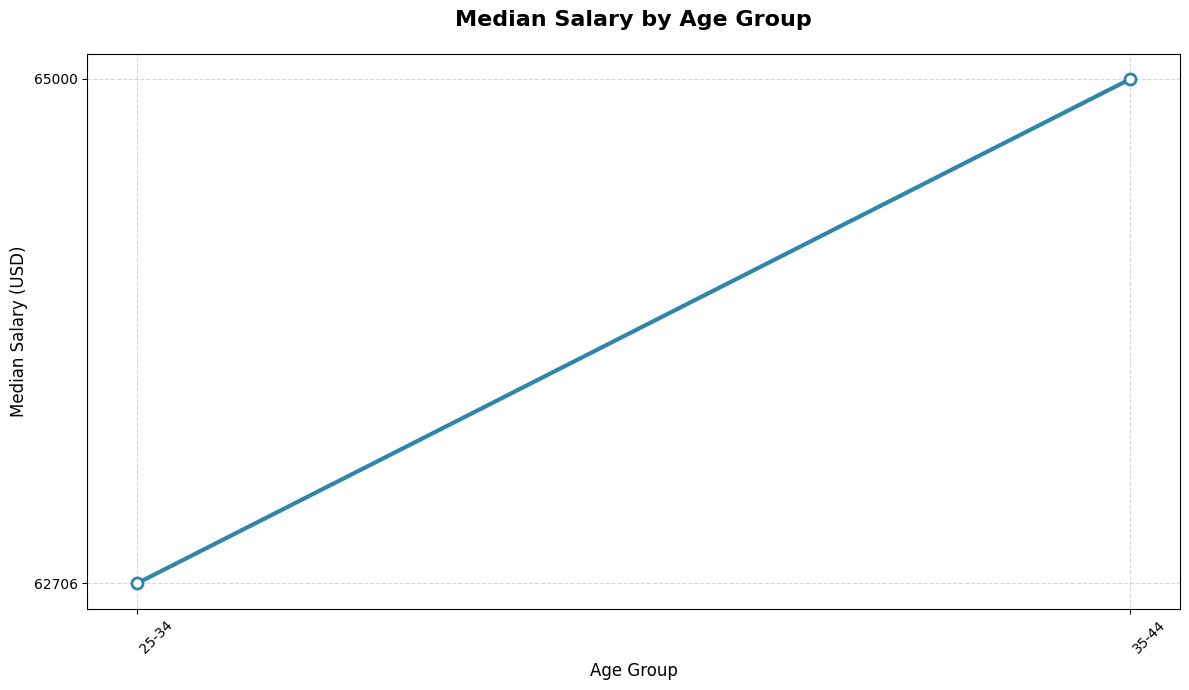

In [156]:
plt.figure(figsize=(12,7))
sns.lineplot(
    data=medsalary_by_age2,                # Key fix: explicit axis
    linewidth=3,
    marker='o',
    markersize=8,
    color='#2E86AB',
    markerfacecolor='white',
    markeredgecolor='#2E86AB',
    markeredgewidth=2
)

plt.title('Median Salary by Age Group', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Salary (USD)', fontsize=12)
plt.yticks(medsalary_by_age2.values)
plt.grid(True, alpha=0.5, linestyle='--')  # Dashed grid
plt.xticks(rotation=45, ha='left')  # Better rotation
plt.tight_layout()
plt.show()


In [157]:
exp_jobsat = df_no_outliers.dropna(subset=['WorkExp', 'JobSatPoints_6'])

In [158]:
exp_medjobsat=exp_jobsat.groupby('WorkExp')['JobSatPoints_6'].median()


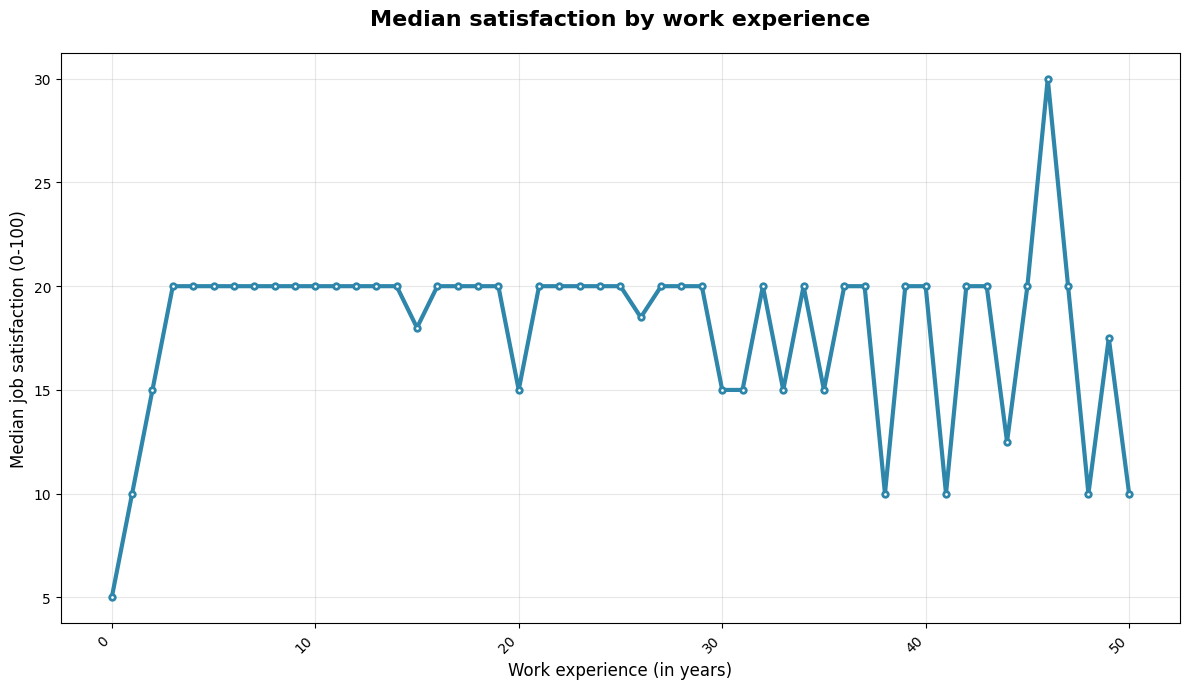

In [159]:
# Plot with styling
plt.figure(figsize=(12,7))
sns.lineplot(
    data=exp_medjobsat, 
    linewidth=3,           # Thicker line
    marker='o',            # Circle markers
    markersize=4,          # Larger markers
    color='#2E86AB',       # Professional blue
    markerfacecolor='white',  # White marker fill
    markeredgecolor='#2E86AB',
    markeredgewidth=2
)

plt.title('Median satisfaction by work experience', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Work experience (in years)', fontsize=12)
plt.ylabel('Median job satisfaction (0-100)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Better rotation

# Grid + formatting
plt.grid(True, alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


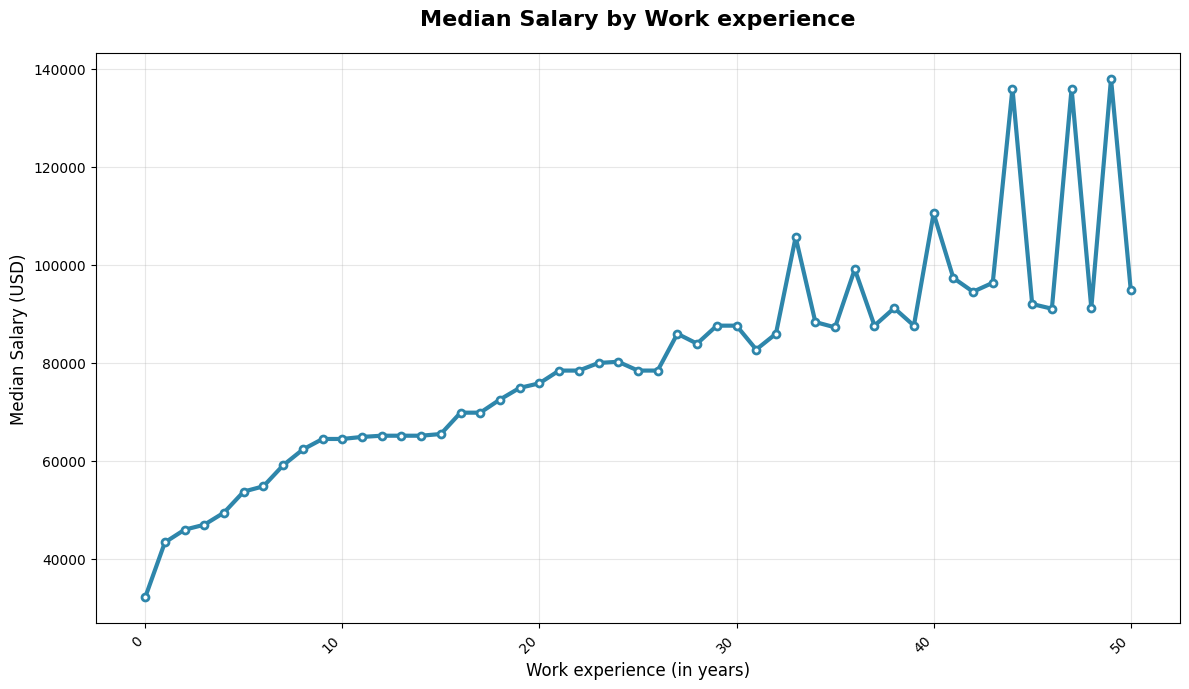

In [160]:
workexp_medsalary=df_no_outliers.groupby('WorkExp')['Salary_imputed'].median()

plt.figure(figsize=(12,7))
sns.lineplot(
    data=workexp_medsalary, 
    linewidth=3,           
    marker='o',           
    markersize=5,          
    color='#2E86AB',      
    markerfacecolor='white',  
    markeredgecolor='#2E86AB',
    markeredgewidth=2
)

plt.title('Median Salary by Work experience', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Work experience (in years)', fontsize=12)
plt.ylabel('Median Salary (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  

# Grid + formatting
plt.grid(True, alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\2440587782.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Age_cat2'] = pd.Categorical(


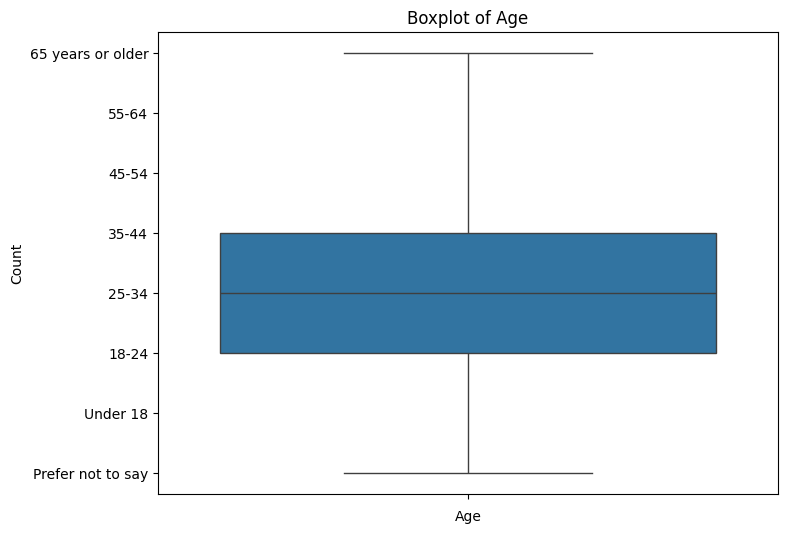

In [161]:
age_order2 = [
    '65 years or older',
    '55-64',
    '45-54',
    '35-44',
    '25-34',
    '18-24',
    'Under 18',
    'Prefer not to say'  
]
df_no_outliers['Age_cat2'] = pd.Categorical(
    df_no_outliers['Age'],
    categories=age_order2,
    ordered=True
)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers['Age_cat2'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

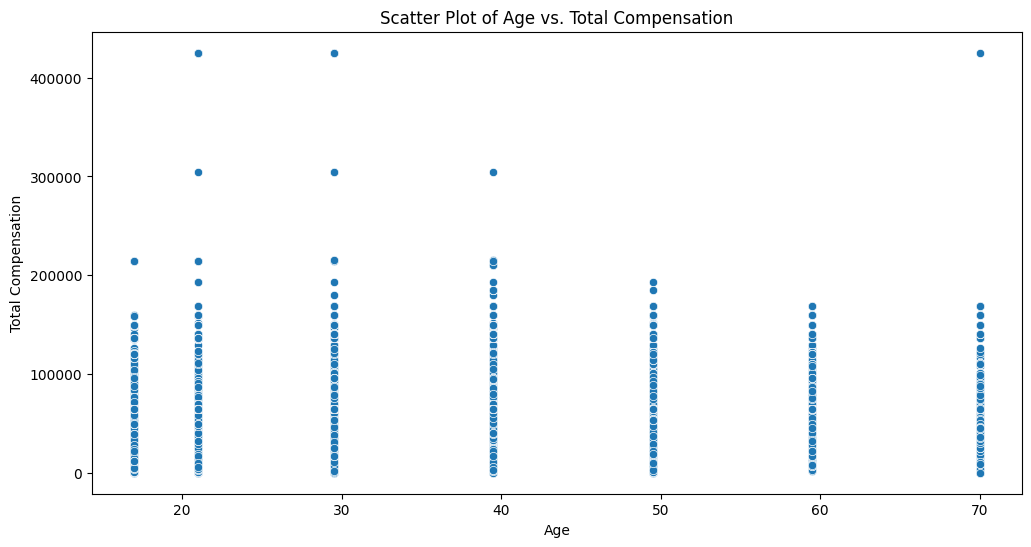

In [162]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age_num', y='Salary_imputed', data=df_no_outliers)

plt.xlabel('Age')
plt.ylabel('Total Compensation')
plt.title('Scatter Plot of Age vs. Total Compensation')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

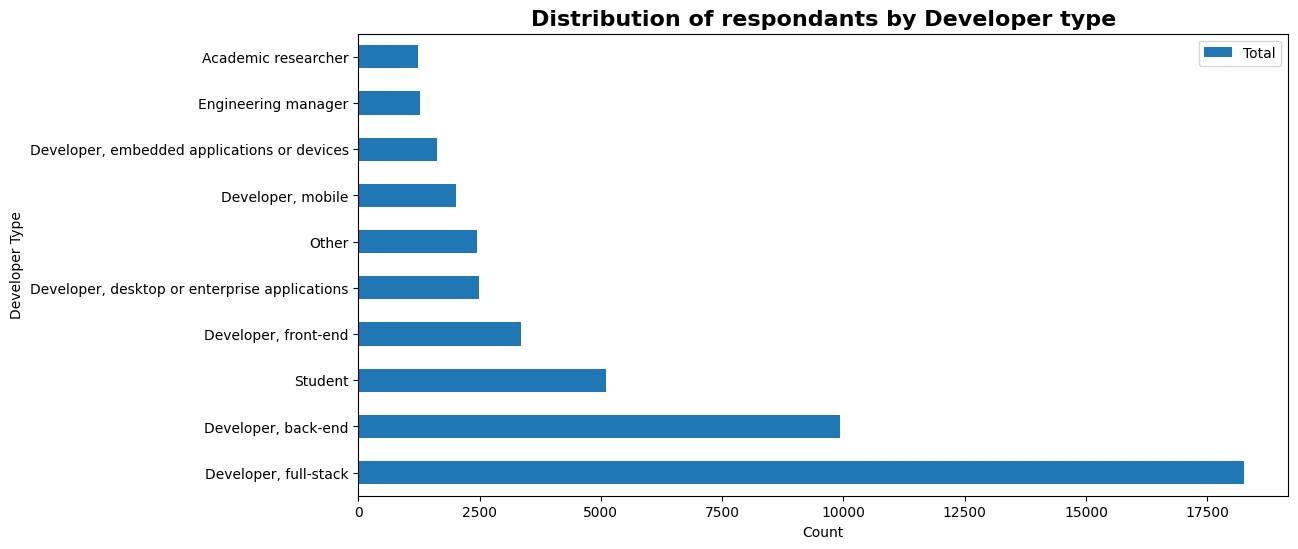

In [163]:
df_topd['DevType']=df_topd['DevType'].replace('Other (please specify):', 'Other')
df_topd_indexed=df_topd.set_index('DevType')
df_topd_indexed.plot(kind='barh', figsize=(12,6))
plt.xlabel('Count')
plt.ylabel('Developer Type')
plt.title('Distribution of respondants by Developer type', fontsize=16, fontweight='bold')
plt.show()

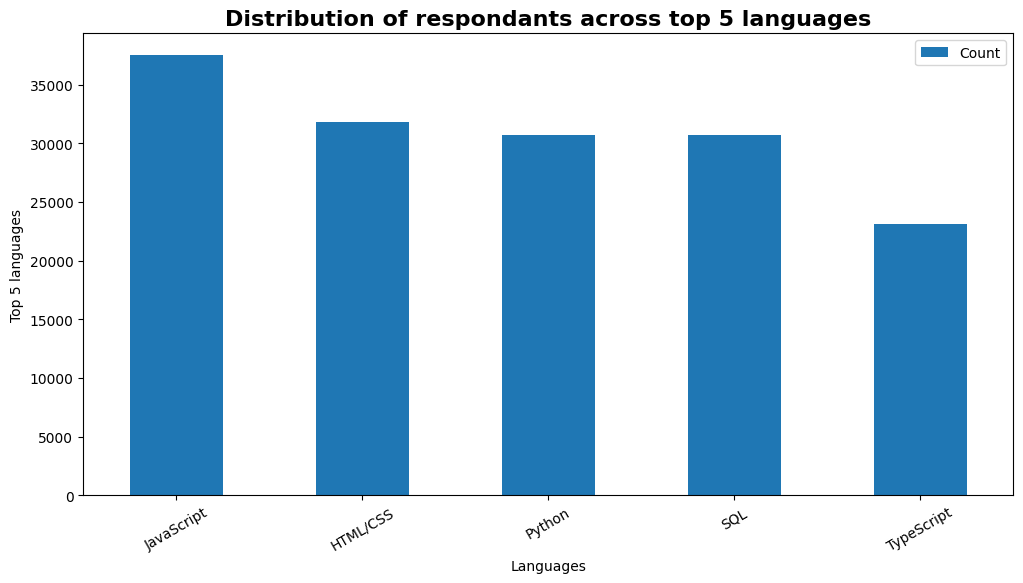

In [164]:
top_lang_indexed=top_lang.set_index('HaveWorkedWith_list')
top_lang_indexed.plot(kind='bar', figsize=(12,6))
plt.xlabel('Languages')
plt.ylabel('Top 5 languages')
plt.title('Distribution of respondants across top 5 languages', fontsize=16, fontweight='bold')
plt.xticks(rotation=30)
plt.show()

In [165]:
len(df_exploded)

158710

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1257440994.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medsalary_by_age=df_no_outliers.groupby('Age_cat')['Salary_imputed'].median()


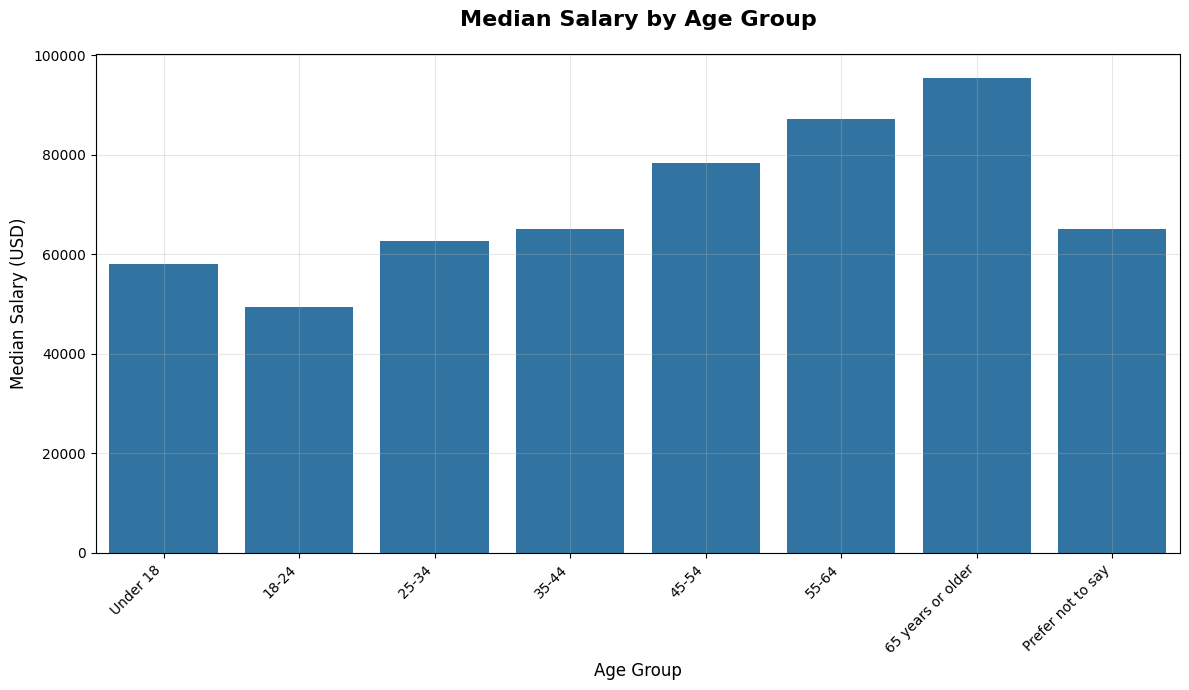

In [166]:
medsalary_by_age=df_no_outliers.groupby('Age_cat')['Salary_imputed'].median()

# Plot with styling
plt.figure(figsize=(12,7))
sns.barplot(
    data=medsalary_by_age, 
)

plt.title('Median Salary by Age Group', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Salary (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Better rotation

# Grid + formatting
plt.grid(True, alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()

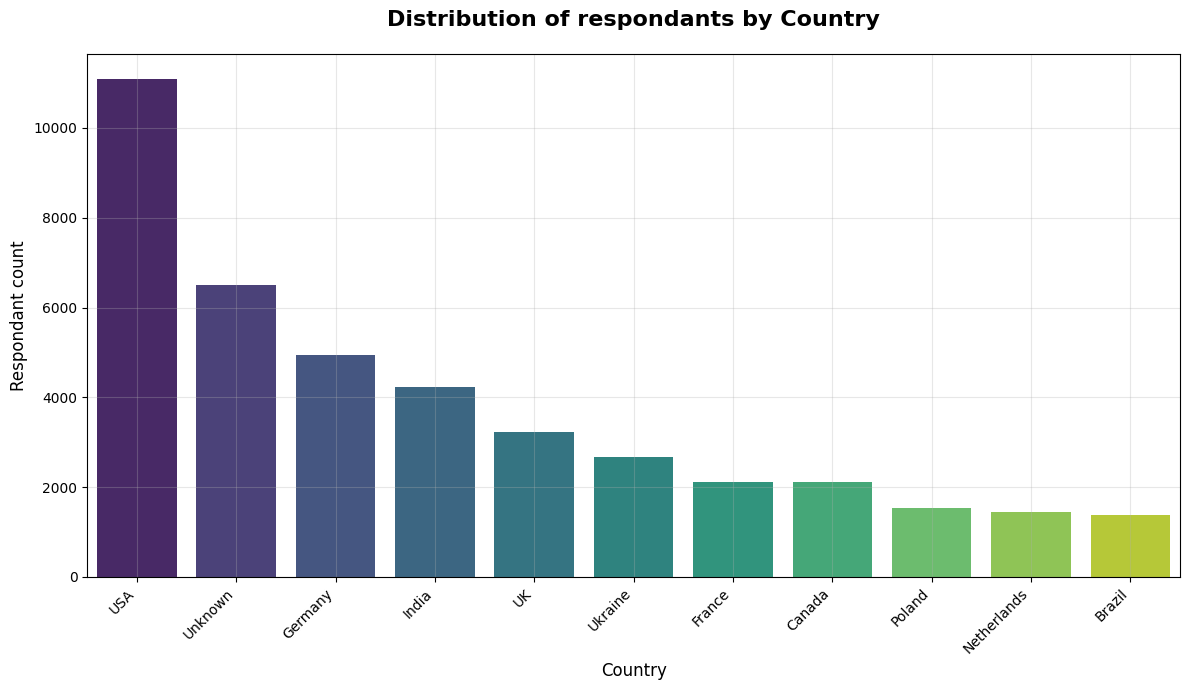

In [167]:
top_countries=df_no_outliers.groupby('Country').size().nlargest(11).reset_index(name='Count')
top_countries_indexed=top_countries.set_index('Country')
plt.figure(figsize=(12,7))
sns.barplot(
    data=top_countries_indexed,
    x='Country',
    y='Count',
    hue='Country',
    palette='viridis'
)

plt.title('Distribution of respondants by Country', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Respondant count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Better rotation
# Grid + formatting
plt.grid(True, alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\3425606719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


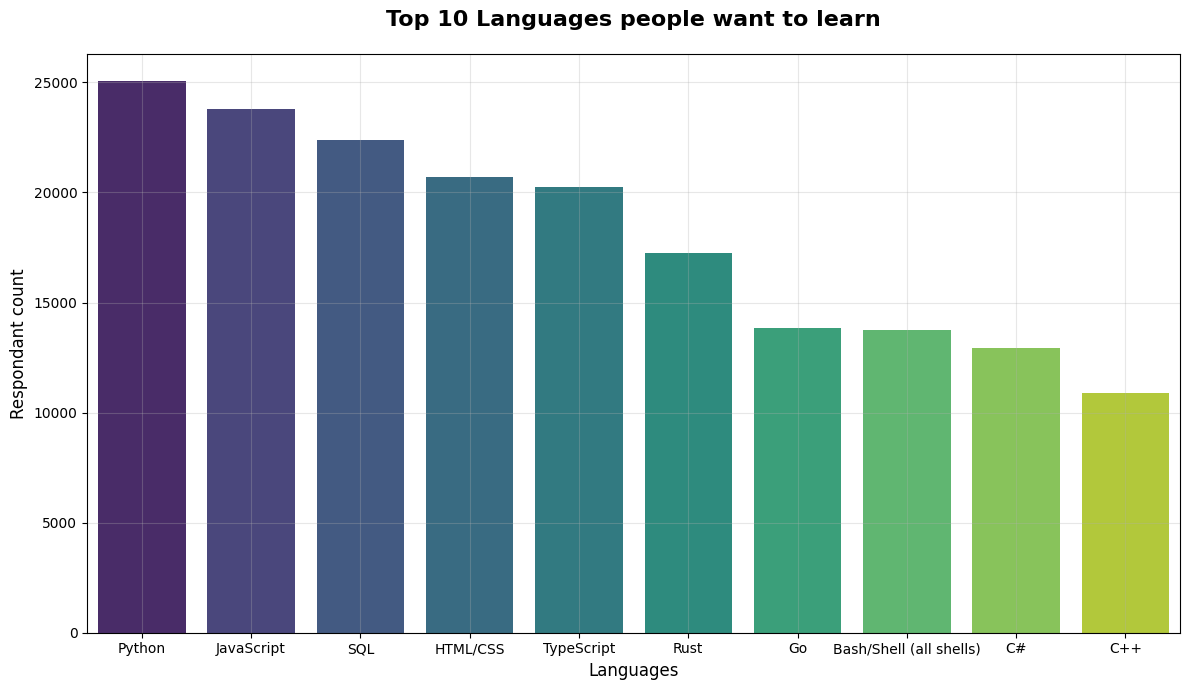

In [168]:
futurelangs=want_to_work.groupby('WantToWorkWith_list').size().nlargest(10).reset_index(name='count')
plt.figure(figsize=(12,7))
sns.barplot(
    data=futurelangs,
    x='WantToWorkWith_list',
    y='count',
    palette='viridis'
)

plt.title('Top 10 Languages people want to learn', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Languages', fontsize=12)
plt.ylabel('Respondant count', fontsize=12)
#plt.xticks(rotation=45, ha='right')  # Better rotation
# Grid + formatting
plt.grid(True, alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()

In [169]:
db_cleaned.value_counts()

DatabaseWantToWorkWith
PostgreSQL                    24001
SQLite                        13487
MySQL                         12266
MongoDB                       10979
Redis                         10846
Microsoft SQL Server           7903
Elasticsearch                  6245
MariaDB                        5946
Dynamodb                       3502
Supabase                       2929
Oracle                         2635
BigQuery                       2553
Firebase Realtime Database     2534
Cassandra                      2398
Cloud Firestore                2118
Snowflake                      1783
Cosmos DB                      1763
Neo4J                          1569
DuckDB                         1467
Clickhouse                     1327
Databricks SQL                 1217
Cockroachdb                    1156
InfluxDB                       1089
H2                             1039
Microsoft Access                661
Couch DB                        619
Solr                            557
Fireb

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\817879936.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_no_outliers['LanguageHaveWorkedWith'].fillna('No response', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\817879936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['LanguageHaveWo

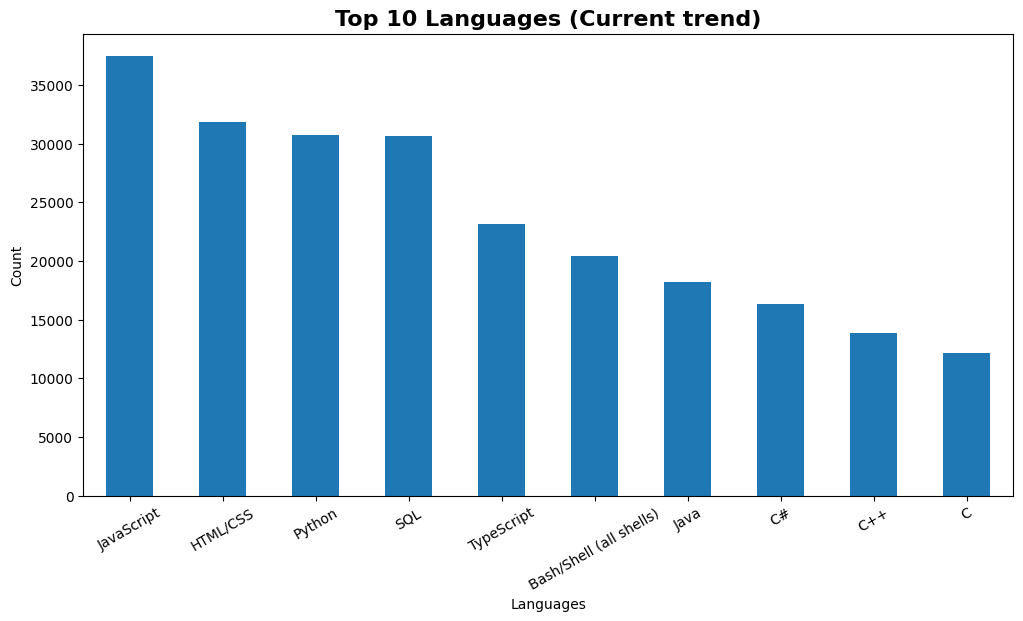

In [170]:
df_no_outliers['LanguageHaveWorkedWith'].fillna('No response', inplace=True)
df_no_outliers['LanguageHaveWorkedWith']=df_no_outliers['LanguageHaveWorkedWith'].str.split(';')
df23=df_no_outliers.explode('LanguageHaveWorkedWith')
df24=df23.groupby('LanguageHaveWorkedWith').size().nlargest(10)
df24.plot(kind='bar', figsize=(12,6))
plt.xlabel('Languages')
plt.ylabel('Count')
plt.title('Top 10 Languages (Current trend)', fontsize=16, fontweight='bold')
plt.xticks(rotation=30)
plt.show()

In [171]:
df_no_outliers['DatabaseHaveWorkedWith'].fillna('No response', inplace=True)
df_no_outliers['DatabaseHaveWorkedWith']=df_no_outliers['DatabaseHaveWorkedWith'].str.split(';')
topdb_exploded=df_no_outliers.explode('DatabaseHaveWorkedWith')
topdb_grouped=topdb_exploded.groupby('DatabaseHaveWorkedWith').size().nlargest(11)
topdb_grouped


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1648833887.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_no_outliers['DatabaseHaveWorkedWith'].fillna('No response', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4360\1648833887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['DatabaseHave

DatabaseHaveWorkedWith
PostgreSQL              25533
MySQL                   21093
SQLite                  17362
No response             15177
Microsoft SQL Server    13271
MongoDB                 13005
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5272
Dynamodb                 4138
dtype: int64

In [172]:
topdb_grouped = topdb_grouped.drop('No response', errors='ignore')
topdb_grouped

DatabaseHaveWorkedWith
PostgreSQL              25533
MySQL                   21093
SQLite                  17362
Microsoft SQL Server    13271
MongoDB                 13005
Redis                   10463
MariaDB                  8991
Elasticsearch            6533
Oracle                   5272
Dynamodb                 4138
dtype: int64

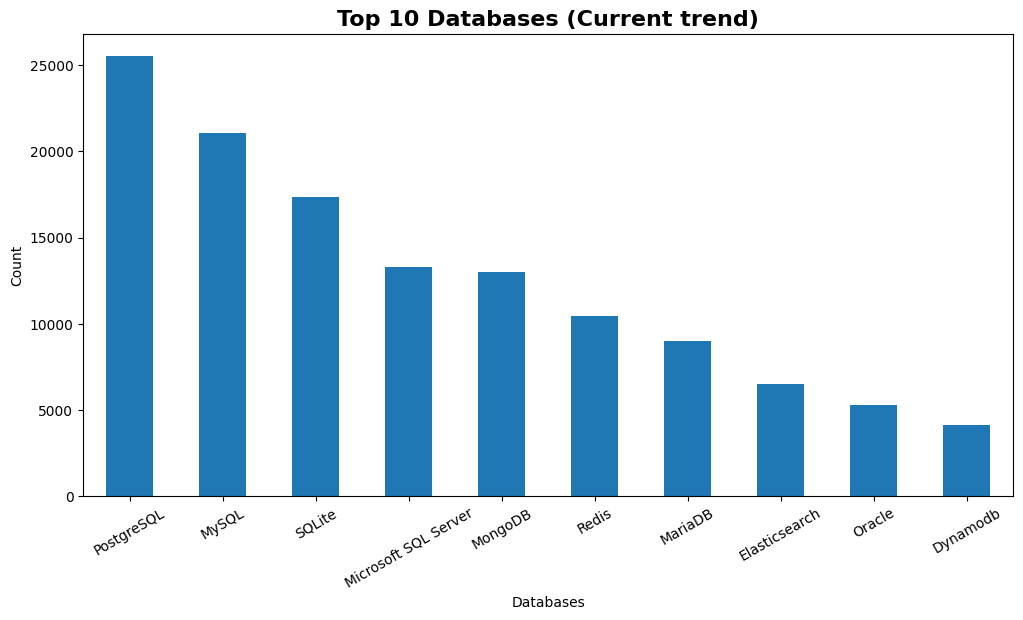

In [173]:
topdb_grouped.plot(kind='bar', figsize=(12,6))
plt.xlabel('Databases')
plt.ylabel('Count')
plt.title('Top 10 Databases (Current trend)', fontsize=16, fontweight='bold')
plt.xticks(rotation=30)
plt.show()